# Import Libraries

In [24]:
import sympy as sp
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("dark_background")

# Set Sympy Symbols

In [25]:
x, y ,z, S, q, T, r,K,v =sp.symbols("x y z S q T r K v ")
(x,y,z,S,q,T,r,K,v)

(x, y, z, S, q, T, r, K, v)

# Set Parameters

### Call; Spot Price = 50.00 ; Strike price = 50.00 ; Dividends = 0%; Implied Volatility = 30%; Risk Free Rate: 5%; Days to Expiration 45

In [26]:
S_1=50 # Actual Spot Price
K_1=50 # Option Strike
DTE=45 # Days to Expiration 
q_1=0 # Stock Dividends
v_1=0.30# Implied Volatility in the Option Contract
r_1=0.05 # Risk Free Rate
days_year=365 # Days In the Year, BR:252, EUA:365
T_1=DTE/days_year
tipo = "Call"
# you can also set Put

# Def Function of Cumulative Probability Density Function

In [27]:
def CDF(value):
    CDF = integrate((1/sqrt(2*pi*1))*exp(-1*((x-0)**2)/(2*1**2)),(x,-oo,value))
    return(N(CDF))


# Set d1 & d2

In [28]:
d1=(ln(S/K)+(r-q+0.5*v**2)*T)/(v*sqrt(T))
d2=d1-v*sqrt(T)

# Set Black & Scholes

In [29]:
# Call Black & Scholes Formula
if tipo =="Call":
    black_scholes= S*exp(-q*T)*CDF(d1)-exp(-r*T)*K*CDF(d2)
if tipo=="Put":
    black_scholes= exp(-r*T)*K*CDF(-d2) -S*exp(-q*T) *CDF(-d1)
black_scholes

# ERF = Error Function = Cumulative Probability Density Function

-K*(0.5*erf(sqrt(2)*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))/2) + 0.5)*exp(-T*r) + S*(0.5*erf(sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))/(2*sqrt(T)*v)) + 0.5)*exp(-T*q)

# Black & Scholes Test

In [30]:
# Option Price with predetermined Parameters
N(black_scholes.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))

2.25096186450397

It means that this options costs the value above

# First Order Greeks

##  Delta

$$
{\displaystyle \Delta ={\frac {\partial Black Scholes}{\partial S}}}
$$

Delta measures the variation in Option Price by the increase of $ 1.00  in the Stock Price, it's very usefull to make delta hedge positions and beeing market directional neutral

## Derivate Black & Scholes Formula to find Delta

In [31]:
delta=diff(black_scholes,S)
delta

-0.5*sqrt(2)*K*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S*sqrt(T)*v) + (0.5*erf(sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))/(2*sqrt(T)*v)) + 0.5)*exp(-T*q) + 0.5*sqrt(2)*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/(sqrt(pi)*sqrt(T)*v)

### Delta value of pre determined option parameters 

In [32]:
# Example of Usage
N(delta.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))

0.544266798482342

It means that for each 1 dollar variation in Stock price this option variates the value above

## Delta Graphs

Text(0, 0.5, 'Delta')

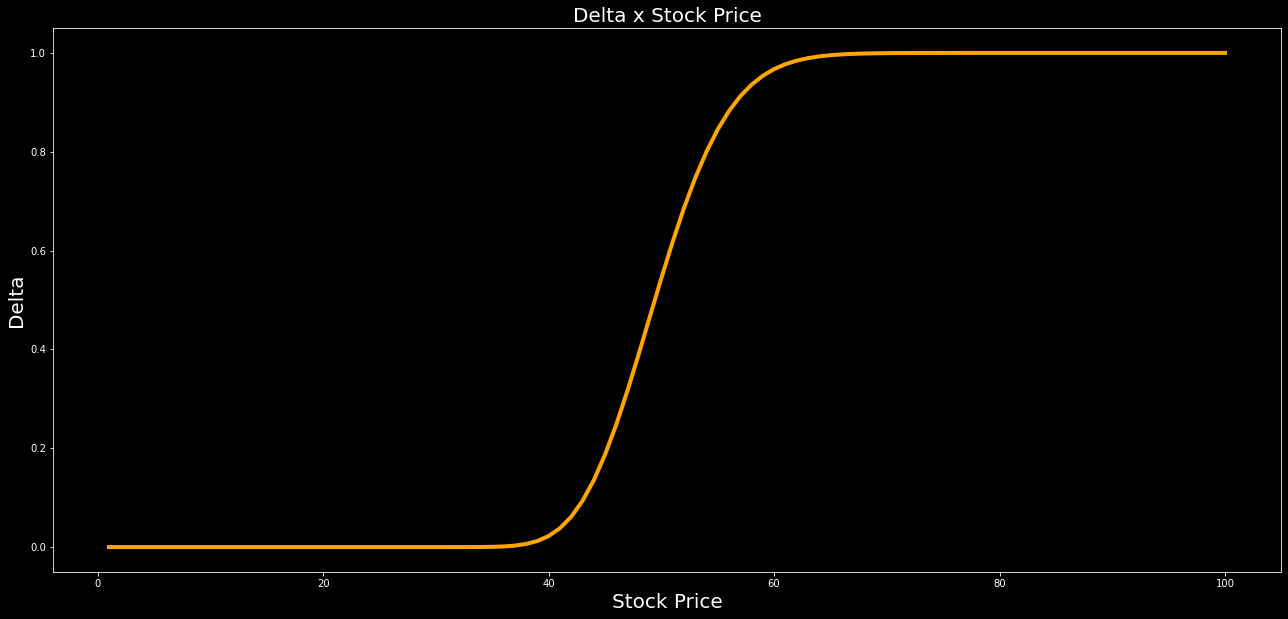

In [33]:
plt.figure(figsize=(22,10))
lista_delta=[]
for a in range(int(S_1*2)+1):
    lista_delta.append(N(delta.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1)))
df=pd.DataFrame(pd.Series(lista_delta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Delta x Stock Price",fontsize=20,color="white")
plt.xlabel("Stock Price",fontsize=20)
plt.ylabel("Delta",fontsize=20)


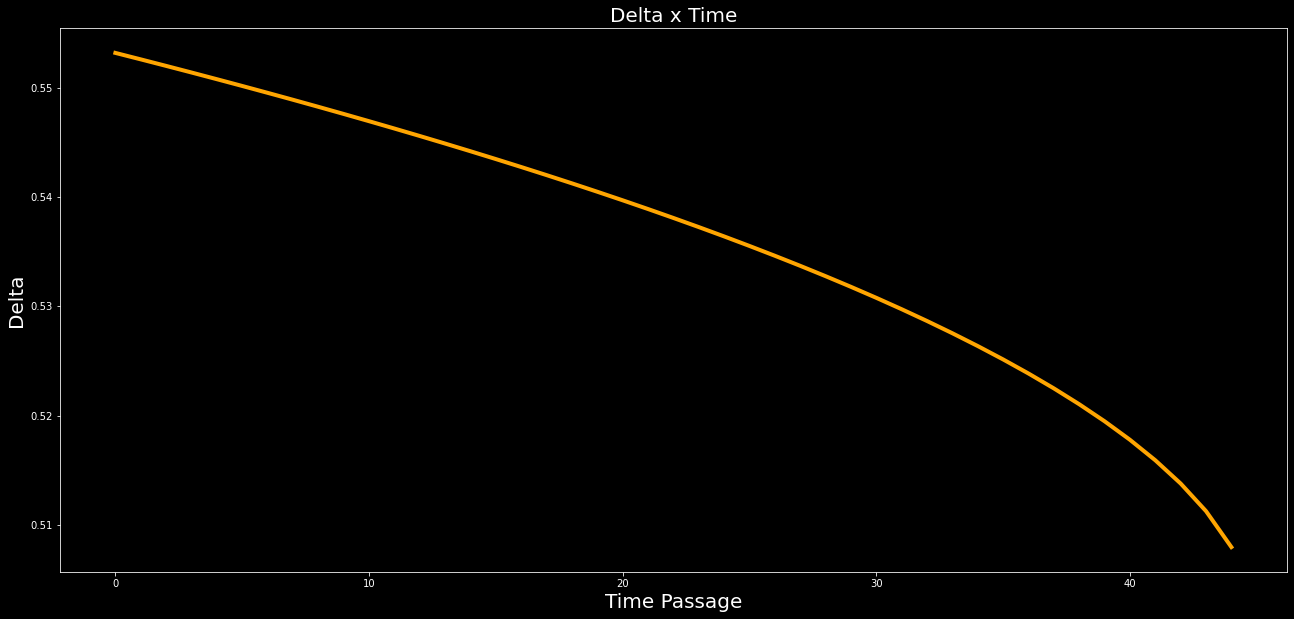

In [34]:
# the Charm effect
plt.figure(figsize=(22,10))
lista_delta=[]
for a in range(DTE):
    lista_delta.append(N(delta.subs(S,S_1).subs(K,K_1).subs(T,(DTE-a)/252).subs(q,q_1).subs(v,v_1).subs(r,r_1)))
df=pd.DataFrame(pd.Series(lista_delta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Delta x Time",fontsize=20,color="white")
plt.xlabel("Time Passage",fontsize=20)
plt.ylabel("Delta",fontsize=20)
plt.show()

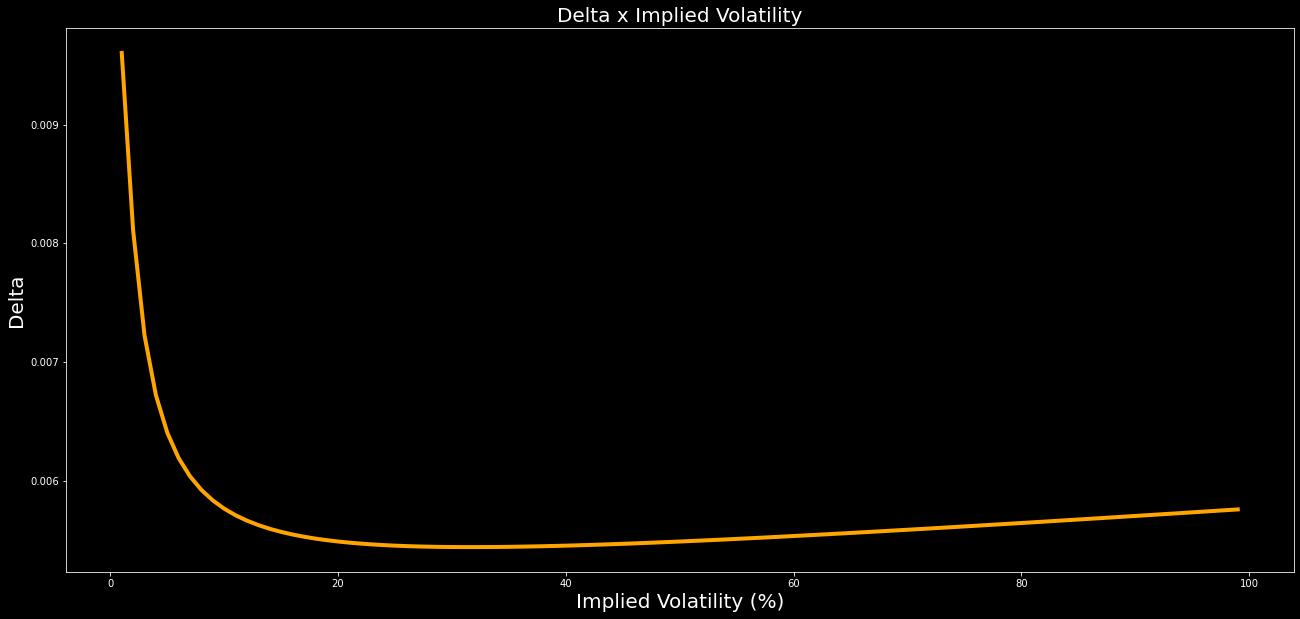

In [35]:
# the Vanna effect
plt.figure(figsize=(22,10))
lista_delta=[]
for a in range(100):
    lista_delta.append(N(delta.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,a/100).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_delta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Delta x Implied Volatility",fontsize=20,color="white")
plt.xlabel("Implied Volatility (%)",fontsize=20)
plt.ylabel("Delta",fontsize=20)
plt.show()
# + Implied Volatility = - Delta

Text(0, 0.5, 'Delta')

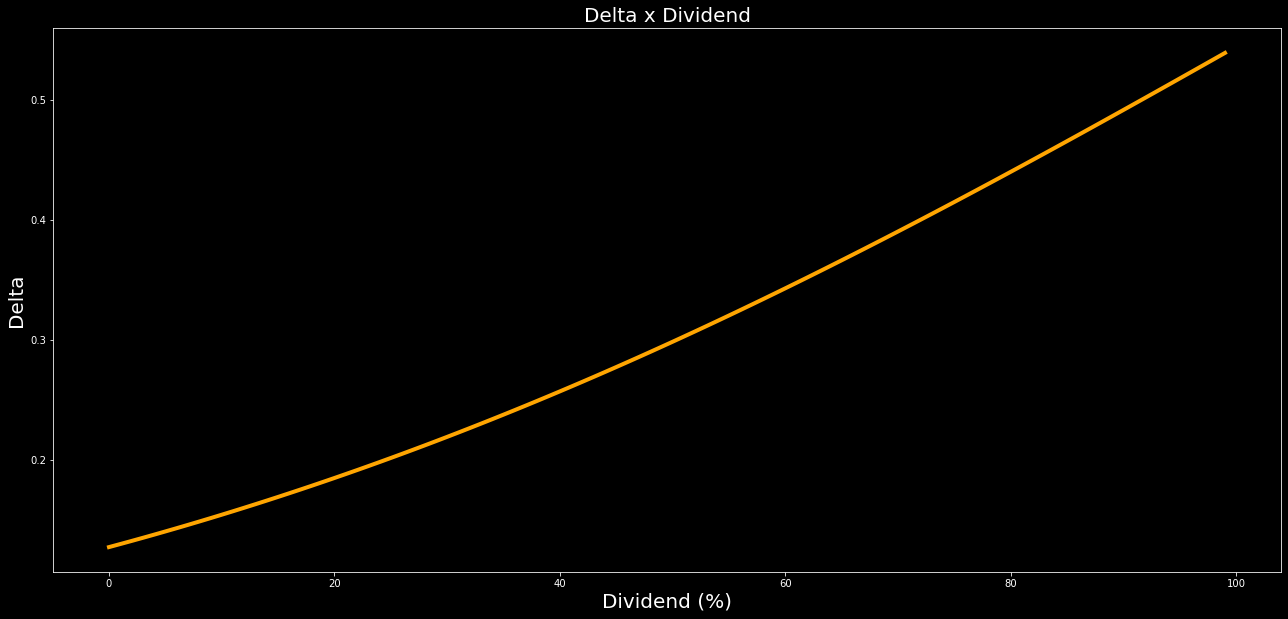

In [36]:
plt.figure(figsize=(22,10))
lista_delta=[]
for a in range(100):
    lista_delta.append(N(delta.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,(100/100-a/100)).subs(v,v_1).subs(r,r_1)))
df=pd.DataFrame(pd.Series(lista_delta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Delta x Dividend",fontsize=20,color="white")
plt.xlabel("Dividend (%)",fontsize=20)
plt.ylabel("Delta",fontsize=20)
# higher dividend = higher delta 

Text(0, 0.5, 'Delta')

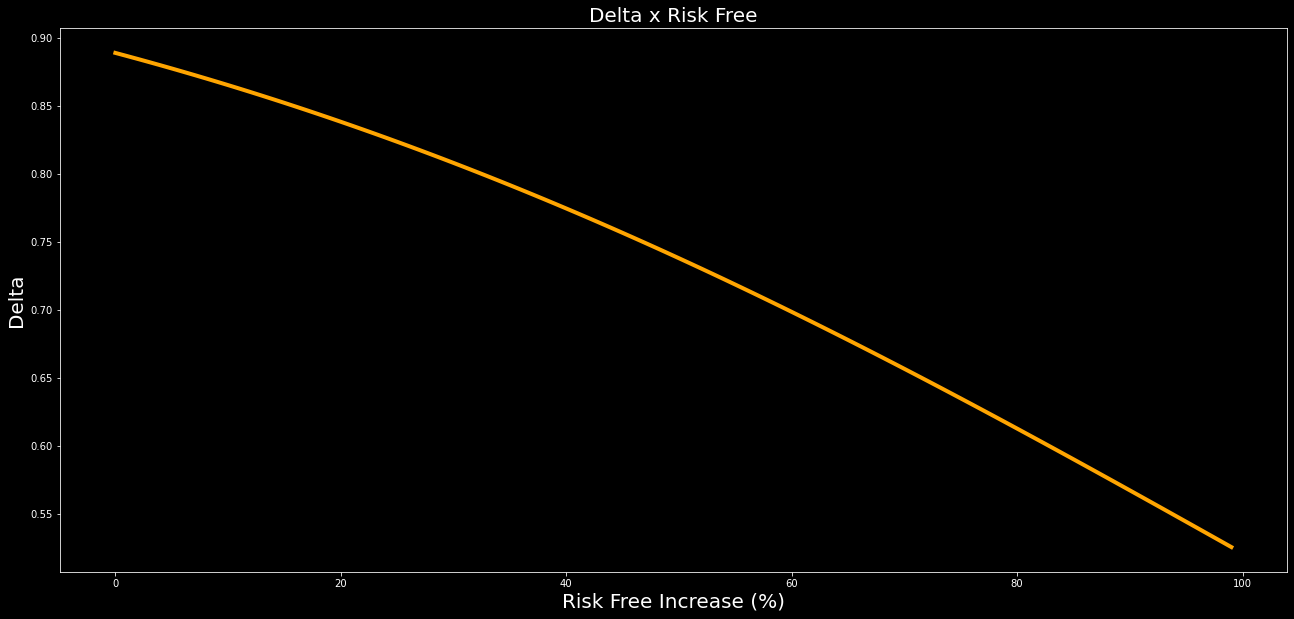

In [37]:
plt.figure(figsize=(22,10))
lista_delta=[]
for a in range(100):
    lista_delta.append(N(delta.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,(100/100-a/100))))
df=pd.DataFrame(pd.Series(lista_delta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Delta x Risk Free",fontsize=20,color="white")
plt.xlabel("Risk Free Increase (%)",fontsize=20)
plt.ylabel("Delta",fontsize=20)
# higher risk free = higher delta, but this variation is not so relevant, delta decays a litlle bit 

## Theta

$$
{\displaystyle \Theta =-{\frac {\partial Black Scholes}{\partial T }}}
$$

## Derivate Black & Scholes to Time
It's necessary to put a minus signal before the equation because the days to expiration in a contract is inversed proportional to the time increasse (which is the meaning of this derivation)

In [38]:
theta=-diff(black_scholes,T)
theta.simplify()
# ERF = Cumulative Probability Density Function

K*r*(0.5*erf(sqrt(2)*(sqrt(T)*v - (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))/2) - 0.5)*exp(-T*r) - 0.5*sqrt(2)*K*(v/(2*sqrt(T)) - (-q + r + 0.5*v**2)/(sqrt(T)*v) + (T*(-q + r + 0.5*v**2) + log(S/K))/(2*T**(3/2)*v))*exp(-T*r)*exp(-(sqrt(T)*v - (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/sqrt(pi) + S*q*(0.5*erf(sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))/(2*sqrt(T)*v)) + 0.5)*exp(-T*q) - 1.0*S*(sqrt(2)*(-q + r + 0.5*v**2)/(2*sqrt(T)*v) - sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))/(4*T**(3/2)*v))*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/sqrt(pi)

## Theta value of pre determined option parameters 

It's necessary to divide the value by the number of days in a yer to visualize the impact of 1 day change in the option price

In [39]:
# Example of Usage
N(theta.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))/days_year

-0.0266219645458947

For each day passed this option contract changes the value above

## Theta Graphs

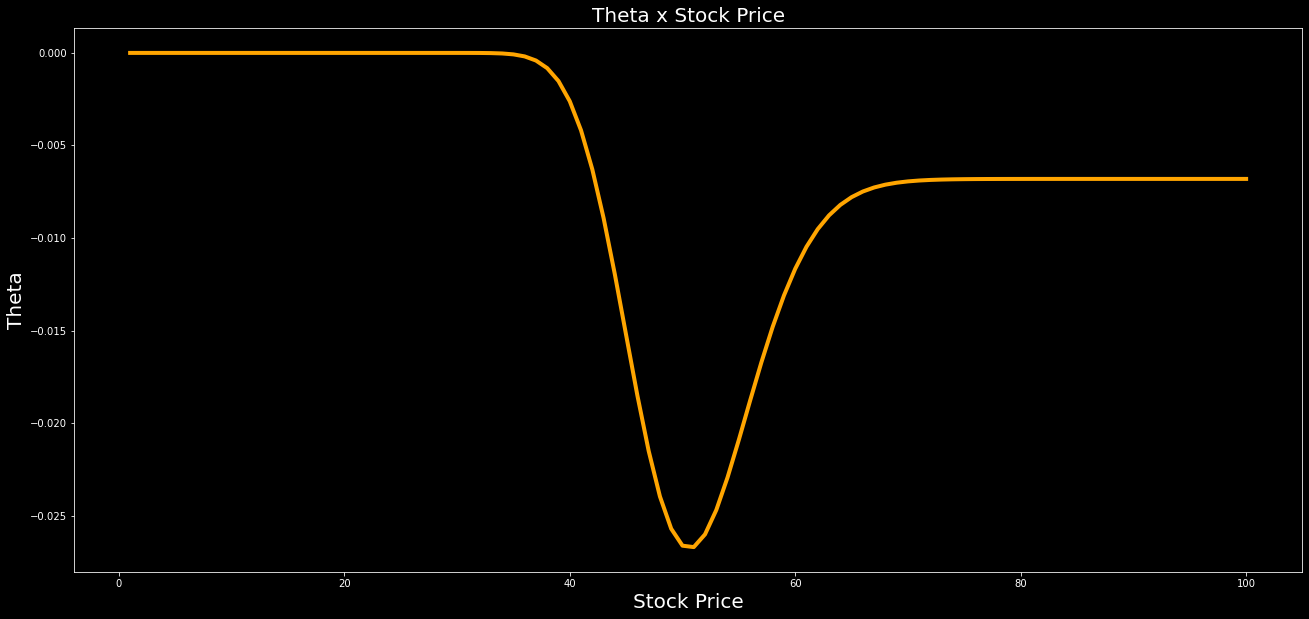

In [40]:
plt.figure(figsize=(22,10))
lista_theta=[]
for a in range(int(S_1*2)+1):
    lista_theta.append(N(theta.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1)/days_year))
df=pd.DataFrame(pd.Series(lista_theta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Theta x Stock Price",fontsize=20,color="white")
plt.xlabel("Stock Price",fontsize=20)
plt.ylabel("Theta",fontsize=20)
plt.show()

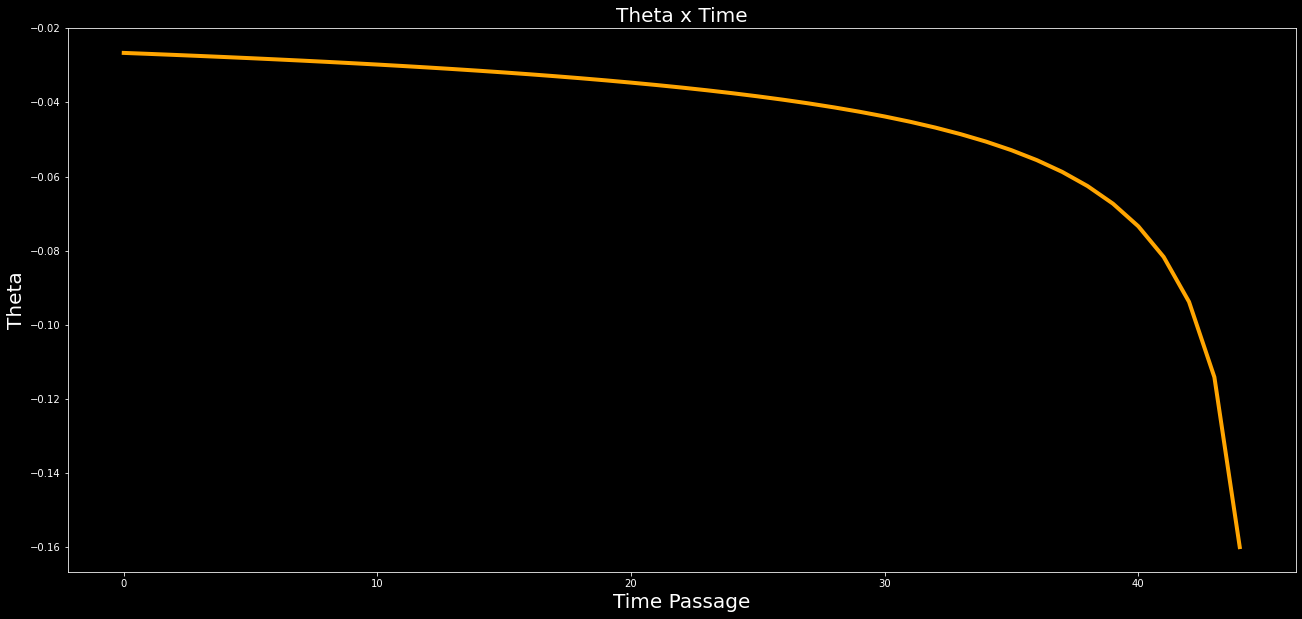

In [41]:
# New Greek --> Tau, theta per time, let's calculate the value in the future
plt.figure(figsize=(22,10))
lista_theta=[]
for a in range(DTE):
    lista_theta.append(N(theta.subs(S,S_1).subs(K,K_1).subs(T,(T_1*days_year-a)/days_year).subs(q,q_1).subs(v,v_1).subs(r,r_1)/days_year))
df=pd.DataFrame(pd.Series(lista_theta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Theta x Time",fontsize=20,color="white")
plt.xlabel("Time Passage",fontsize=20)
plt.ylabel("Theta",fontsize=20)
plt.show()

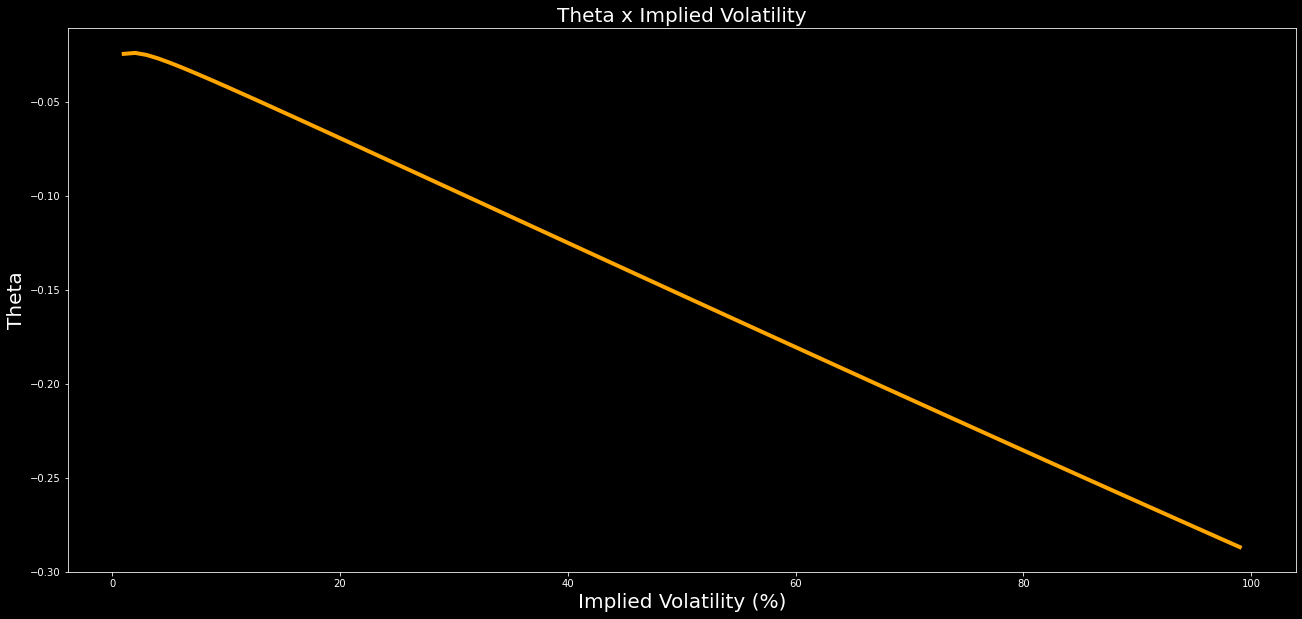

In [42]:
# the Veta effect
plt.figure(figsize=(22,10))
lista_theta=[]
for a in range(100):
    lista_theta.append(N(theta.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,a/100).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_theta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Theta x Implied Volatility",fontsize=20,color="white")
plt.xlabel("Implied Volatility (%)",fontsize=20)
plt.ylabel("Theta",fontsize=20)
plt.show()
# + Implied Volatility = - Theta
# Vega and Theta decre

Text(0, 0.5, 'Theta')

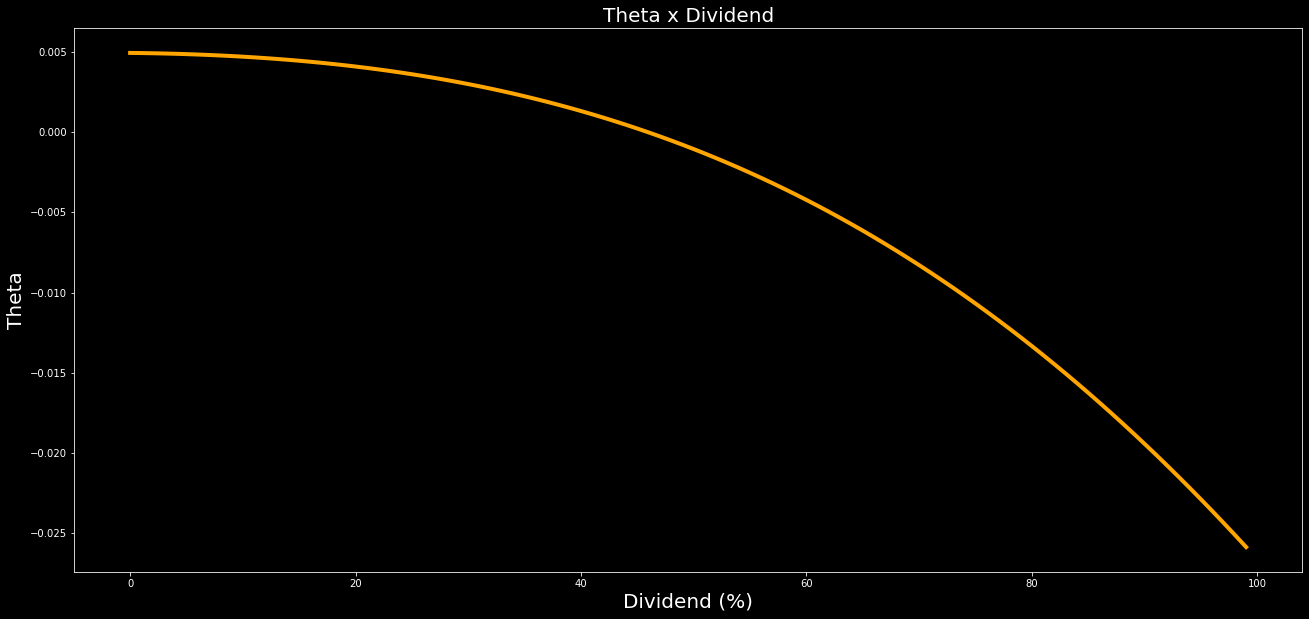

In [43]:
# New Greek but not so relevant because there is just a small change
plt.figure(figsize=(22,10))
lista_theta=[]
for a in range(100):
    lista_theta.append(N(theta.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,(100/100-a/100)).subs(v,v_1).subs(r,r_1)/days_year))
df=pd.DataFrame(pd.Series(lista_theta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Theta x Dividend",fontsize=20,color="white")
plt.xlabel("Dividend (%)",fontsize=20)
plt.ylabel("Theta",fontsize=20)
# higher dividend = lower theta
# theta can invert the signal if an company pays dividends in a call contract...

Text(0, 0.5, 'Theta')

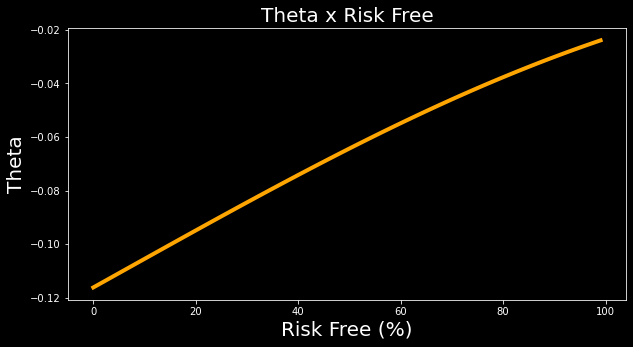

In [44]:
# New Greek but not so relevant
plt.figure(figsize=(10,5))
lista_theta=[]
for a in range(100):
    lista_theta.append(N(theta.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,(100/100-a/100))/days_year))
df=pd.DataFrame(pd.Series(lista_theta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Theta x Risk Free",fontsize=20,color="white")
plt.xlabel("Risk Free (%)",fontsize=20)
plt.ylabel("Theta",fontsize=20)
# theta is directly proportional to the risk free rate!, but it can't change the signal
# not so relevant changes

## Vega

 $$
{\displaystyle {\mathcal {V}}={\frac {\partial Black Scholes}{\partial \sigma }}}
$$

Vega represents the option price variation per 1% change in implied volatility

## Derivate Black & Scholes to implied volatility

In [45]:
vega=diff(black_scholes,v)
vega

0.5*sqrt(2)*K*(T*(-q + r + 0.5*v**2) + log(S/K))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*sqrt(T)*v**2) + 1.0*S*(0.5*sqrt(2)*sqrt(T) - sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))/(2*sqrt(T)*v**2))*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/sqrt(pi)

##  Vega value of pre determined option parameters 
We need to divide by 100 to visualize the impact of 1% change

In [46]:
N(vega.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))/100

0.0696073821063363

It means that for each 1% increase in implied volatility this option increase $ 0.069

## Vega Graphs

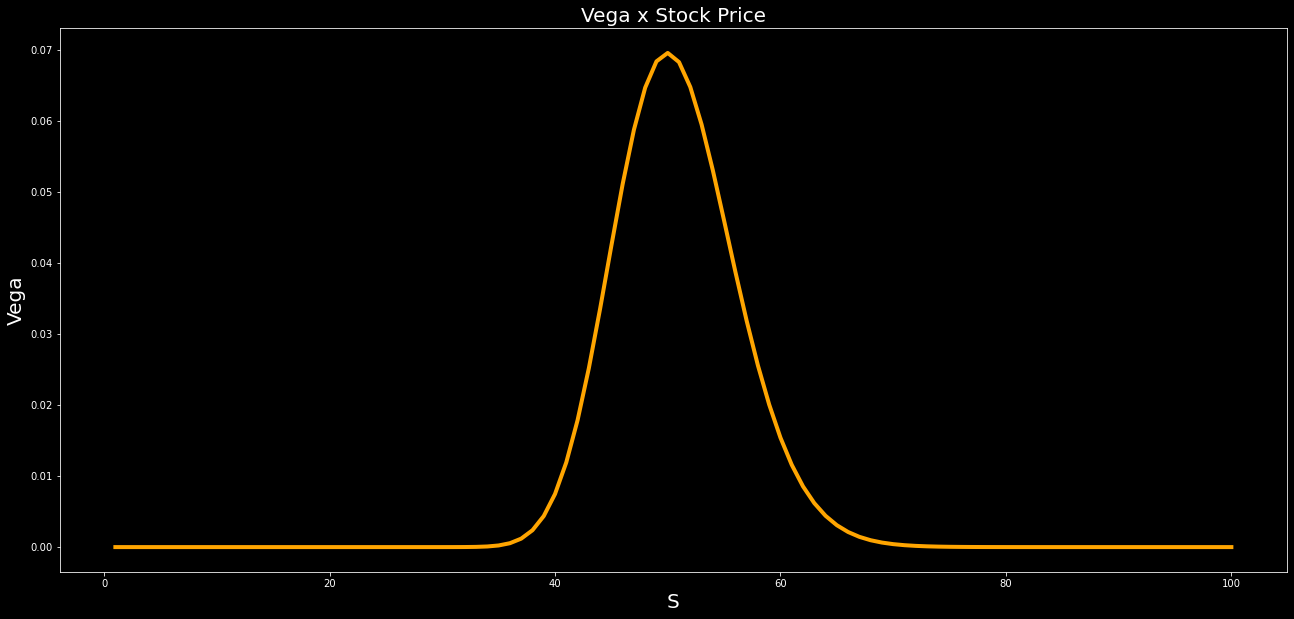

In [47]:
# The Vanna effect
plt.figure(figsize=(22,10))
lista_vega=[]
for a in range(int(S_1*2)+1):
    lista_vega.append(N(vega.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1)/100))
df=pd.DataFrame(pd.Series(lista_vega))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vega x Stock Price",fontsize=20,color="white")
plt.xlabel("S",fontsize=20)
plt.ylabel("Vega",fontsize=20)
plt.show()

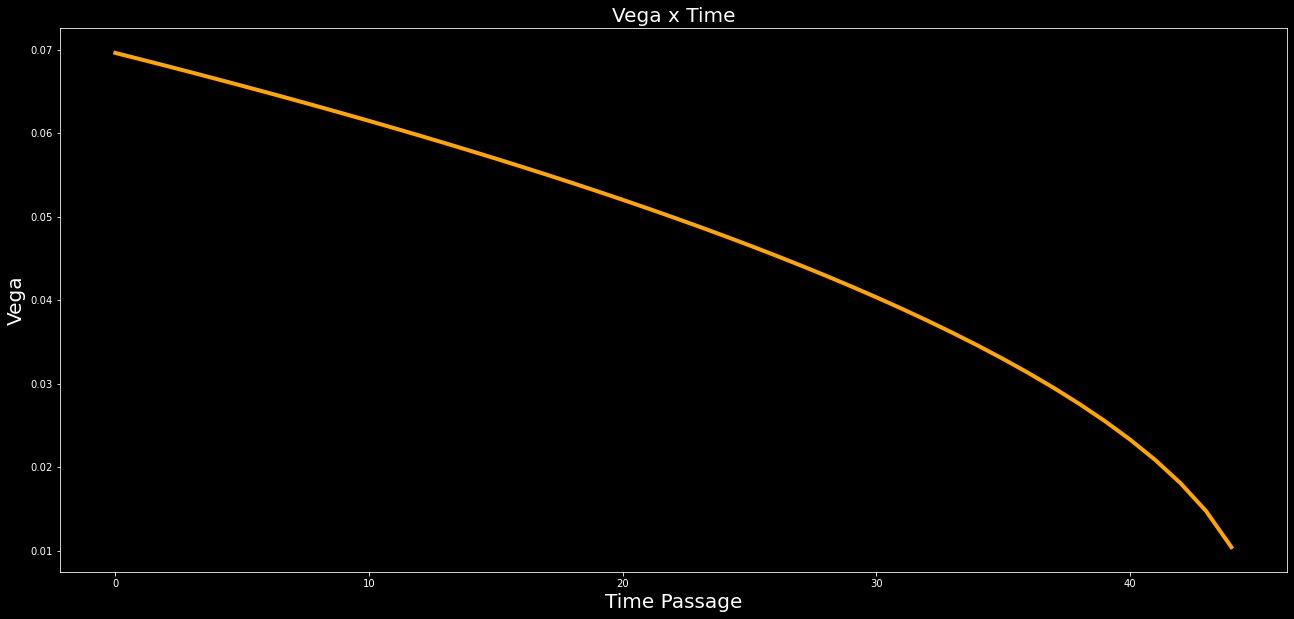

In [48]:
# the Veta Effect
plt.figure(figsize=(22,10))
lista_vega=[]
for a in range(DTE):
    lista_vega.append(N(vega.subs(S,S_1).subs(K,K_1).subs(T,(DTE-a)/days_year).subs(q,q_1).subs(v,v_1).subs(r,r_1)/100))
df=pd.DataFrame(pd.Series(lista_vega))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vega x Time",fontsize=20,color="white")
plt.xlabel("Time Passage",fontsize=20)
plt.ylabel("Vega",fontsize=20)
plt.show()
# + time passage = - vega

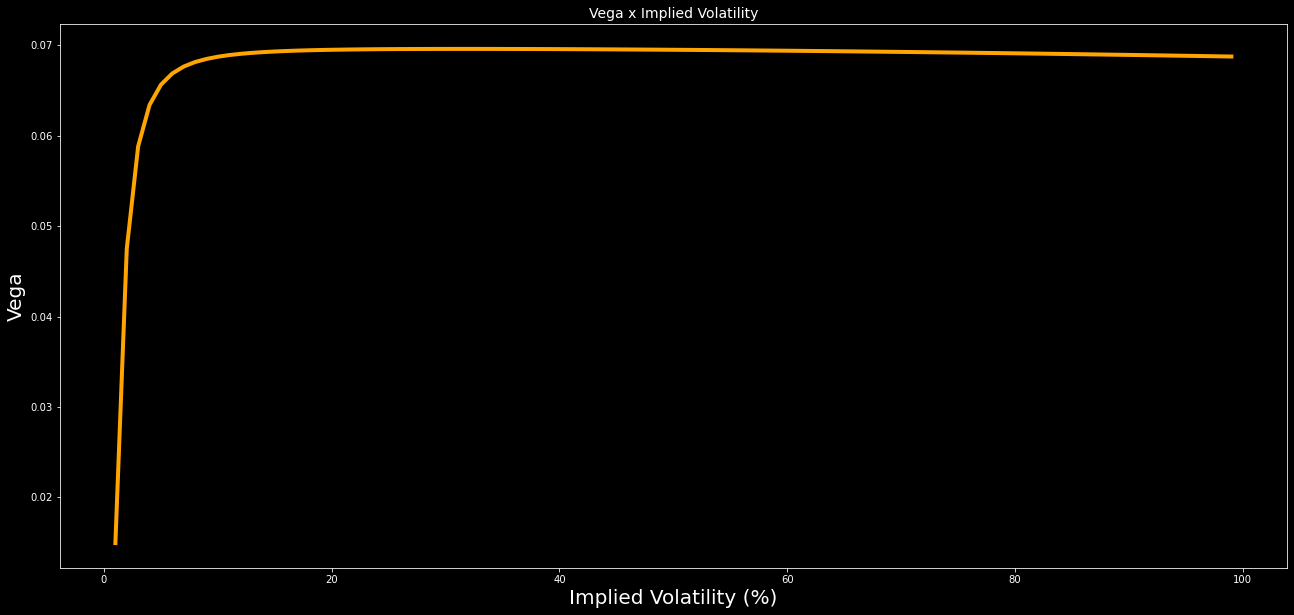

In [49]:
# the Vomma effect
plt.figure(figsize=(22,10))
lista_vega=[]
for a in range(100):
    lista_vega.append(N(vega.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,a/100).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_vega))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vega x Implied Volatility",fontsize=14,color="white")
plt.xlabel("Implied Volatility (%)",fontsize=20)
plt.ylabel("Vega",fontsize=20)
plt.show()
# + Implied Volatility = +Vega

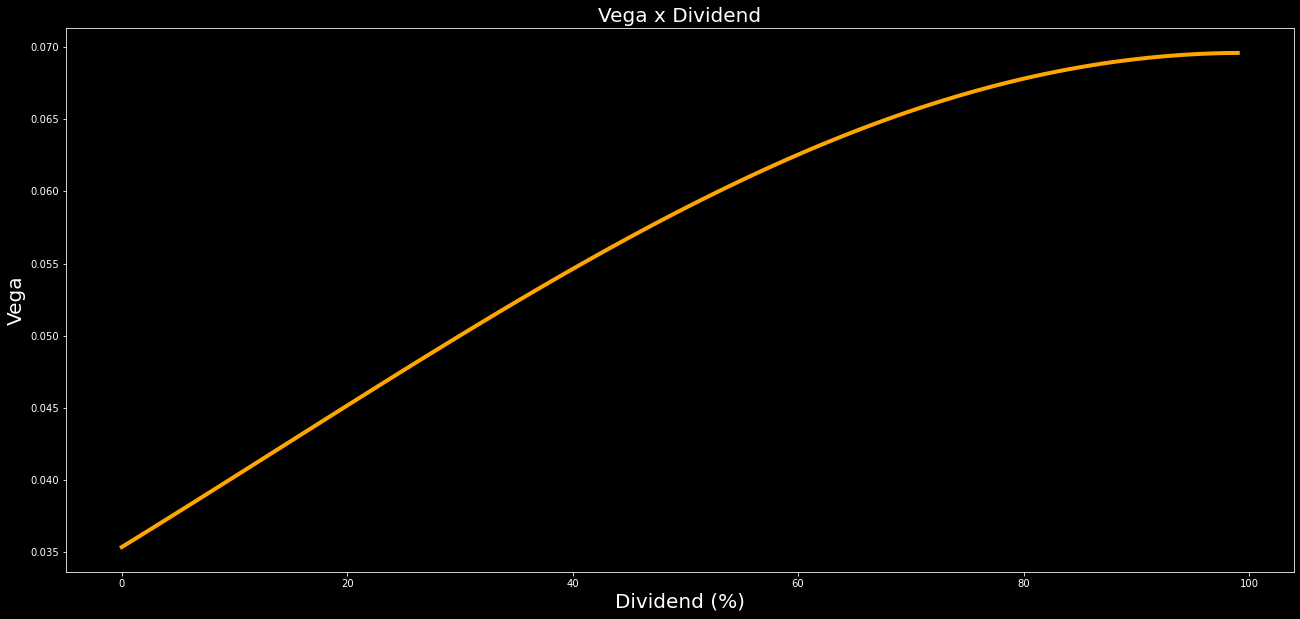

In [50]:
# New Greek but not so relevant
plt.figure(figsize=(22,10))
lista_vega=[]
for a in range(100):
    lista_vega.append(N(vega.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,(100/100-a/100)).subs(v,v_1).subs(r,r_1)/100))
df=pd.DataFrame(pd.Series(lista_vega))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vega x Dividend",fontsize=20,color="white")
plt.xlabel("Dividend (%)",fontsize=20)
plt.ylabel("Vega",fontsize=20)
plt.show()


Text(0, 0.5, 'Vega')

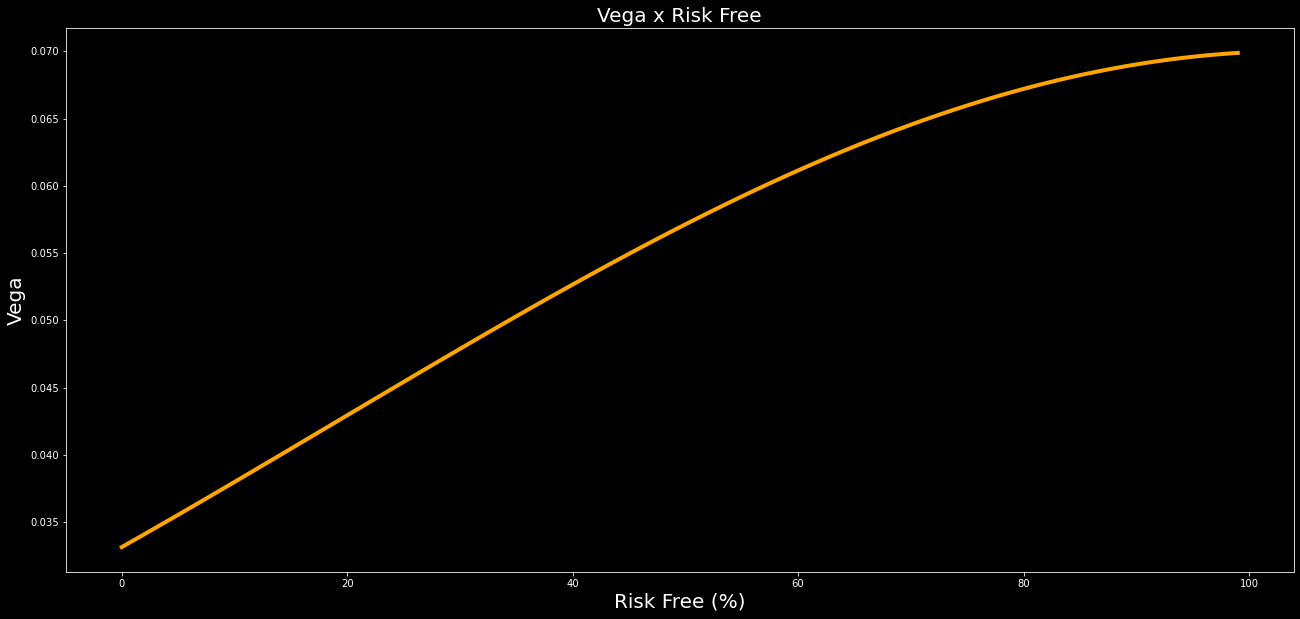

In [51]:
# New greek but not so relevant
plt.figure(figsize=(22,10))
lista_vega=[]
for a in range(100):
    lista_vega.append(N(vega.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,(100/100-a/100))/100))
df=pd.DataFrame(pd.Series(lista_vega))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vega x Risk Free",fontsize=20,color="white")
plt.xlabel("Risk Free (%)",fontsize=20)
plt.ylabel("Vega",fontsize=20)
# vega is directly proportional to the risk free rate!, but it can't change the signal
# not so relevant changes, but more relevant in vega than in theta...

## Rho

$$
{\displaystyle \rho ={\frac {\partial Black Scholes}{\partial r}}}
$$

Rho represents the option price variation per 1% increase in Risk Free Rate

## Derivate Black & Scholes to "r", Risk Free Rate

In [52]:
rho=diff(black_scholes,r)
rho

-0.5*sqrt(2)*K*sqrt(T)*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*v) + K*T*(0.5*erf(sqrt(2)*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))/2) + 0.5)*exp(-T*r) + 0.5*sqrt(2)*S*sqrt(T)*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/(sqrt(pi)*v)

## Rho value of pre determined option parameters 

We need to divide by 100 to see the impact of 1% change in Risk Free Rate

In [53]:
N(rho.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1)/100)

0.0307755345940436

For each 1% Increase in Risk Free rate this option changes by the value above

## Rho Graphs

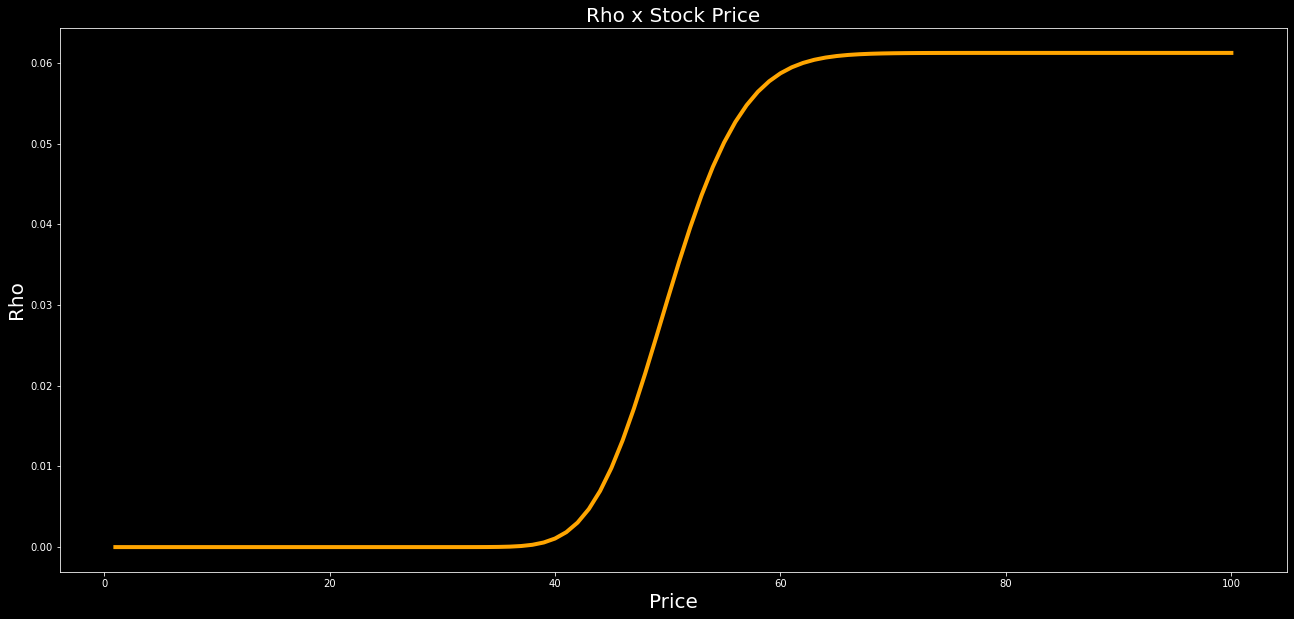

In [54]:
# New Greek
plt.figure(figsize=(22,10))
lista_rho=[]
for a in range(int(S_1*2)+1):
    lista_rho.append(N(rho.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_rho))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Rho x Stock Price",fontsize=20,color="white")
plt.xlabel("Price",fontsize=20)
plt.ylabel("Rho",fontsize=20)
plt.show()

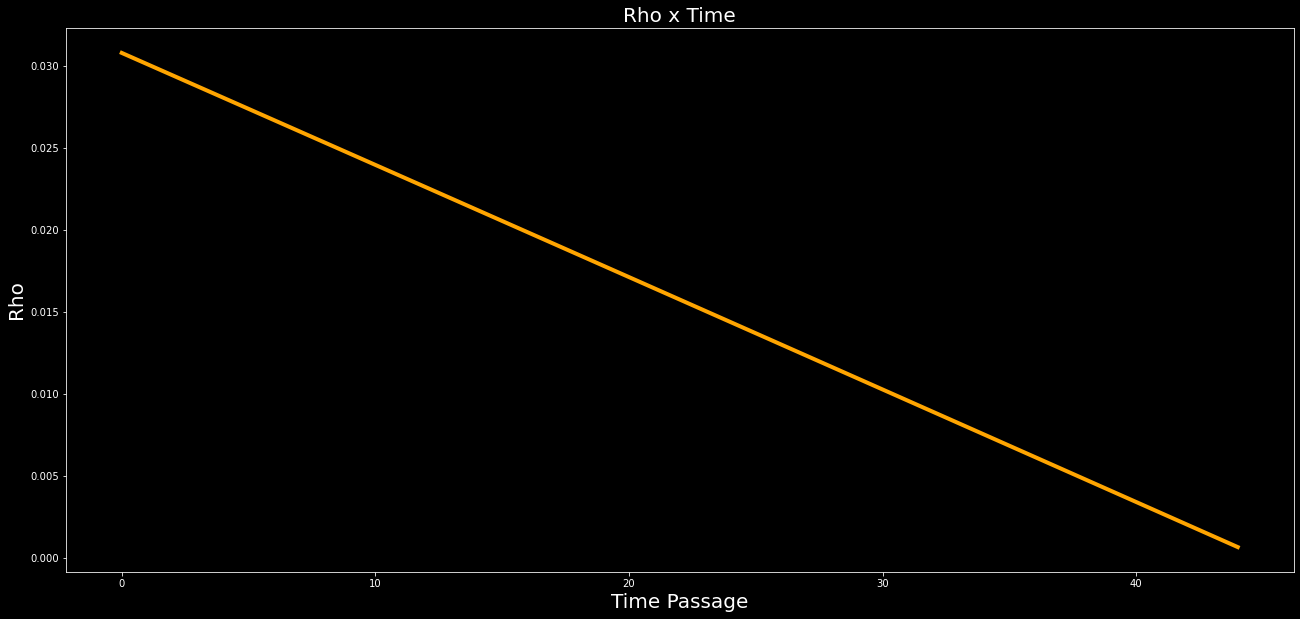

In [55]:
# New Greek
#if time passes rho tends to zero...not so relevant values but of course interessant
plt.figure(figsize=(22,10))
lista_rho=[]
for a in range(DTE):
    lista_rho.append(N(rho.subs(S,S_1).subs(K,K_1).subs(T,(DTE-a)/days_year).subs(q,q_1).subs(v,v_1).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_rho))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Rho x Time",fontsize=20,color="white")
plt.xlabel("Time Passage",fontsize=20)
plt.ylabel("Rho",fontsize=20)
plt.show()
# + time passage = - rho

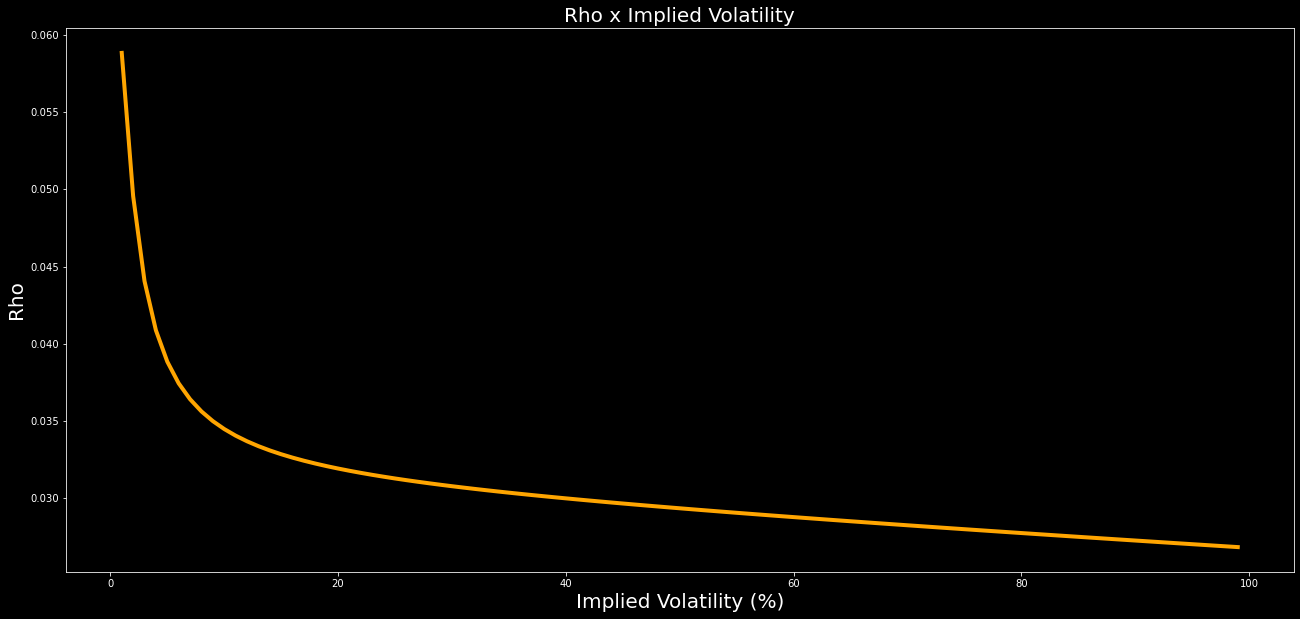

In [56]:
# New Greek 
plt.figure(figsize=(22,10))
lista_rho=[]
for a in range(100):
    lista_rho.append(N(rho.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,a/100).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_rho))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Rho x Implied Volatility",fontsize=20,color="white")
plt.xlabel("Implied Volatility (%)",fontsize=20)
plt.ylabel("Rho",fontsize=20)
plt.show()

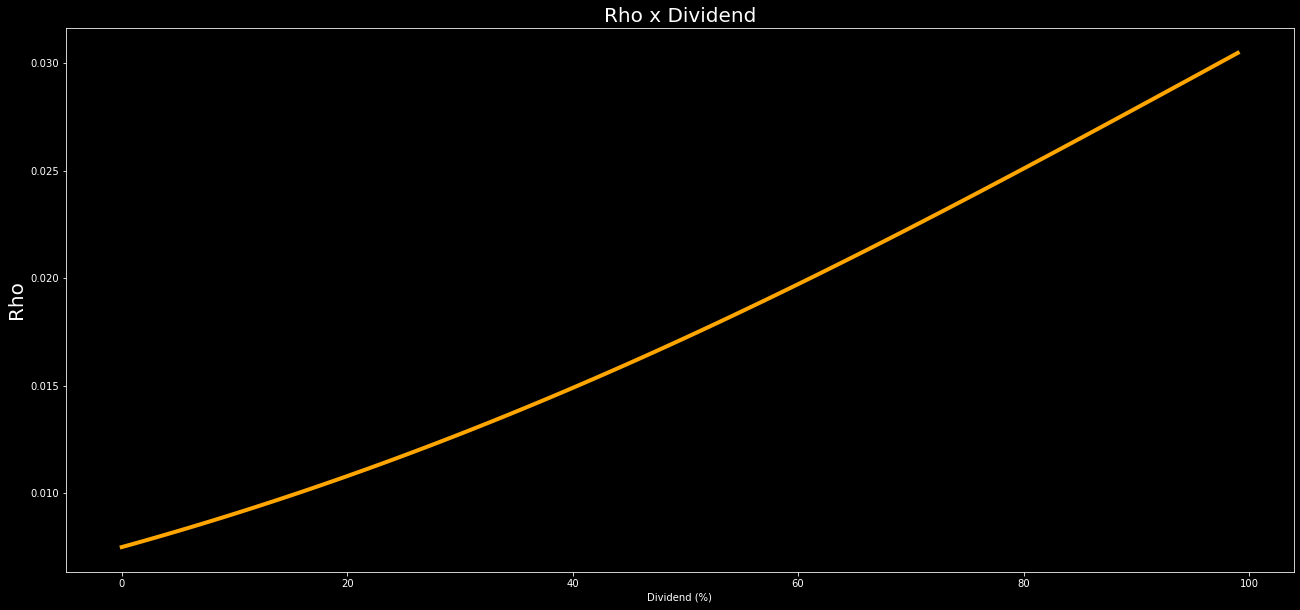

In [57]:
# New Greek but not so relevant no changes in signal and no big differences in rho value
plt.figure(figsize=(22,10))
lista_rho=[]
for a in range(100):
    lista_rho.append(N(rho.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,(100/100-a/100)).subs(v,v_1).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_rho))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Rho x Dividend",fontsize=20,color="white")
plt.xlabel("Dividend (%)")
plt.ylabel("Rho",fontsize=20)
plt.show()

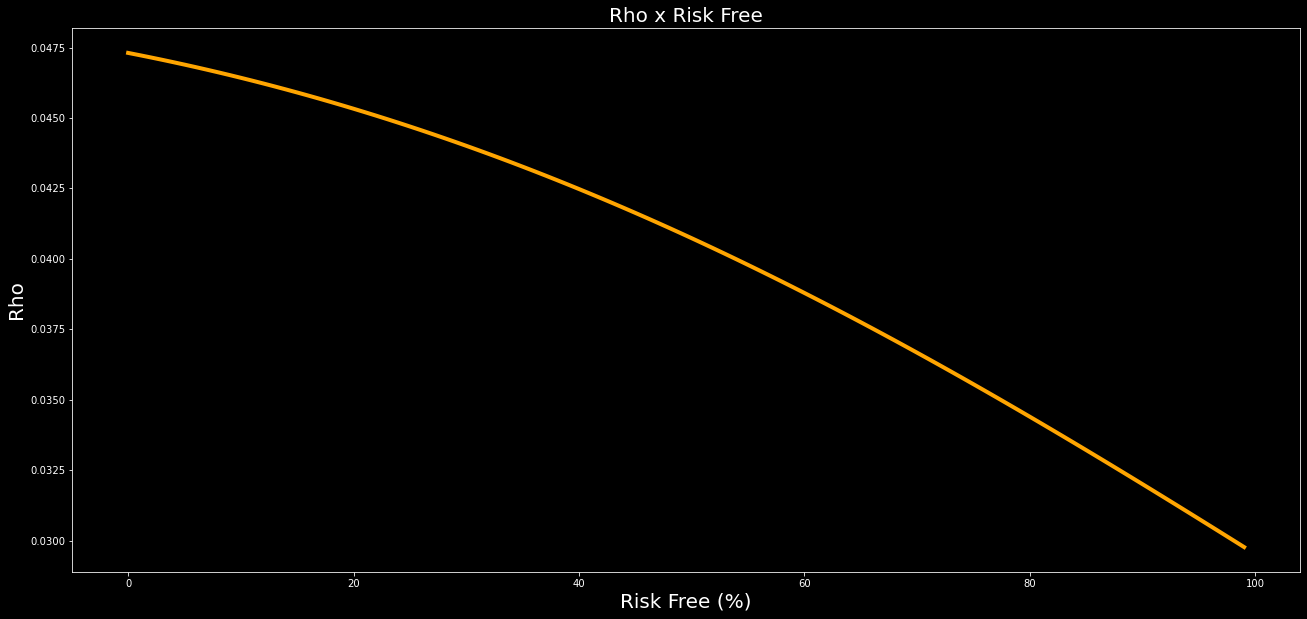

In [58]:
# New greek but not so relevant
plt.figure(figsize=(22,10))
lista_rho=[]
for a in range(100):
    lista_rho.append(N(rho.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,(100/100-a/100))/100))
df=pd.DataFrame(pd.Series(lista_rho))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Rho x Risk Free",fontsize=20,color="white")
plt.xlabel("Risk Free (%)",fontsize=20)
plt.ylabel("Rho",fontsize=20)
plt.show()

# Second Order Greeks

## Gamma

$$
{\displaystyle \Gamma ={\frac {\partial \Delta }{\partial S}}={\frac {\partial ^{2}Black Scholes}{\partial S^{2}}}}
$$

Gamma measures how the delta changes by $ 1.00 variation in stock price , represents the convexity of the strucutre and can be very usefull to Delta- Gamma Hedge positions & Portfolios

## Derivate Black & Scholes to stock price 2 times

In [59]:
gamma=black_scholes.diff(S).diff(S)
gamma

0.5*sqrt(2)*K*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S**2*T*v**2) + 0.5*sqrt(2)*K*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S**2*sqrt(T)*v) + 0.5*sqrt(2)*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/(sqrt(pi)*S*sqrt(T)*v) - 0.5*sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/(sqrt(pi)*S*T**(3/2)*v**3)

## Gamma value of pre determined option parameters 

In [60]:
# Example of Usage
N(gamma.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))

0.0752790947224082

For each $ 1.00 increase in stock price the Delta changes by the value above

## Gamma Graphs

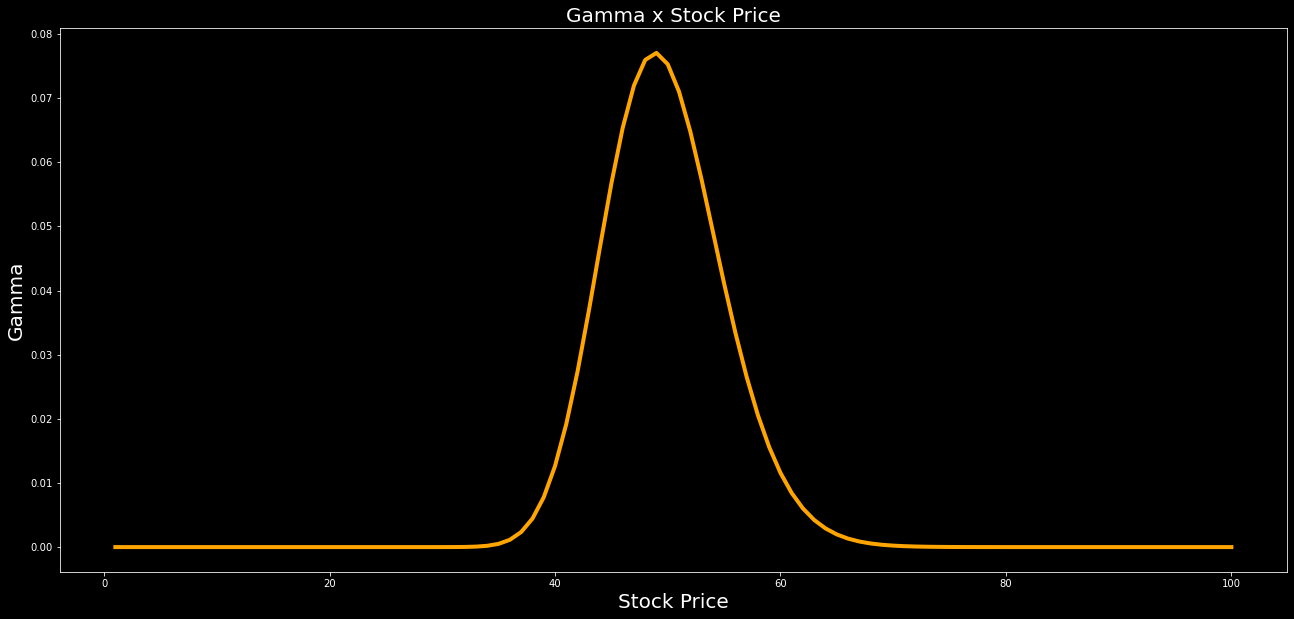

In [61]:
# The speed effect
plt.figure(figsize=(22,10))
lista_gamma=[]
for a in range(int(S_1*2)+1):
    lista_gamma.append(N(gamma.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1)))
df=pd.DataFrame(pd.Series(lista_gamma))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Gamma x Stock Price",fontsize=20,color="white")
plt.xlabel("Stock Price", fontsize=20)
plt.ylabel("Gamma",fontsize=20)
plt.show()

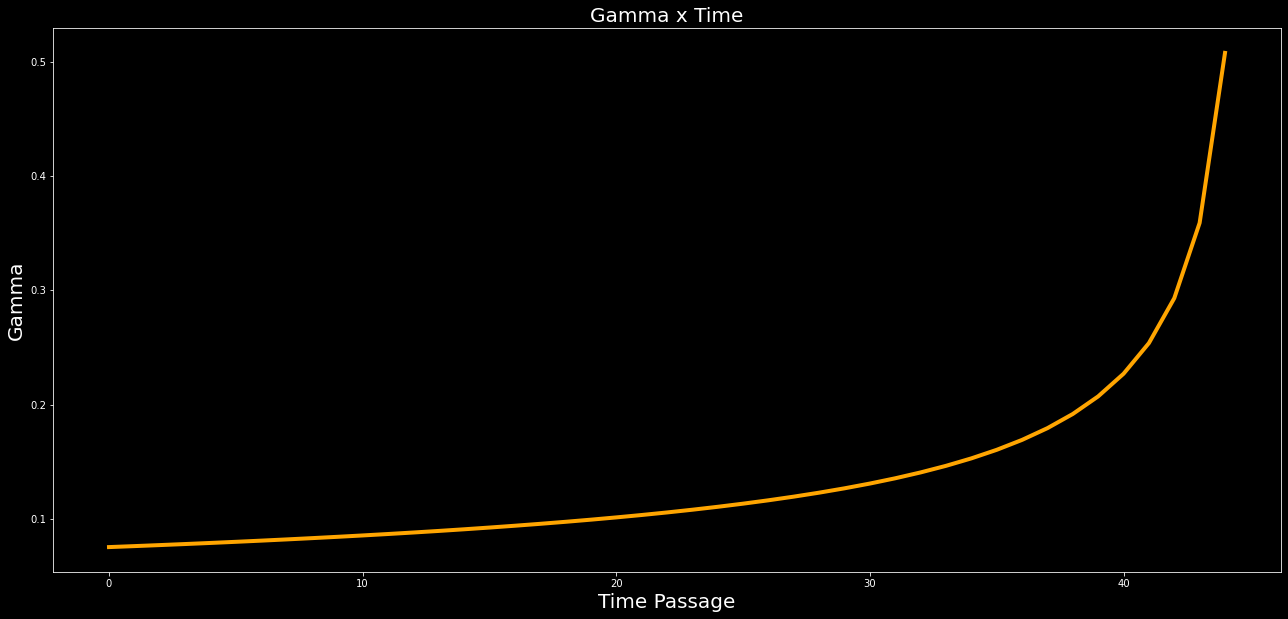

In [62]:
# The Color Effect
plt.figure(figsize=(22,10))
lista_gamma=[]
for a in range(DTE):
    lista_gamma.append(N(gamma.subs(S,S_1).subs(K,K_1).subs(T,(DTE-a)/days_year).subs(q,q_1).subs(v,v_1).subs(r,r_1)))
df=pd.DataFrame(pd.Series(lista_gamma))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Gamma x Time",fontsize=20,color="white")
plt.xlabel("Time Passage",fontsize=20)
plt.ylabel("Gamma",fontsize=20)
plt.show()

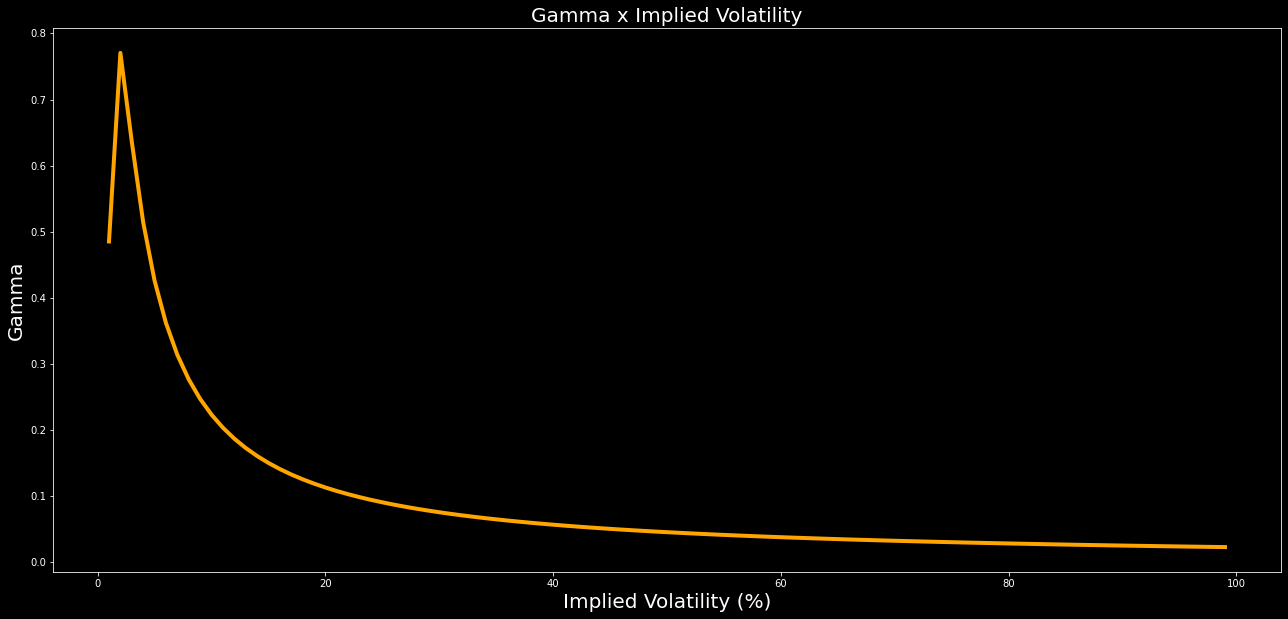

In [63]:
# The Zomma effect
plt.figure(figsize=(22,10))
lista_gamma=[]
for a in range(100):
    lista_gamma.append(N(gamma.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,a/100).subs(r,r_1)))
df=pd.DataFrame(pd.Series(lista_gamma))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Gamma x Implied Volatility",fontsize=20,color="white")
plt.xlabel("Implied Volatility (%)",fontsize=20)
plt.ylabel("Gamma",fontsize=20)
plt.show()

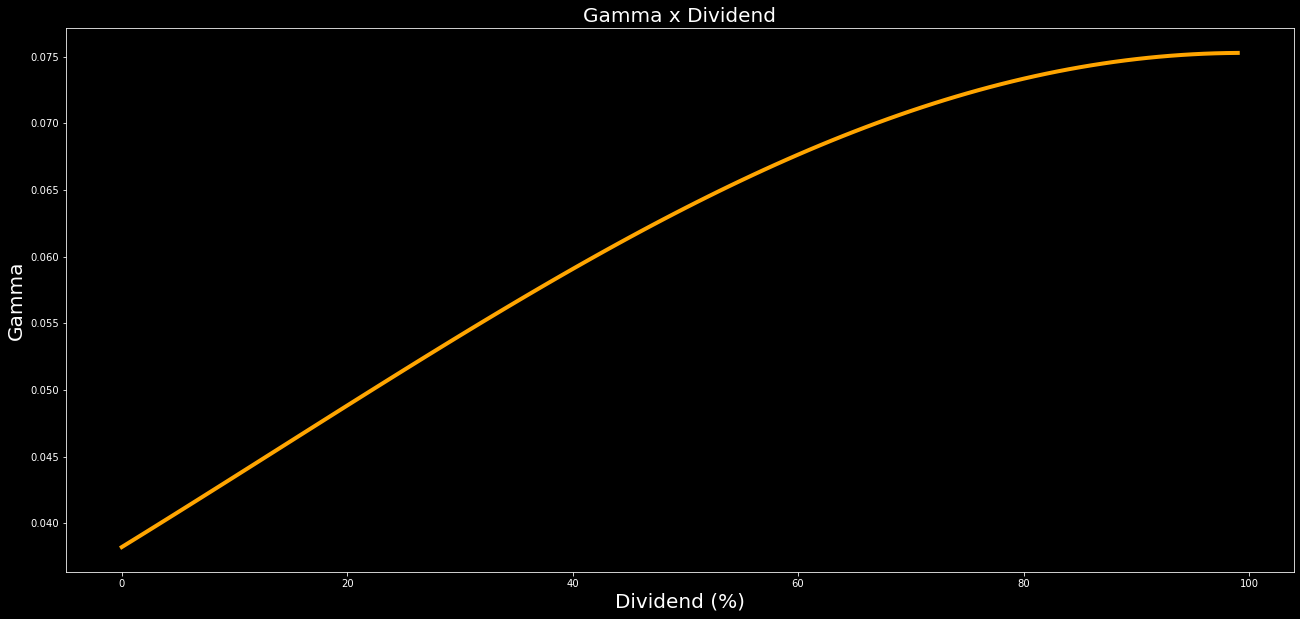

In [64]:
# New Greek but not so relevant changes in gamma
plt.figure(figsize=(22,10))
lista_gamma=[]
for a in range(100):
    lista_gamma.append(N(gamma.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,(100/100-a/100)).subs(v,v_1).subs(r,r_1)))
df=pd.DataFrame(pd.Series(lista_gamma))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Gamma x Dividend",fontsize=20,color="white")
plt.xlabel("Dividend (%)",fontsize=20)
plt.ylabel("Gamma",fontsize=20)
plt.show()

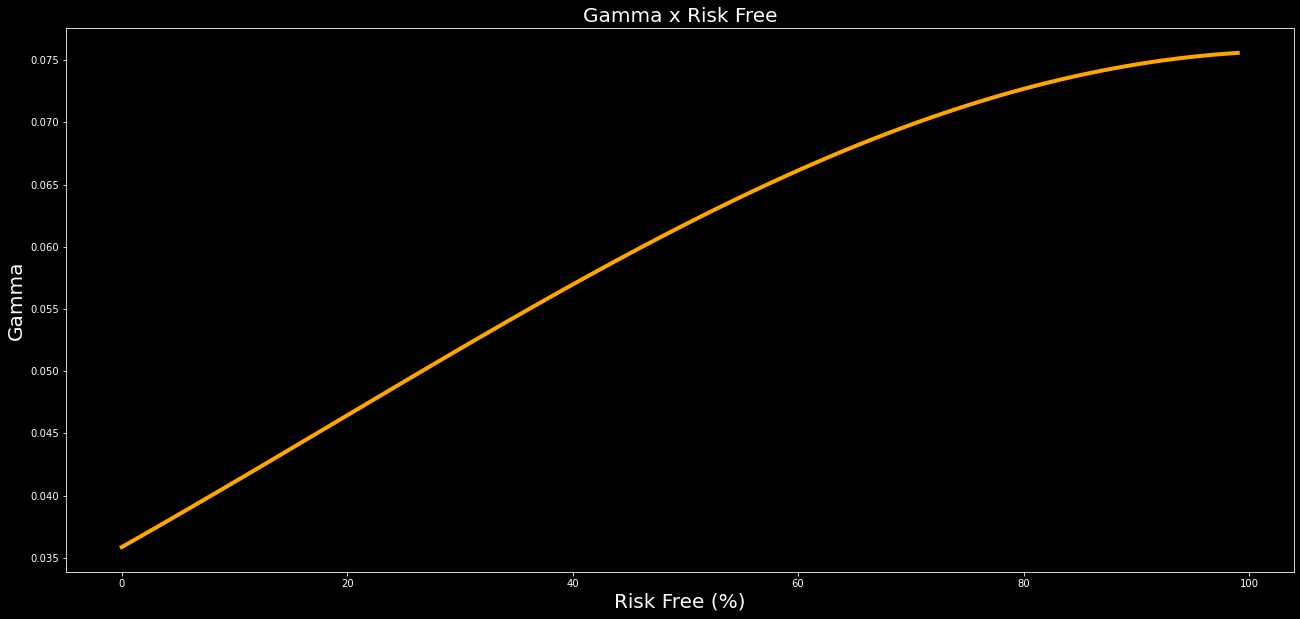

In [65]:
# New greek but not so relevant changes in Gamma
plt.figure(figsize=(22,10))
lista_gamma=[]
for a in range(100):
    lista_gamma.append(N(gamma.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,(100/100-a/100))))
df=pd.DataFrame(pd.Series(lista_gamma))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Gamma x Risk Free",fontsize=20,color="white")
plt.xlabel("Risk Free (%)",fontsize=20)
plt.ylabel("Gamma",fontsize=20)
plt.show()

## Charm

$$
{\displaystyle {\text{Charm}}=-{\frac {\partial \Delta }{\partial T }}={\frac {\partial \Theta }{\partial S}}=-{\frac {\partial ^{2}Black Scholes}{\partial T \,\partial S}}}
$$

Charm measures how delta changes by the passage of time. It's very important to delta hedge positions & portfolio because the delta variates by the passage of time, so your hedge needs to be balanced by the passage of time, and charm helps to predict the delta's movements

## Derivate Black & Scholes to Stock Price and to Time
We need to put the minus signal before the function because the Days to expiration is inversed proportional to a increase in Time

In [66]:
charm=-black_scholes.diff(S).diff(T)
charm

-0.5*sqrt(2)*K*r*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S*sqrt(T)*v) - 0.25*sqrt(2)*K*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))*(-v/sqrt(T) + 2*(-q + r + 0.5*v**2)/(sqrt(T)*v) - (T*(-q + r + 0.5*v**2) + log(S/K))/(T**(3/2)*v))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S*sqrt(T)*v) - 0.25*sqrt(2)*K*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S*T**(3/2)*v) + q*(0.5*erf(sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))/(2*sqrt(T)*v)) + 0.5)*exp(-T*q) - 1.0*(sqrt(2)*(-q + r + 0.5*v**2)/(2*sqrt(T)*v) - sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))/(4*T**(3/2)*v))*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/sqrt(pi) + 0.5*sqrt(2)*q*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/(sqrt(pi)*sqrt(T)*v) - 0.5*sqrt(2)*(-(T*(-q + r + 0.5*v**2) + log(S/K))*(-2*q + 2*r + v**2)/(2*T*v**2) + (T*(-q + r 

## Charm value of pre determined option parameters

We need to divide by the number of days in a year to visualize the impact of 1 day change in delta

In [67]:
N(charm.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1)/days_year)

-0.000489829725933473

For each day passed the delta variates by the value above

## Charm Graphs 

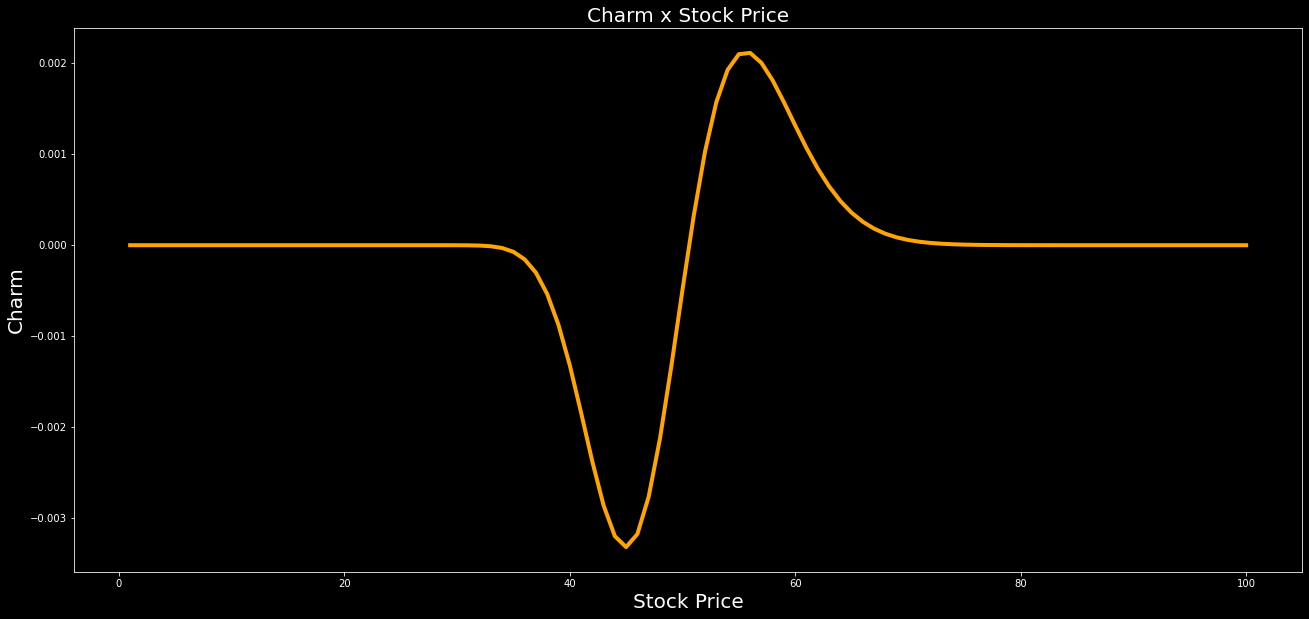

In [68]:
# The Color Effect
plt.figure(figsize=(22,10))
lista_charm=[]
for a in range(int(S_1*2)+1):
    lista_charm.append(N(charm.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))/days_year)
df=pd.DataFrame(pd.Series(lista_charm))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Charm x Stock Price",fontsize=20,color="white")
plt.xlabel("Stock Price",fontsize=20)
plt.ylabel("Charm",fontsize=20)
plt.show()

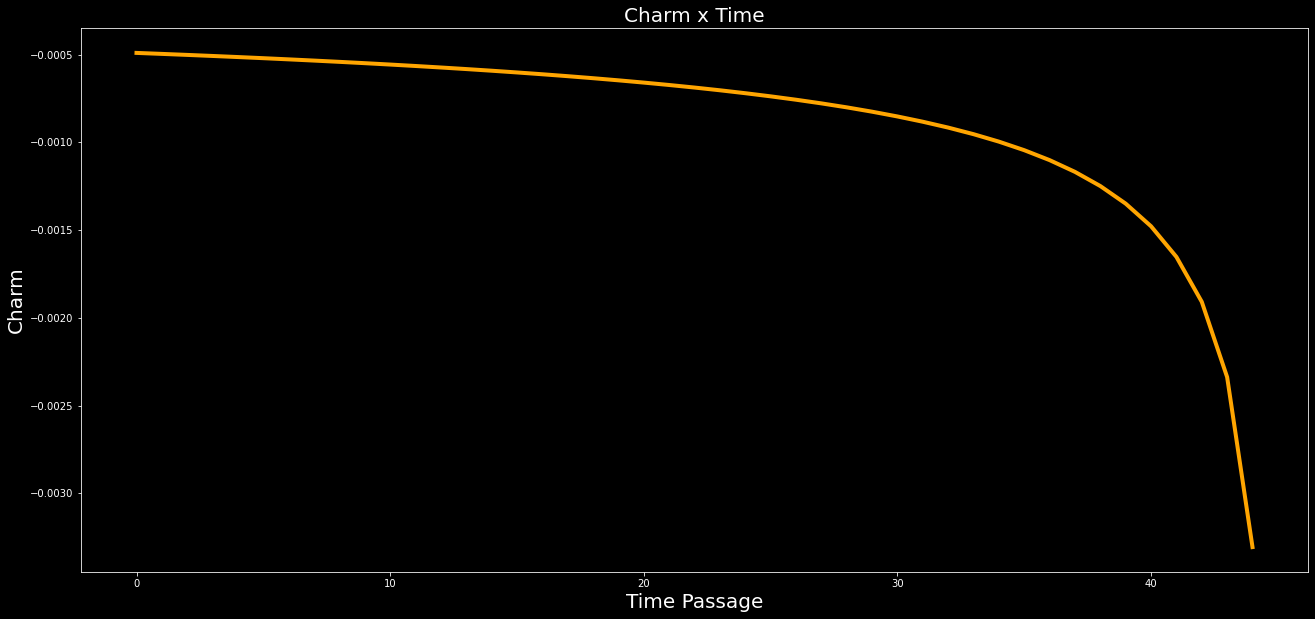

In [69]:
# New Greek
plt.figure(figsize=(22,10))
lista_charm=[]
for a in range(DTE):
    lista_charm.append(N(charm.subs(S,S_1).subs(K,K_1).subs(T,(DTE-a)/days_year).subs(q,q_1).subs(v,v_1).subs(r,r_1))/days_year)
df=pd.DataFrame(pd.Series(lista_charm))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Charm x Time",fontsize=20,color="white")
plt.xlabel("Time Passage",fontsize=20)
plt.ylabel("Charm",fontsize=20)
plt.show()

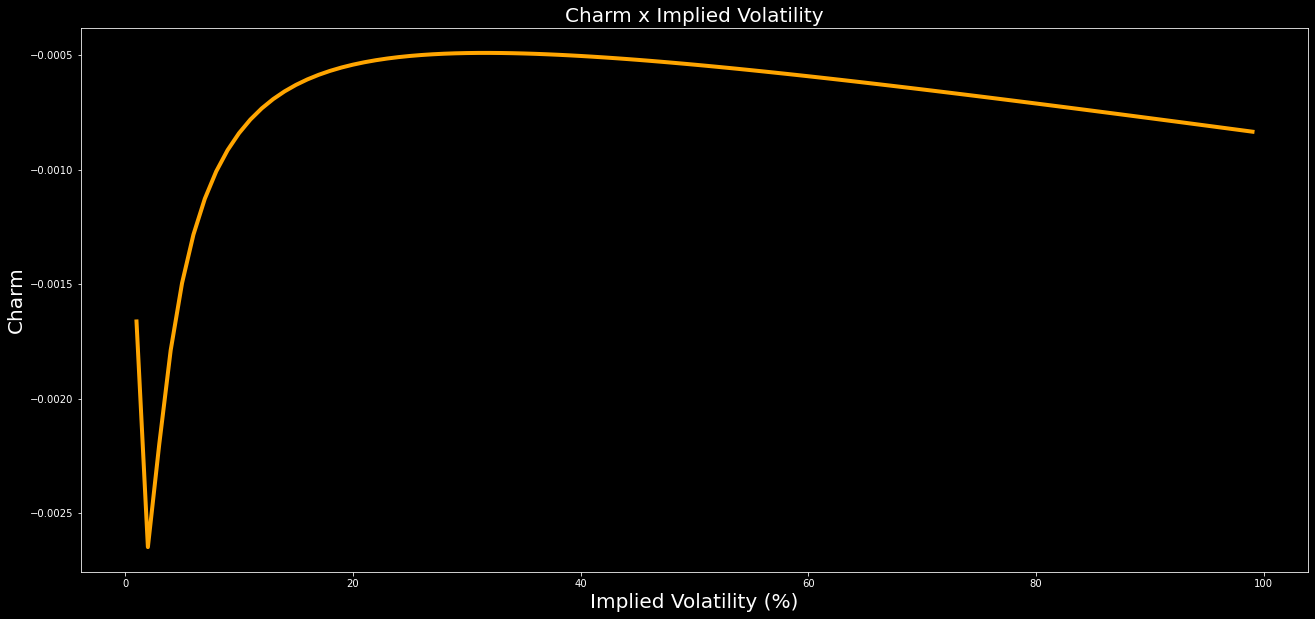

In [70]:
# New Greek
plt.figure(figsize=(22,10))
lista_charm=[]
for a in range(100):
    lista_charm.append(N(charm.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,a/100).subs(r,r_1))/days_year)
df=pd.DataFrame(pd.Series(lista_charm))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Charm x Implied Volatility",fontsize=20,color="white")
plt.xlabel("Implied Volatility (%)",fontsize=20)
plt.ylabel("Charm",fontsize=20)
plt.show()

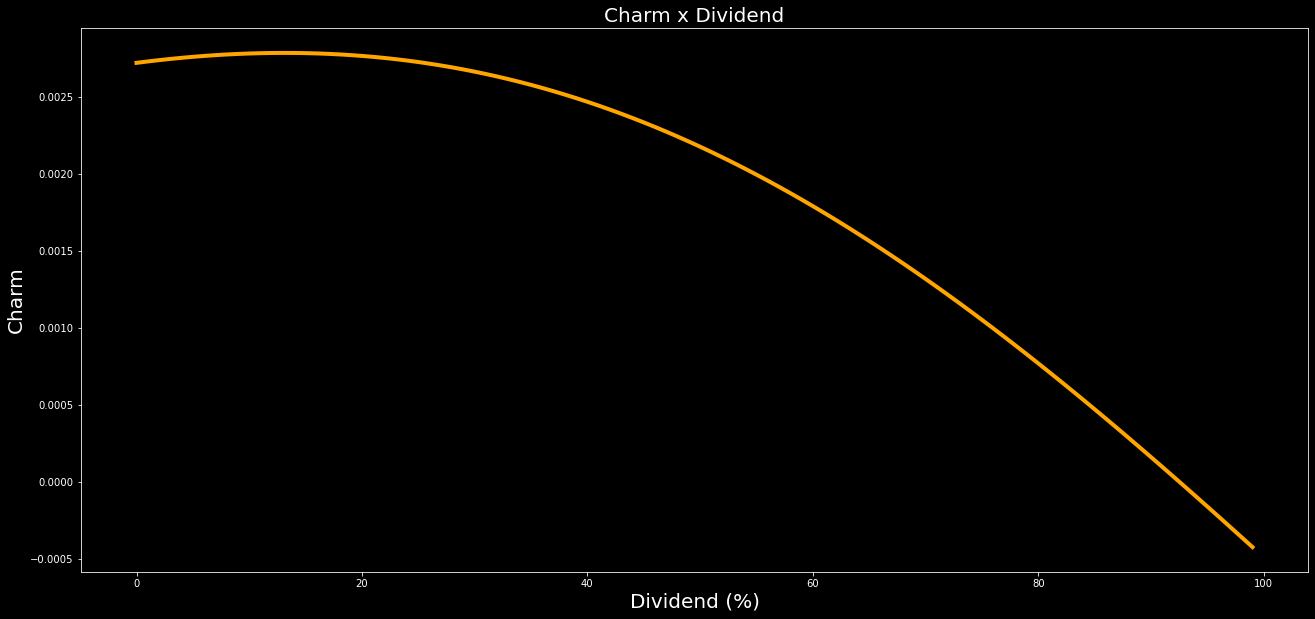

In [71]:
# New Greek but not so relevant changes
plt.figure(figsize=(22,10))
lista_charm=[]
for a in range(100):
    lista_charm.append(N(charm.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,(100/100-a/100)).subs(v,v_1).subs(r,r_1))/days_year)
df=pd.DataFrame(pd.Series(lista_charm))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Charm x Dividend",fontsize=20,color="white")
plt.xlabel("Dividend (%)",fontsize=20)
plt.ylabel("Charm",fontsize=20)
plt.show()

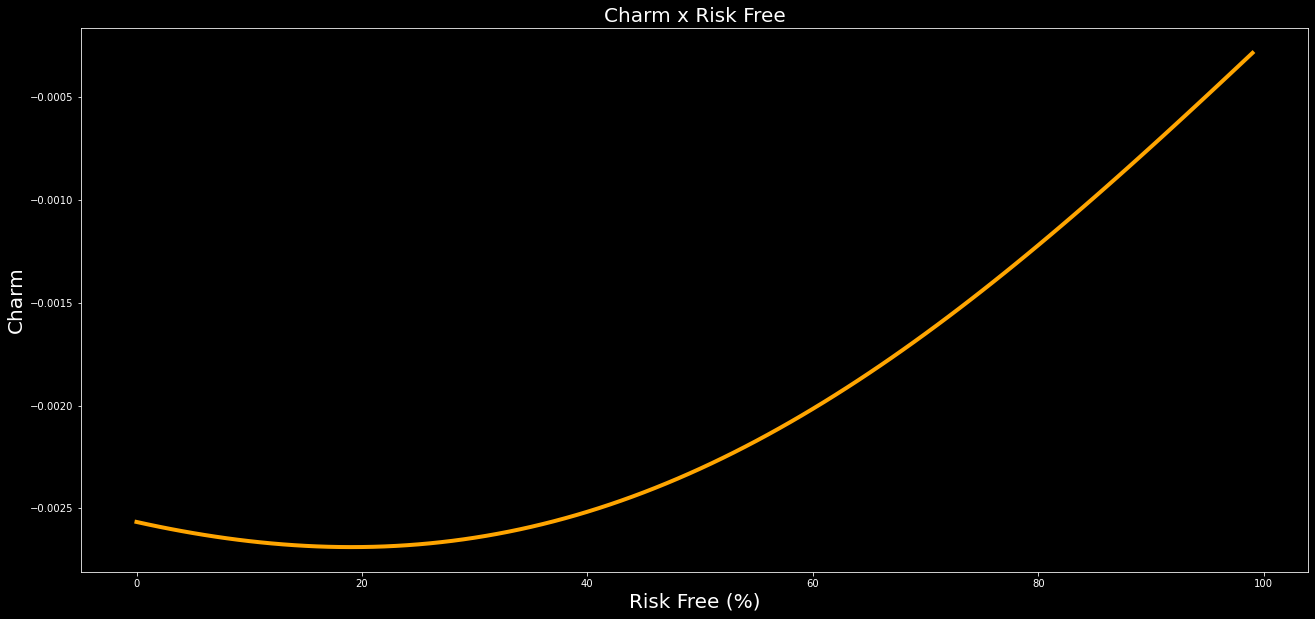

In [72]:
# New greek but not so relevant changes in Charm
plt.figure(figsize=(22,10))
lista_charm=[]
for a in range(100):
    lista_charm.append(N(charm.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,(100/100-a/100)))/days_year)
df=pd.DataFrame(pd.Series(lista_charm))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Charm x Risk Free",fontsize=20,color="white")
plt.xlabel("Risk Free (%)",fontsize=20)
plt.ylabel("Charm",fontsize=20)
plt.show()

## Vanna

$$
{\displaystyle {\text{Vanna}}={\frac {\partial \Delta }{\partial \sigma }}={\frac {\partial {\mathcal {V}}}{\partial S}}={\frac {\partial ^{2}Black Scholes}{\partial S\partial \sigma }}},
$$

Vanna represents the change of delta by 1% change in implied volatility, it's very important to delta hedge positions & portfolios, because it's possible to predict some movement in implied volatility and the impact in delta

## Derivate Black & Scholes to Stock Price and to Time

In [73]:
vanna=black_scholes.diff(S).diff(v)
vanna

-0.5*sqrt(2)*K*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))*(T*(-q + r + 0.5*v**2) + log(S/K))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S*T*v**3) + 0.5*sqrt(2)*K*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S*sqrt(T)*v**2) + 1.0*(0.5*sqrt(2)*sqrt(T) - sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))/(2*sqrt(T)*v**2))*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/sqrt(pi) + 0.5*sqrt(2)*(-1.0*(T*(-q + r + 0.5*v**2) + log(S/K))/v + (T*(-q + r + 0.5*v**2) + log(S/K))**2/(T*v**3))*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/(sqrt(pi)*sqrt(T)*v) - 0.5*sqrt(2)*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/(sqrt(pi)*sqrt(T)*v**2)

## Vanna value of pre determined option parameters 

It's necessary to divide by 100 to see the impact of 1% change in implied volatility

In [74]:
N(vanna.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))/100

-7.73415356737134e-5

Each 1% change in implied volatility  variates the delta by the value above, the graph delta per implied volatility show to us the "negative" impact of implied volatility increases in our delta

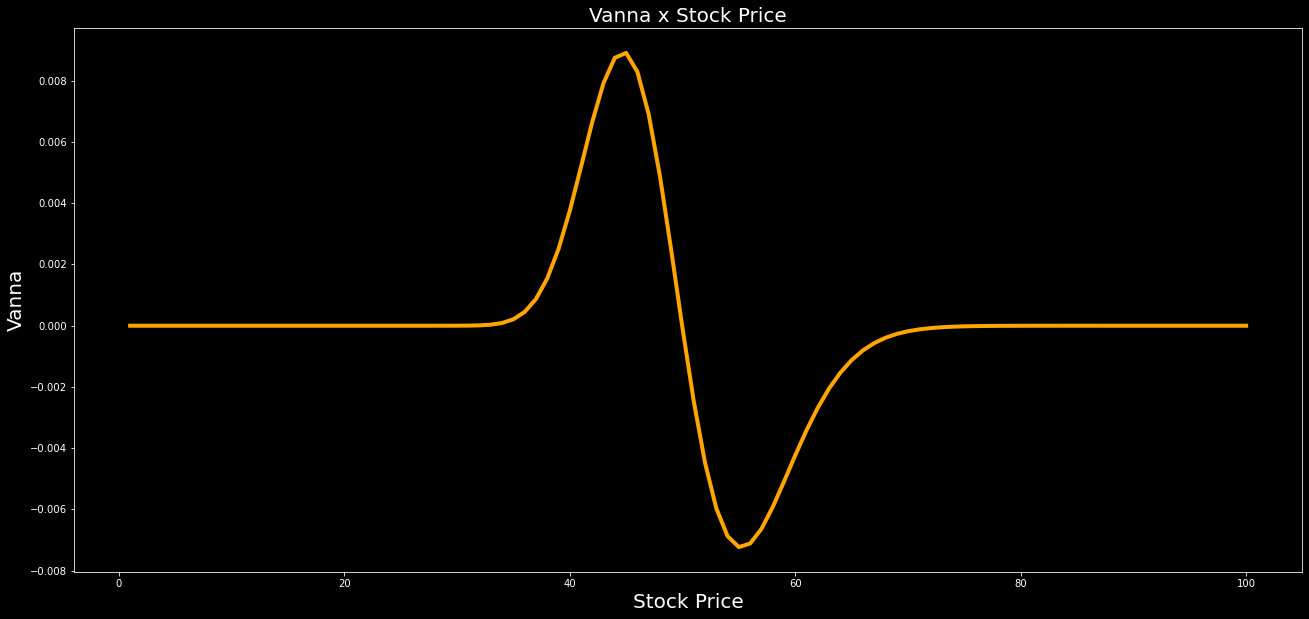

In [75]:
# The Zomma Effect!
plt.figure(figsize=(22,10))
lista_vanna=[]
for a in range(int(S_1*2)+1):
    lista_vanna.append(N(vanna.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_vanna))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vanna x Stock Price",fontsize=20,color="white")
plt.xlabel("Stock Price",fontsize=20)
plt.ylabel("Vanna",fontsize=20)
plt.show()

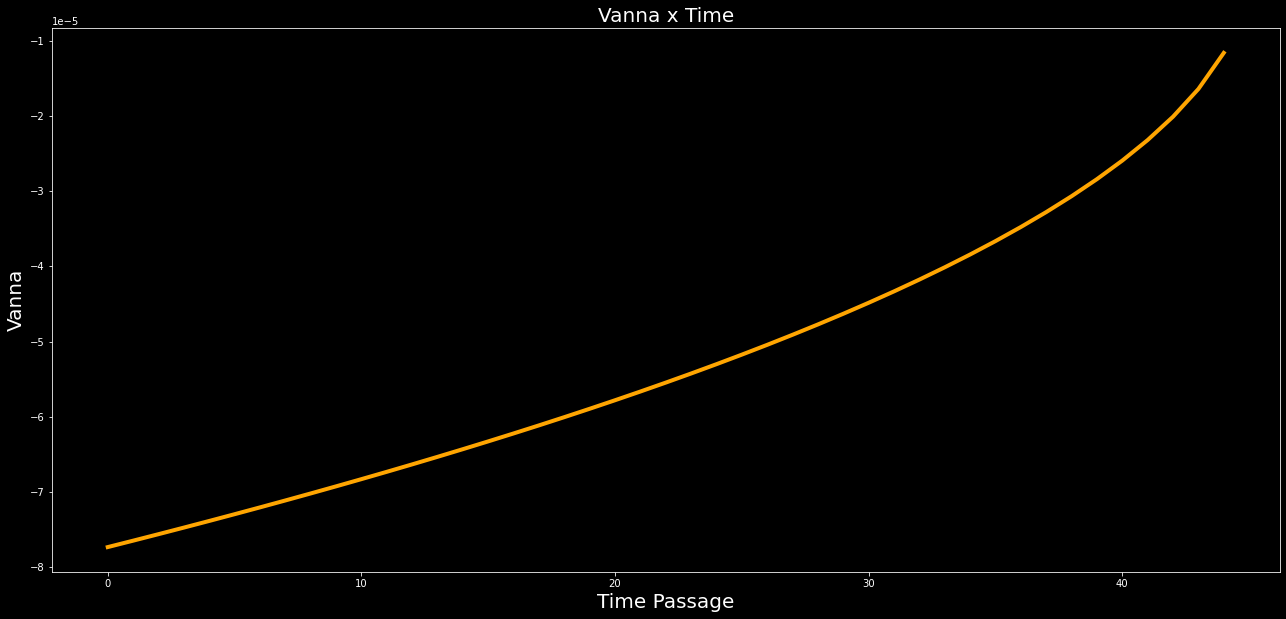

In [76]:
# New Greek!
plt.figure(figsize=(22,10))
lista_vanna=[]
for a in range(DTE):
    lista_vanna.append(N(vanna.subs(S,S_1).subs(K,K_1).subs(T,(DTE-a)/days_year).subs(q,q_1).subs(v,v_1).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_vanna))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vanna x Time",fontsize=20,color="white")
plt.xlabel("Time Passage",fontsize=20)
plt.ylabel("Vanna",fontsize=20)
plt.show()

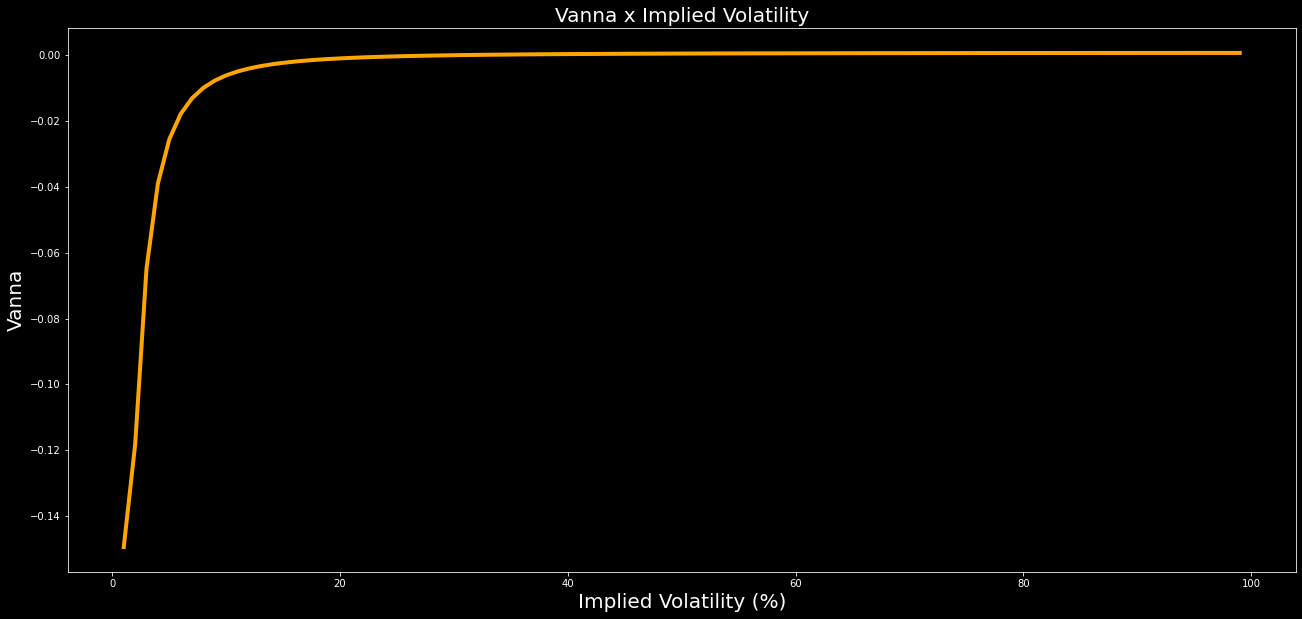

In [77]:
# New Greek
plt.figure(figsize=(22,10))
lista_vanna=[]
for a in range(100):
    lista_vanna.append(N(vanna.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,a/100).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_vanna))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vanna x Implied Volatility",fontsize=20,color="white")
plt.xlabel("Implied Volatility (%)",fontsize=20)
plt.ylabel("Vanna",fontsize=20)
plt.show()

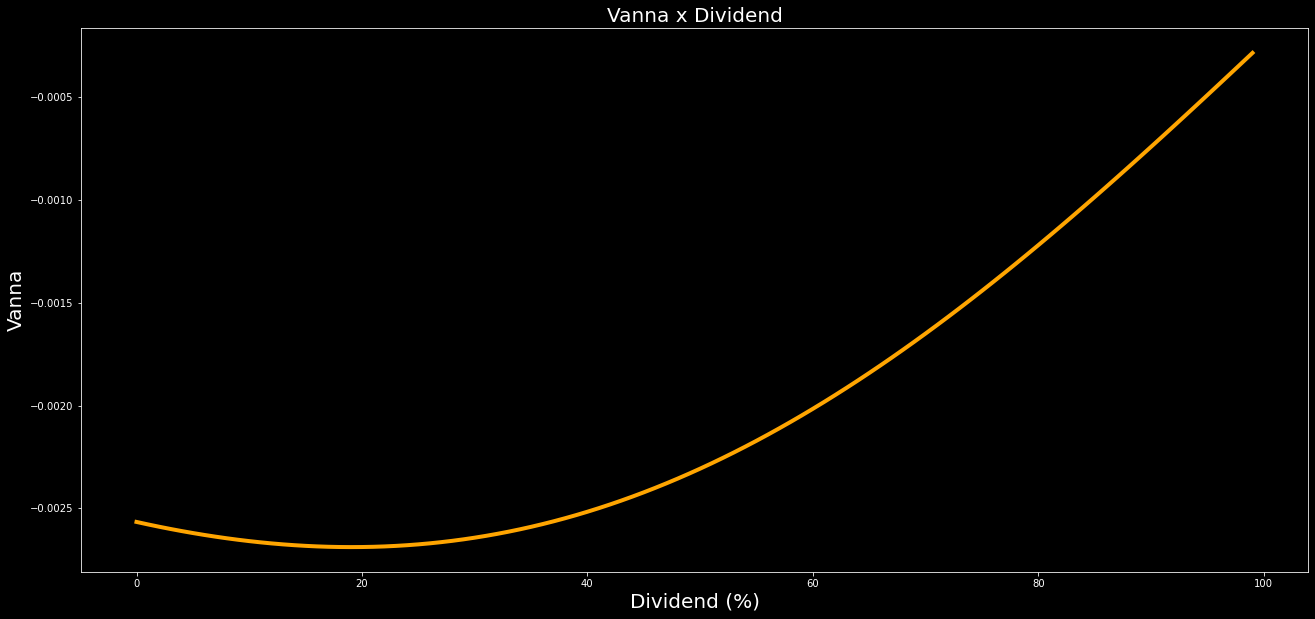

In [78]:
# New Greek but not so relevant changes
plt.figure(figsize=(22,10))
lista_vanna=[]
for a in range(100):
    lista_vanna.append(N(vanna.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,(100/100-a/100)).subs(v,v_1).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_charm))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vanna x Dividend",fontsize=20,color="white")
plt.xlabel("Dividend (%)",fontsize=20)
plt.ylabel("Vanna",fontsize=20)
plt.show()

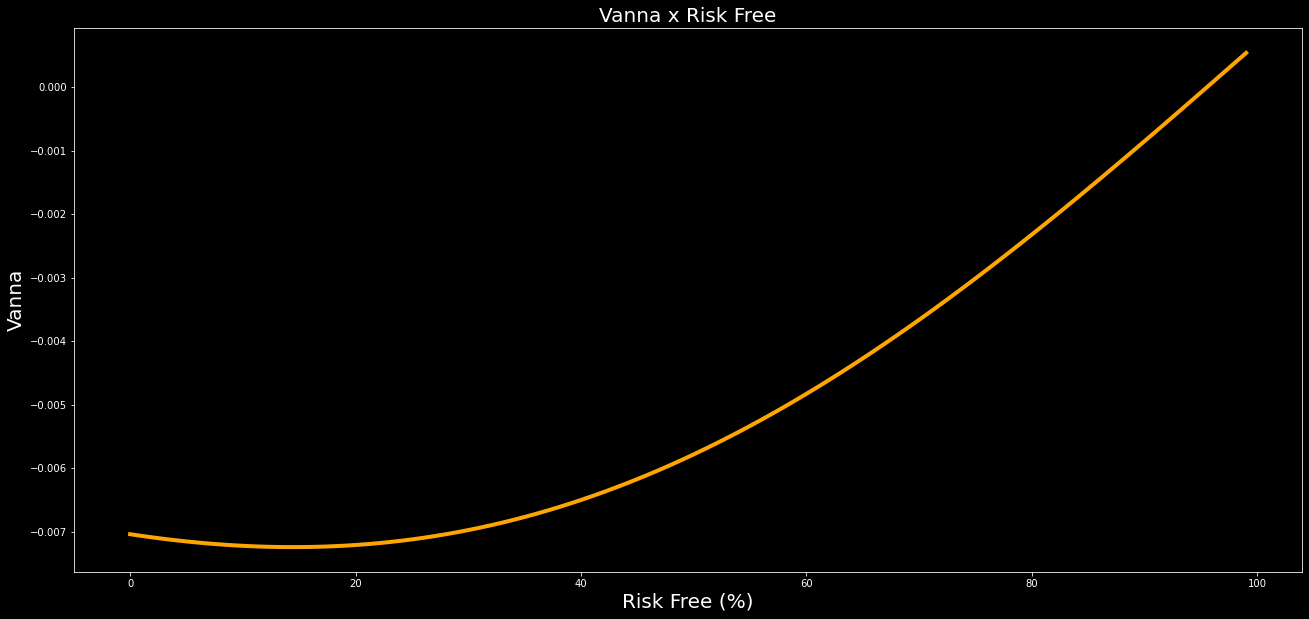

In [79]:
# New greek but not so relevant changes in vanna
plt.figure(figsize=(22,10))
lista_vanna=[]
for a in range(100):
    lista_vanna.append(N(vanna.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,(100/100-a/100)))/100)
df=pd.DataFrame(pd.Series(lista_vanna))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vanna x Risk Free",fontsize=20,color="white")
plt.xlabel("Risk Free (%)",fontsize=20)
plt.ylabel("Vanna",fontsize=20)
plt.show()

## Vomma

$$
{\displaystyle {\text{Vomma}}={\frac {\partial {\mathcal {V}}}{\partial \sigma }}={\frac {\partial ^{2}Black Scholes}{\partial \sigma ^{2}}}}
$$

## Derivate Black & Scholes to Volatility twice

In [80]:
vomma=black_scholes.diff(v).diff(v)
vomma.simplify()

sqrt(2)*(0.5*K*T**2*v**4*exp((2*T**2*q*v**2 + 2*T**2*r*v**2 + (T*(-q + r + 0.5*v**2) + log(S/K))**2 + (T*v**2 - T*(-q + r + 0.5*v**2) - log(S/K))**2)/(T*v**2)) - 1.0*K*T*v**2*(T*(-q + r + 0.5*v**2) + log(S/K))*exp((2*T**2*q*v**2 + 2*T**2*r*v**2 + (T*(-q + r + 0.5*v**2) + log(S/K))**2 + (T*v**2 - T*(-q + r + 0.5*v**2) - log(S/K))**2)/(T*v**2)) - 0.5*K*(T*(-q + r + 0.5*v**2) + log(S/K))**2*(T*v**2 - T*(-q + r + 0.5*v**2) - log(S/K))*exp((2*T**2*q*v**2 + 2*T**2*r*v**2 + (T*(-q + r + 0.5*v**2) + log(S/K))**2 + (T*v**2 - T*(-q + r + 0.5*v**2) - log(S/K))**2)/(T*v**2)) - 1.0*S*T*v**2*(0.5*T*v**2 - T*(-q + r + 0.5*v**2) - log(S/K))*exp((2*T**2*q*v**2 + 6*T**2*r*v**2 + (T*(-q + r + 0.5*v**2) + log(S/K))**2 + 3*(T*v**2 - T*(-q + r + 0.5*v**2) - log(S/K))**2)/(2*T*v**2)) - 0.5*S*(T*(-q + r + 0.5*v**2) + log(S/K))*(T*v**2 - T*(-q + r + 0.5*v**2) - log(S/K))*(1.0*T*v**2 - T*(-q + r + 0.5*v**2) - log(S/K))*exp((2*T**2*q*v**2 + 6*T**2*r*v**2 + (T*(-q + r + 0.5*v**2) + log(S/K))**2 + 3*(T*v**2 - T*(-

It's necessary to divide by 100 to see the impact of 1% change in implied volatility

In [81]:
N(vomma.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1)/100)

0.000150974915527367

Each 1% change in implied volatility variates vega by the value above

## Vomma Graphs

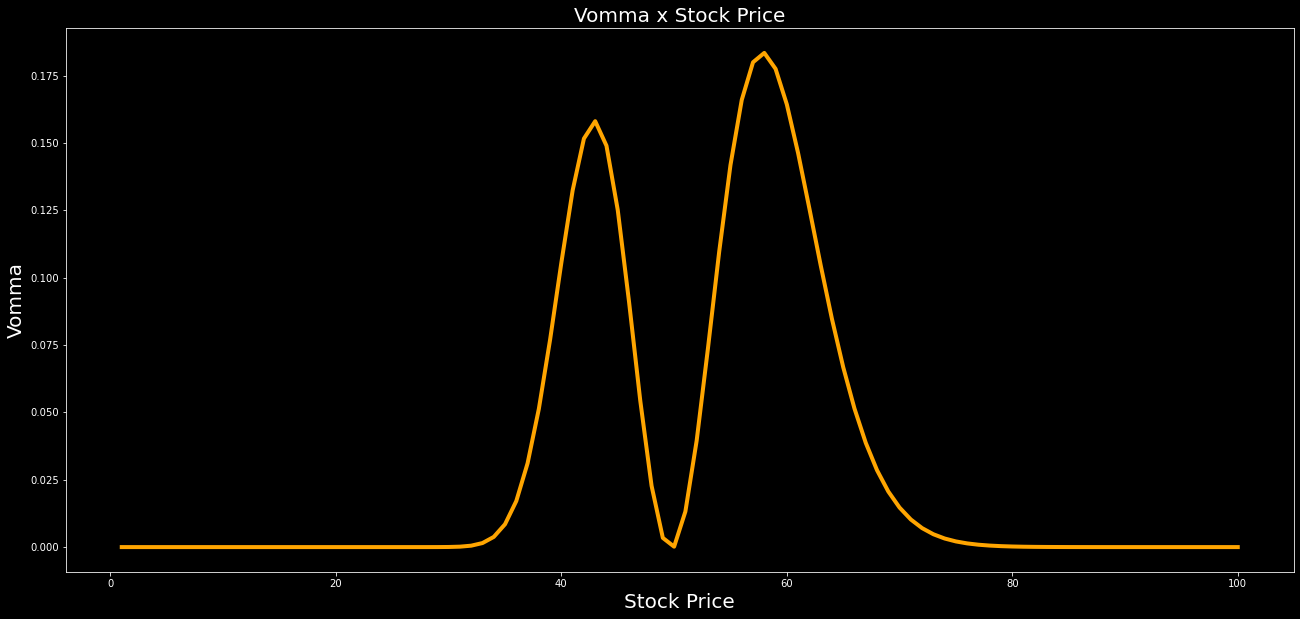

In [82]:
# new Greek!
plt.figure(figsize=(22,10))
lista_vomma=[]
for a in range(int(S_1*2)+1):
    lista_vomma.append(N(vomma.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))/(100))
df=pd.DataFrame(pd.Series(lista_vomma))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vomma x Stock Price",fontsize=20,color="white")
plt.xlabel("Stock Price",fontsize=20)
plt.ylabel("Vomma",fontsize=20)
plt.show()

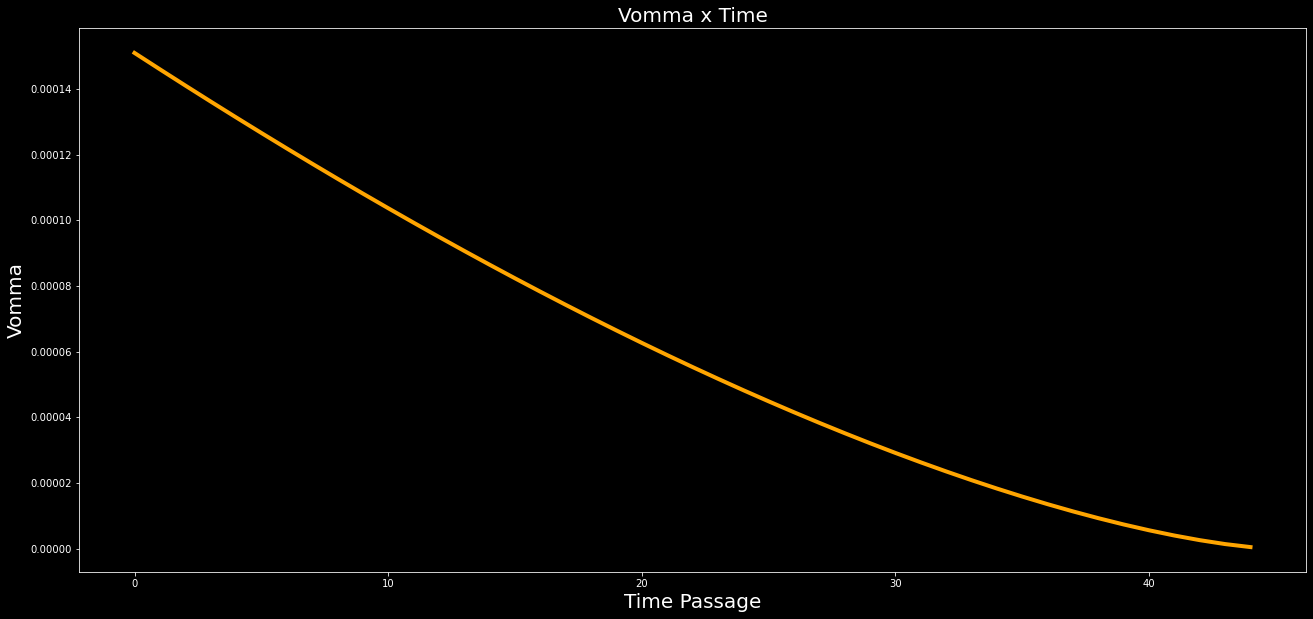

In [83]:
# New Greek!
plt.figure(figsize=(22,10))
lista_vomma=[]
for a in range(DTE):
    lista_vomma.append(N(vomma.subs(S,S_1).subs(K,K_1).subs(T,(DTE-a)/days_year).subs(q,q_1).subs(v,v_1).subs(r,r_1))/(100))
df=pd.DataFrame(pd.Series(lista_vomma))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vomma x Time",fontsize=20,color="white")
plt.xlabel("Time Passage",fontsize=20)
plt.ylabel("Vomma",fontsize=20)
plt.show()

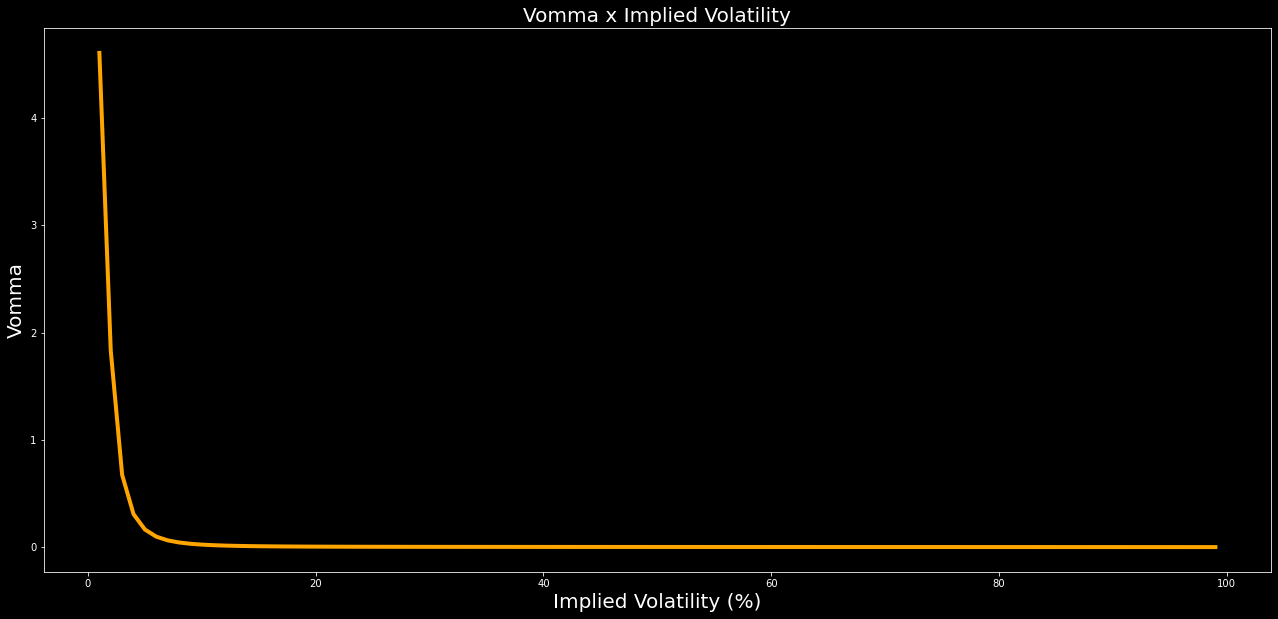

In [84]:
# Ultima Effect
plt.figure(figsize=(22,10))
lista_vomma=[]
for a in range(100):
    lista_vomma.append(N(vomma.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,a/100).subs(r,r_1))/(100))
df=pd.DataFrame(pd.Series(lista_vomma))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vomma x Implied Volatility",fontsize=20,color="white")
plt.xlabel("Implied Volatility (%)",fontsize=20)
plt.ylabel("Vomma",fontsize=20)
plt.show()

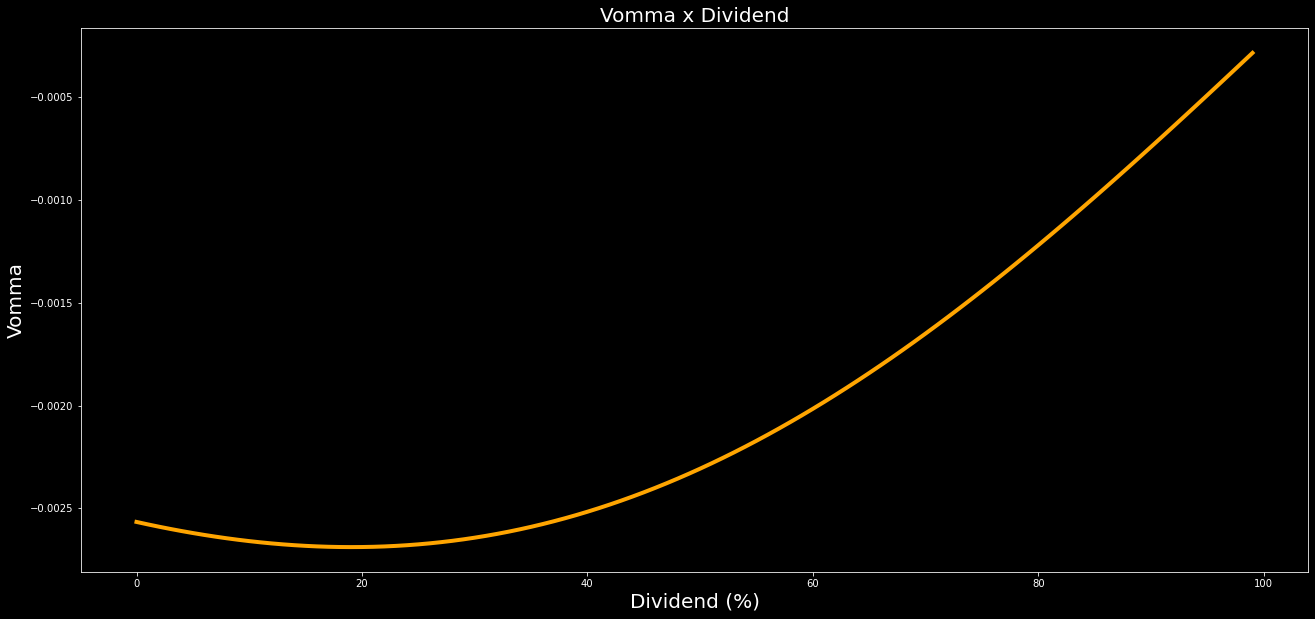

In [85]:
# New Greek but not so relevant changes
plt.figure(figsize=(22,10))
lista_vomma=[]
for a in range(100):
    lista_vomma.append(N(vomma.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,(100/100-a/100)).subs(v,v_1).subs(r,r_1))/(100*100))
df=pd.DataFrame(pd.Series(lista_charm))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vomma x Dividend",fontsize=20,color="white")
plt.xlabel("Dividend (%)",fontsize=20)
plt.ylabel("Vomma",fontsize=20)
plt.show()

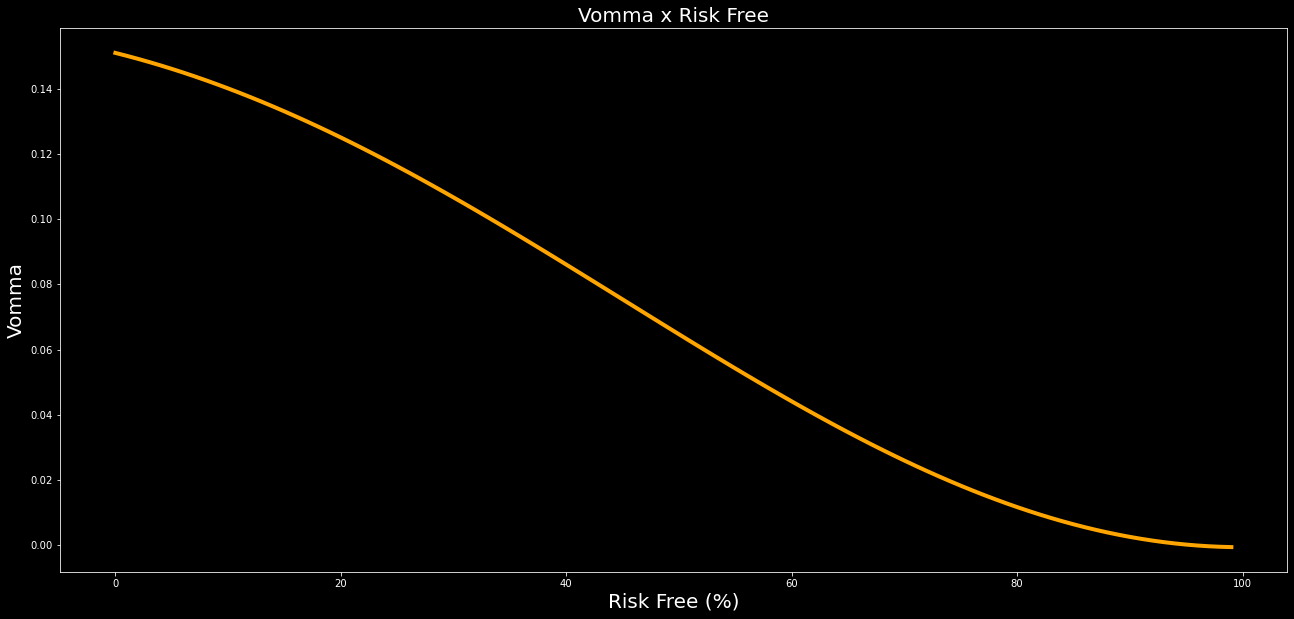

In [86]:
# New greek but not so relevant changes in vomma
plt.figure(figsize=(22,10))
lista_vomma=[]
for a in range(100):
    lista_vomma.append(N(vomma.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,(100/100-a/100)))/(100))
df=pd.DataFrame(pd.Series(lista_vomma))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vomma x Risk Free",fontsize=20,color="white")
plt.xlabel("Risk Free (%)",fontsize=20)
plt.ylabel("Vomma",fontsize=20)
plt.show()

## Veta
Negative signal because the days to expiration only goes down by the time passage


$$
{\displaystyle {\text{Veta}}=-{\frac {\partial {\mathcal {V}}}{\partial T }}=-{\frac {\partial ^{2}Black Scholes}{\partial \sigma \,\partial T }}}
$$

## Derivate Black & Scholes to Volatility and to Time

In [87]:
veta=-black_scholes.diff(T).diff(v)
veta

0.5*sqrt(2)*K*(-(-q + r + 0.5*v**2)/(sqrt(T)*v**2) + (T*(-q + r + 0.5*v**2) + log(S/K))/(2*T**(3/2)*v**2))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/sqrt(pi) + 0.5*sqrt(2)*K*r*(T*(-q + r + 0.5*v**2) + log(S/K))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*sqrt(T)*v**2) + 0.5*sqrt(2)*K*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))*(T*(-q + r + 0.5*v**2) + log(S/K))*(-v/(2*sqrt(T)) + (-q + r + 0.5*v**2)/(sqrt(T)*v) - (T*(-q + r + 0.5*v**2) + log(S/K))/(2*T**(3/2)*v))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*sqrt(T)*v**2) + 1.0*S*q*(0.5*sqrt(2)*sqrt(T) - sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))/(2*sqrt(T)*v**2))*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/sqrt(pi) - 1.0*S*(-1.0*(T*(-q + r + 0.5*v**2) + log(S/K))/v + (T*(-q + r + 0.5*v**2) + log(S/K))**2/(T*v**3))*(sqrt(2)*(-q + r + 0.5*v**2)/(2*sqrt(T)*v) - sqrt

## Veta value of pre determined option parameters

Divide by the number of days in a year to see the impact of 1 day change in vega value

In [88]:
N(veta.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))/(days_year)

-0.0763853612086999

Each 1 day passed variates vega by the value above

## Veta Graphs

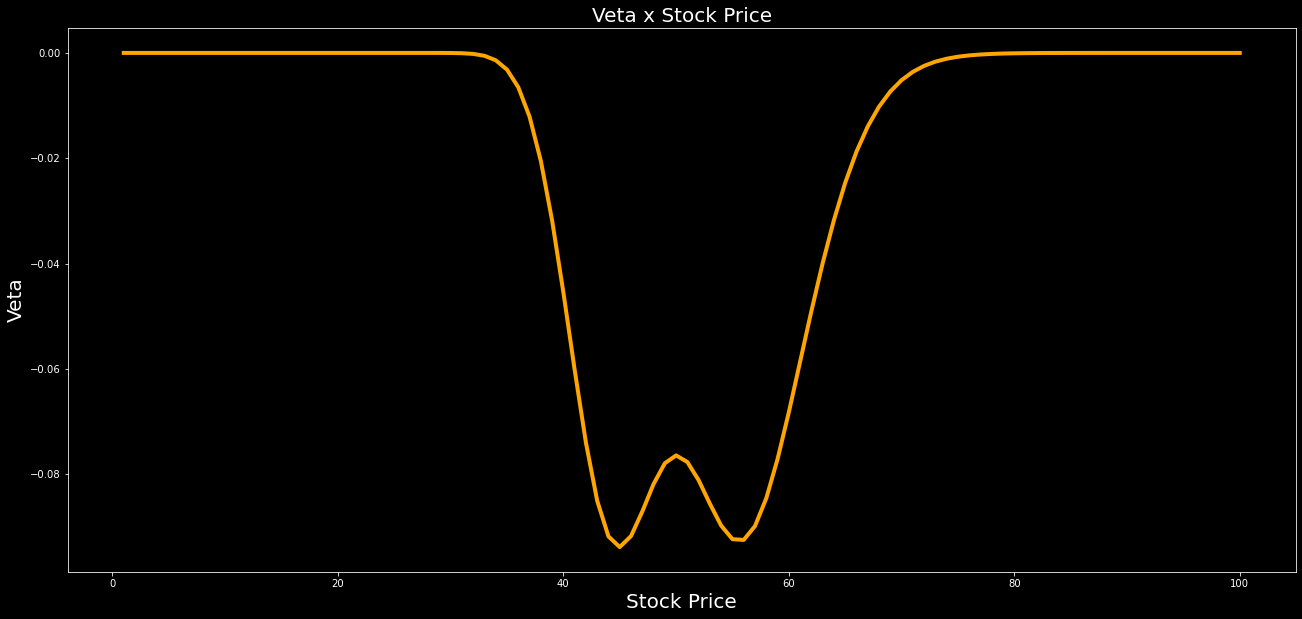

In [89]:
# new Greek!
plt.figure(figsize=(22,10))
lista_veta=[]
for a in range(int(S_1*2)+1):
    lista_veta.append(N(veta.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))/(days_year))
df=pd.DataFrame(pd.Series(lista_veta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Veta x Stock Price",fontsize=20,color="white")
plt.xlabel("Stock Price",fontsize=20)
plt.ylabel("Veta",fontsize=20)
plt.show()

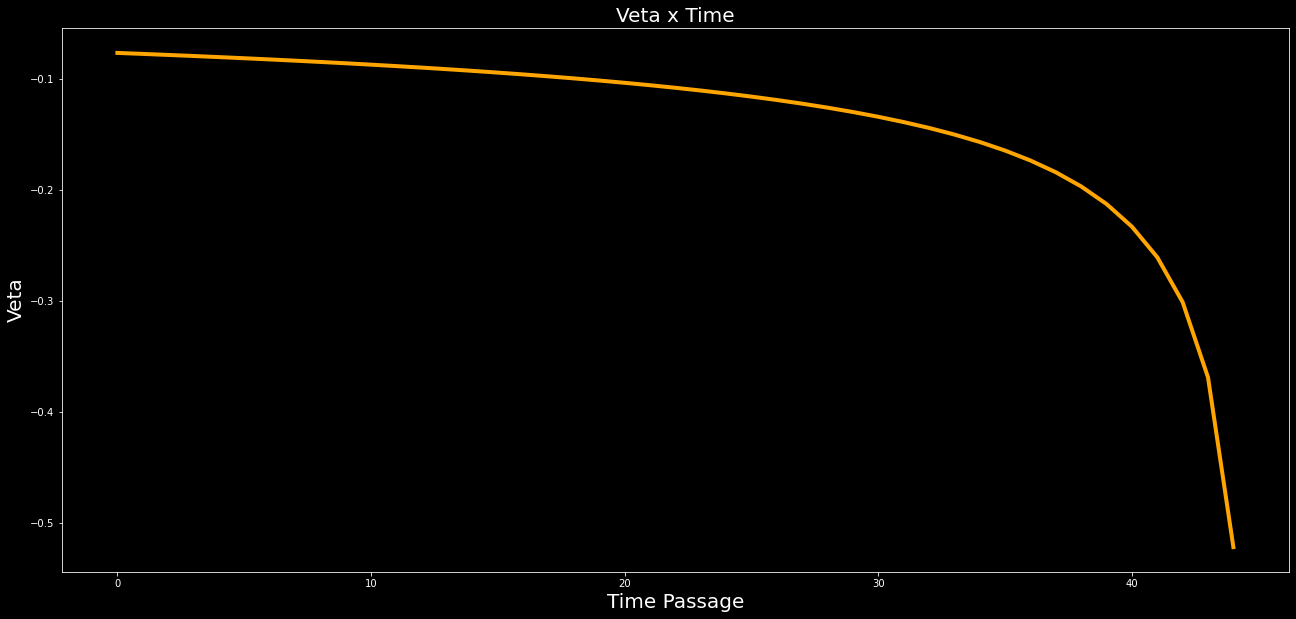

In [90]:
# New Greek!
plt.figure(figsize=(22,10))
lista_veta=[]
for a in range(DTE):
    lista_veta.append(N(veta.subs(S,S_1).subs(K,K_1).subs(T,(DTE-a)/days_year).subs(q,q_1).subs(v,v_1).subs(r,r_1))/(days_year))
df=pd.DataFrame(pd.Series(lista_veta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Veta x Time",fontsize=20,color="white")
plt.xlabel("Time Passage",fontsize=20)
plt.ylabel("Veta",fontsize=20)
plt.show()

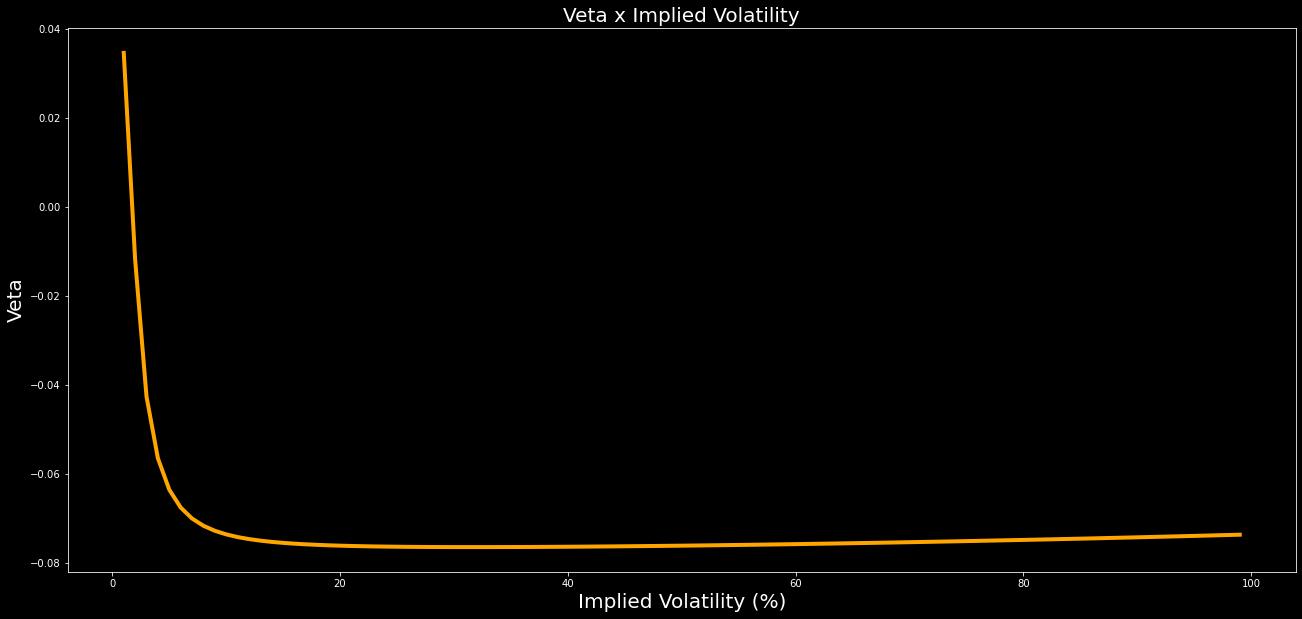

In [92]:
# Same new Greek as Vomma / Time
plt.figure(figsize=(22,10))
lista_veta=[]
for a in range(100):
    lista_veta.append(N(veta.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,a/100).subs(r,r_1))/(days_year))
df=pd.DataFrame(pd.Series(lista_veta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Veta x Implied Volatility",fontsize=20,color="white")
plt.xlabel("Implied Volatility (%)",fontsize=20)
plt.ylabel("Veta",fontsize=20)
plt.show()

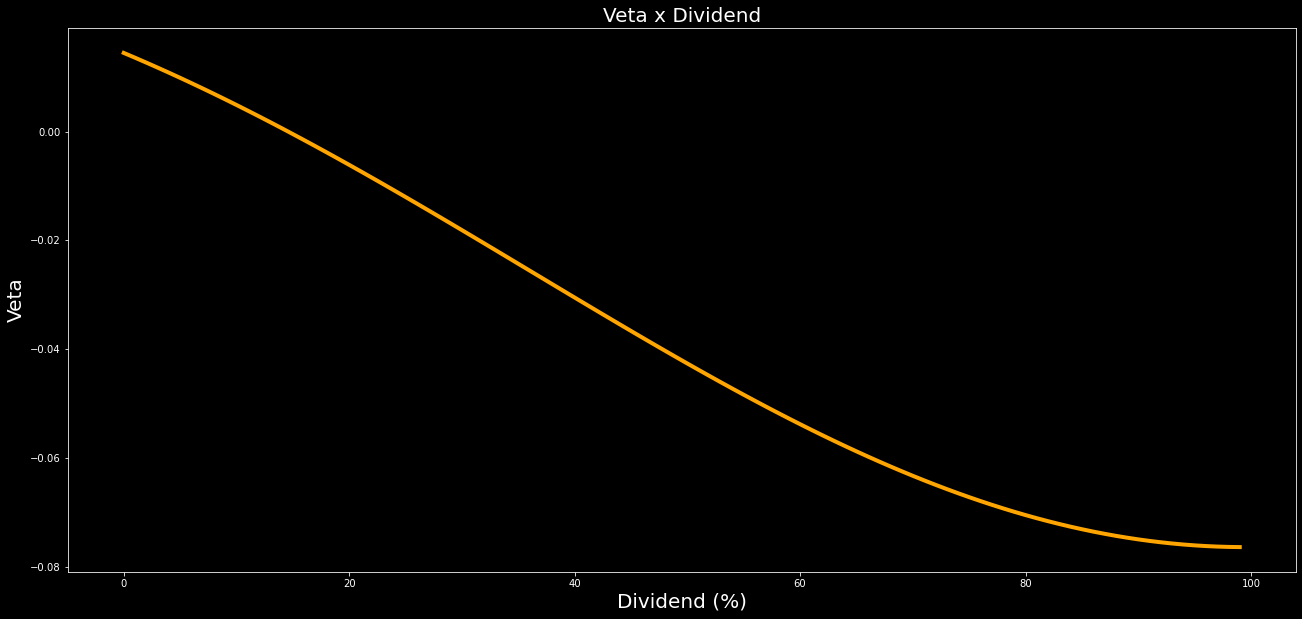

In [93]:
# New Greek but not so relevant changes
plt.figure(figsize=(22,10))
lista_veta=[]
for a in range(100):
    lista_veta.append(N(veta.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,(100/100-a/100)).subs(v,v_1).subs(r,r_1))/(days_year))
df=pd.DataFrame(pd.Series(lista_veta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Veta x Dividend",fontsize=20,color="white")
plt.xlabel("Dividend (%)",fontsize=20)
plt.ylabel("Veta",fontsize=20)
plt.show()

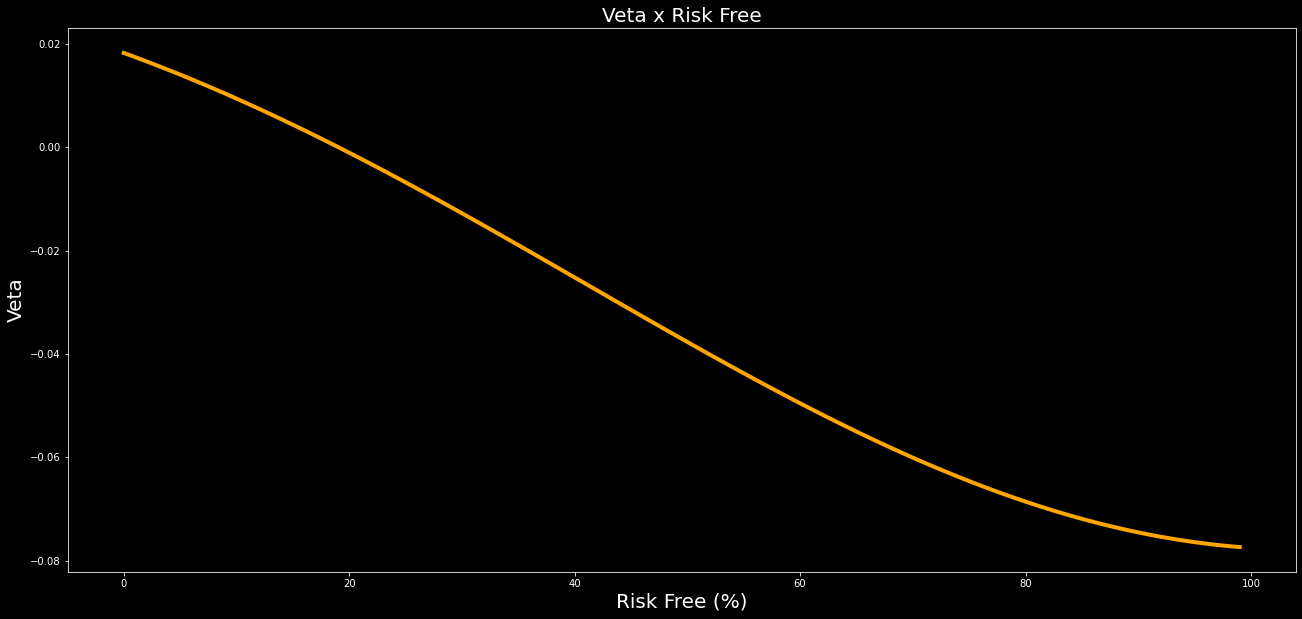

In [94]:
# New greek but not so relevant changes in vomma
plt.figure(figsize=(22,10))
lista_veta=[]
for a in range(100):
    lista_veta.append(N(veta.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,(100/100-a/100)))/(days_year))
df=pd.DataFrame(pd.Series(lista_veta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Veta x Risk Free",fontsize=20,color="white")
plt.xlabel("Risk Free (%)",fontsize=20)
plt.ylabel("Veta",fontsize=20)
plt.show()

## Vera

$$
{\displaystyle {\text{Vera}}={\frac {\partial \rho }{\partial \sigma }}={\frac {\partial ^{2}Black Scholes}{\partial \sigma \,\partial r}}}
$$

## Derivate Black & Scholes to Volatility and to Risk Free

In [95]:
vera=black_scholes.diff(v).diff(r)
vera

-0.5*sqrt(2)*K*sqrt(T)*(T*(-q + r + 0.5*v**2) + log(S/K))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*v**2) + 0.5*sqrt(2)*K*sqrt(T)*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*v**2) - 0.5*sqrt(2)*K*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))*(T*(-q + r + 0.5*v**2) + log(S/K))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*v**3) - 0.5*sqrt(2)*S*sqrt(T)*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/(sqrt(pi)*v**2) - 1.0*S*(0.5*sqrt(2)*sqrt(T) - sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))/(2*sqrt(T)*v**2))*(T*(-q + r + 0.5*v**2) + log(S/K))*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/(sqrt(pi)*v**2)

## Vera value of pre determined option parameters

Need to divide by 100 to see the impact of 1% risk free rate change in vega value

In [96]:
N(vera.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1)/(100))

-0.00905849493164639

Each 1% change in the risk free rate variates vega by the value above

## Vera Graphs

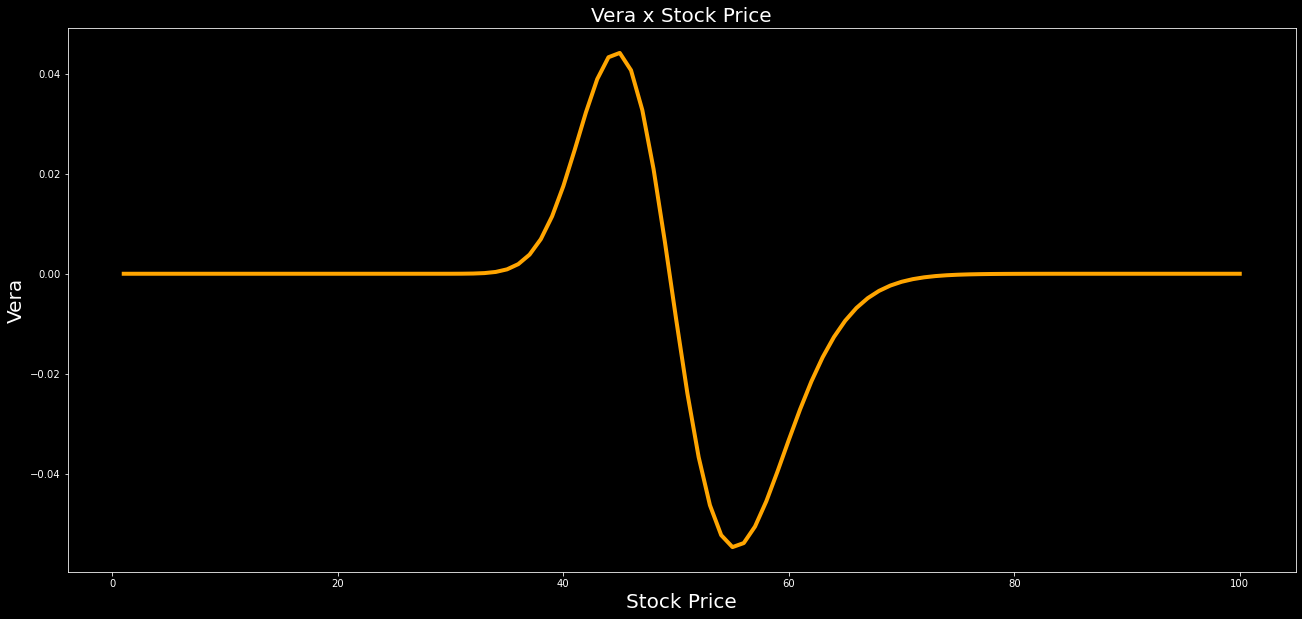

In [97]:
# new Greek!
plt.figure(figsize=(22,10))
lista_vera=[]
for a in range(int(S_1*2)+1):
    lista_vera.append(N(vera.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))/(100))
df=pd.DataFrame(pd.Series(lista_vera))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vera x Stock Price",fontsize=20,color="white")
plt.xlabel("Stock Price",fontsize=20)
plt.ylabel("Vera",fontsize=20)
plt.show()

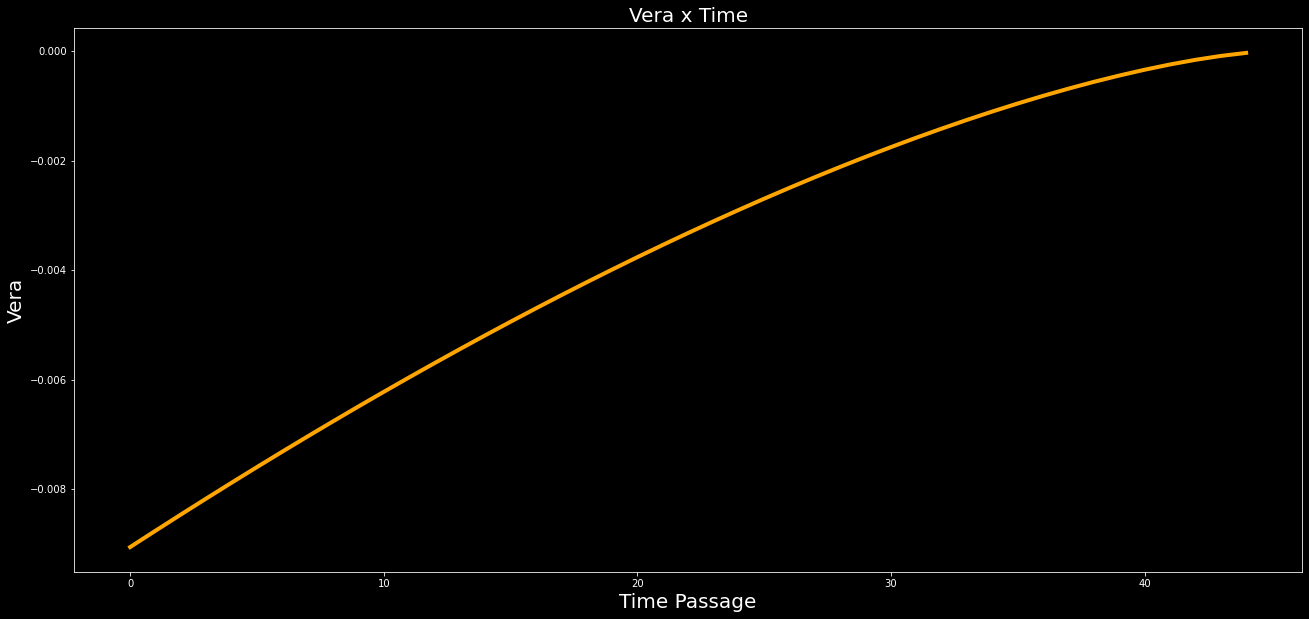

In [98]:
# New Greek!
plt.figure(figsize=(22,10))
lista_vera=[]
for a in range(DTE):
    lista_vera.append(N(vera.subs(S,S_1).subs(K,K_1).subs(T,(DTE-a)/days_year).subs(q,q_1).subs(v,v_1).subs(r,r_1))/(100))
df=pd.DataFrame(pd.Series(lista_vera))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vera x Time",fontsize=20,color="white")
plt.xlabel("Time Passage",fontsize=20)
plt.ylabel("Vera",fontsize=20)
plt.show()

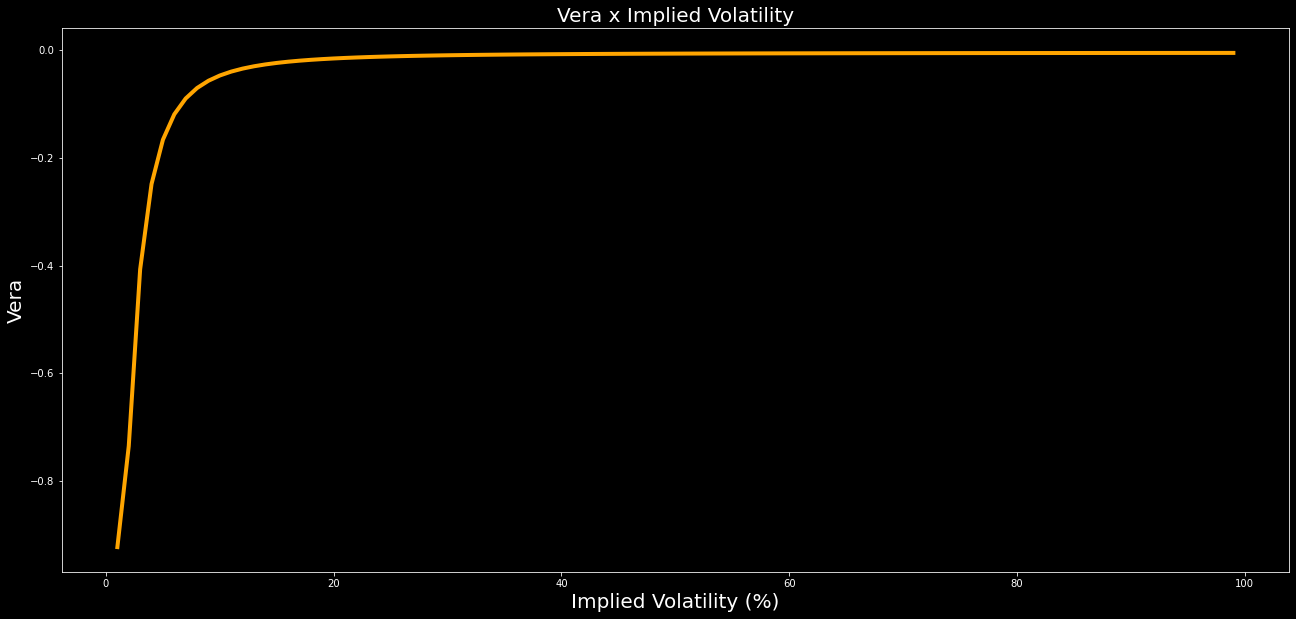

In [99]:
plt.figure(figsize=(22,10))
lista_vera=[]
for a in range(100):
    lista_vera.append(N(vera.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,a/100).subs(r,r_1))/(100))
df=pd.DataFrame(pd.Series(lista_vera))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vera x Implied Volatility",fontsize=20,color="white")
plt.xlabel("Implied Volatility (%)",fontsize=20)
plt.ylabel("Vera",fontsize=20)
plt.show()

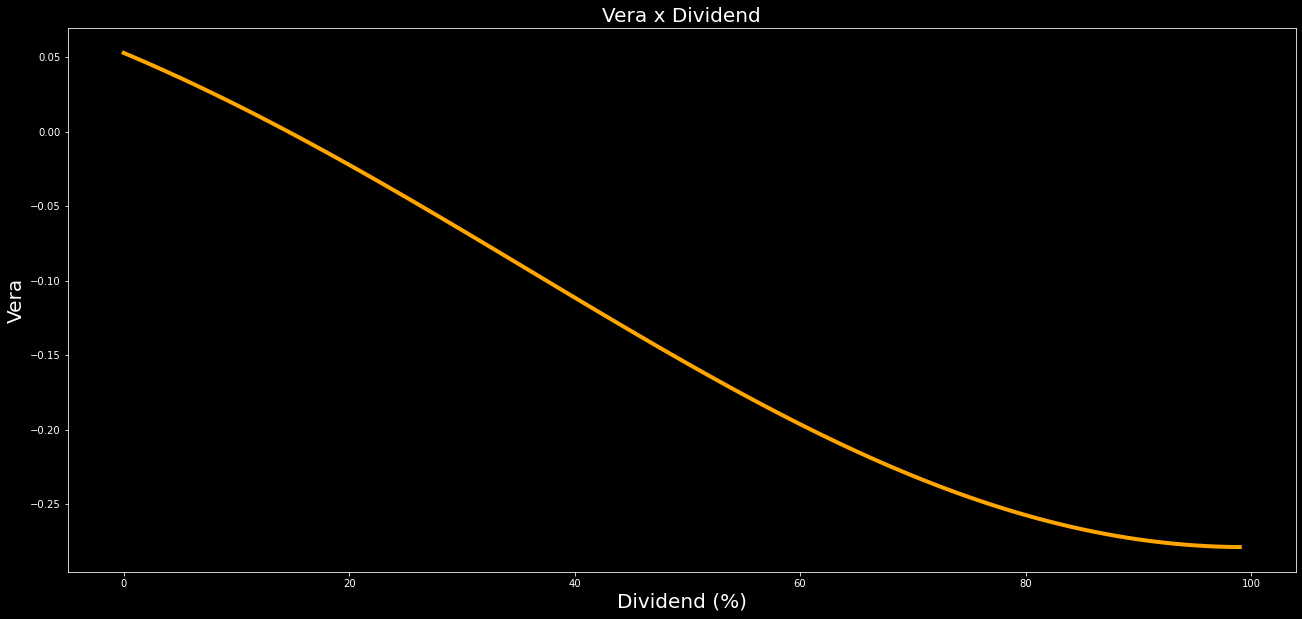

In [100]:
plt.figure(figsize=(22,10))
lista_vera=[]
for a in range(100):
    lista_vera.append(N(veta.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,(100/100-a/100)).subs(v,v_1).subs(r,r_1))/(100))
df=pd.DataFrame(pd.Series(lista_vera))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vera x Dividend",fontsize=20,color="white")
plt.xlabel("Dividend (%)",fontsize=20)
plt.ylabel("Vera",fontsize=20)
plt.show()

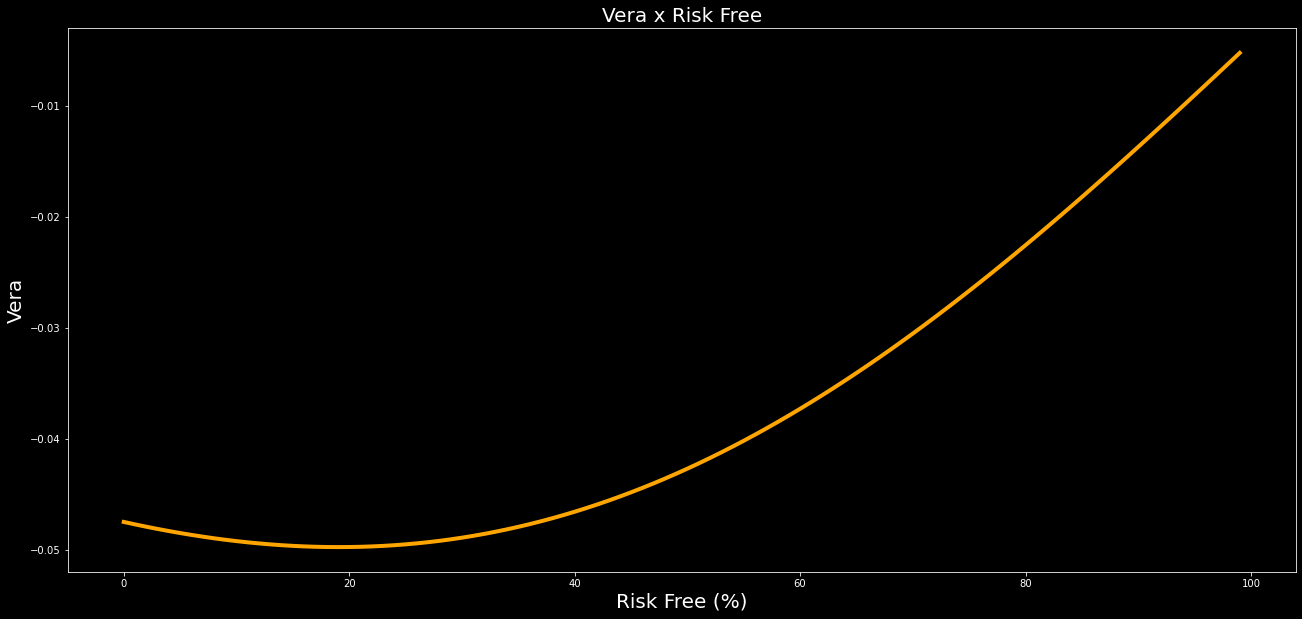

In [101]:
plt.figure(figsize=(22,10))
lista_vera=[]
for a in range(100):
    lista_vera.append(N(vera.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,(100/100-a/100)))/(100))
df=pd.DataFrame(pd.Series(lista_vera))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Vera x Risk Free",fontsize=20,color="white")
plt.xlabel("Risk Free (%)",fontsize=20)
plt.ylabel("Vera",fontsize=20)
plt.show()

# Third Order Greeks

## Speed

$$
{\displaystyle {\text{Speed}}={\frac {\partial \Gamma }{\partial S}}={\frac {\partial ^{3}Black Scholes}{\partial S^{3}}}}
$$

Speed measure the variation in gamma by stock price change, this greek is important in delta-gamma hedge because some structures hedged before can losse this condition by the stock price variation beeing market directional

## Derivate Black & Scholes to Stock Price three times

In [102]:
speed=black_scholes.diff(S).diff(S).diff(S)
speed

-1.5*sqrt(2)*K*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S**3*T*v**2) - 1.0*sqrt(2)*K*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S**3*sqrt(T)*v) - 0.5*sqrt(2)*K*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S**3*T**(3/2)*v**3) + 0.5*sqrt(2)*K*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S**3*T**(3/2)*v**3) - 0.5*sqrt(2)*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/(sqrt(pi)*S**2*sqrt(T)*v) - 0.5*sqrt(2)*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/(sqrt(pi)*S**2*T**(3/2)*v**3) + 0.5*sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))**2*exp(-T*q)*exp(-(T*(-q + r + 0.5*v**2) + log(S/K))**2/(2*T*v**2))/(sqrt(pi)*S**2*T**(5/2)*v**5)

## Speed value of pre determined option parameters

In [103]:
N(speed.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))

-0.00309480722747681

Each $1 change in the stock price variates gamma by the value above

## Speed Graphs

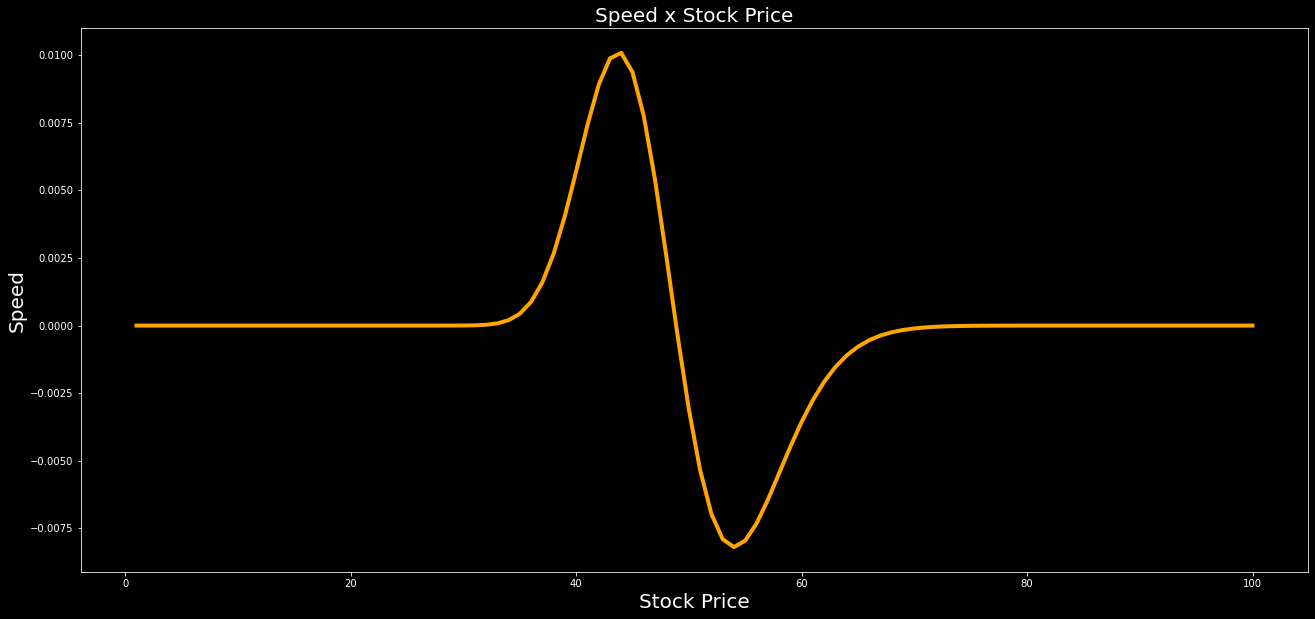

In [104]:
# new Greek!
plt.figure(figsize=(22,10))
lista_speed=[]
for a in range(int(S_1*2)+1):
    lista_speed.append(N(speed.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1)))
df=pd.DataFrame(pd.Series(lista_speed))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Speed x Stock Price",fontsize=20,color="white")
plt.xlabel("Stock Price",fontsize=20)
plt.ylabel("Speed",fontsize=20)
plt.show()

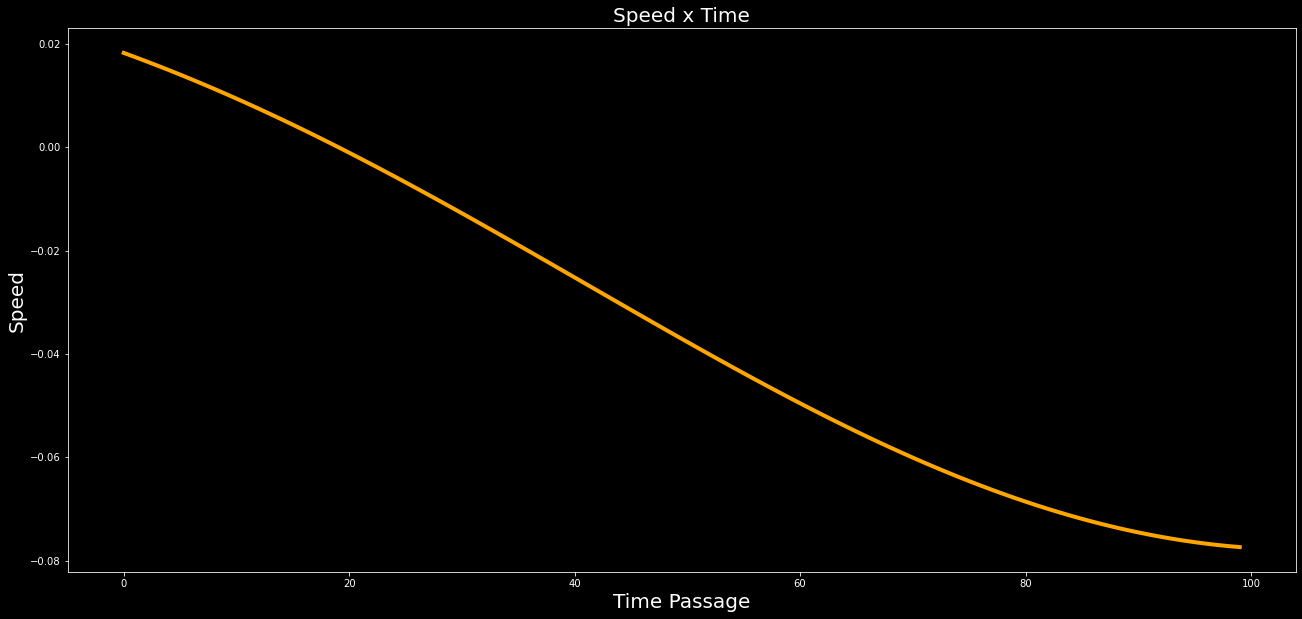

In [105]:
# New Greek!
plt.figure(figsize=(22,10))
lista_speed=[]
for a in range(DTE):
    lista_speed.append(N(speed.subs(S,S_1).subs(K,K_1).subs(T,(DTE-a)/days_year).subs(q,q_1).subs(v,v_1).subs(r,r_1)))
df=pd.DataFrame(pd.Series(lista_veta))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Speed x Time",fontsize=20,color="white")
plt.xlabel("Time Passage",fontsize=20)
plt.ylabel("Speed",fontsize=20)
plt.show()

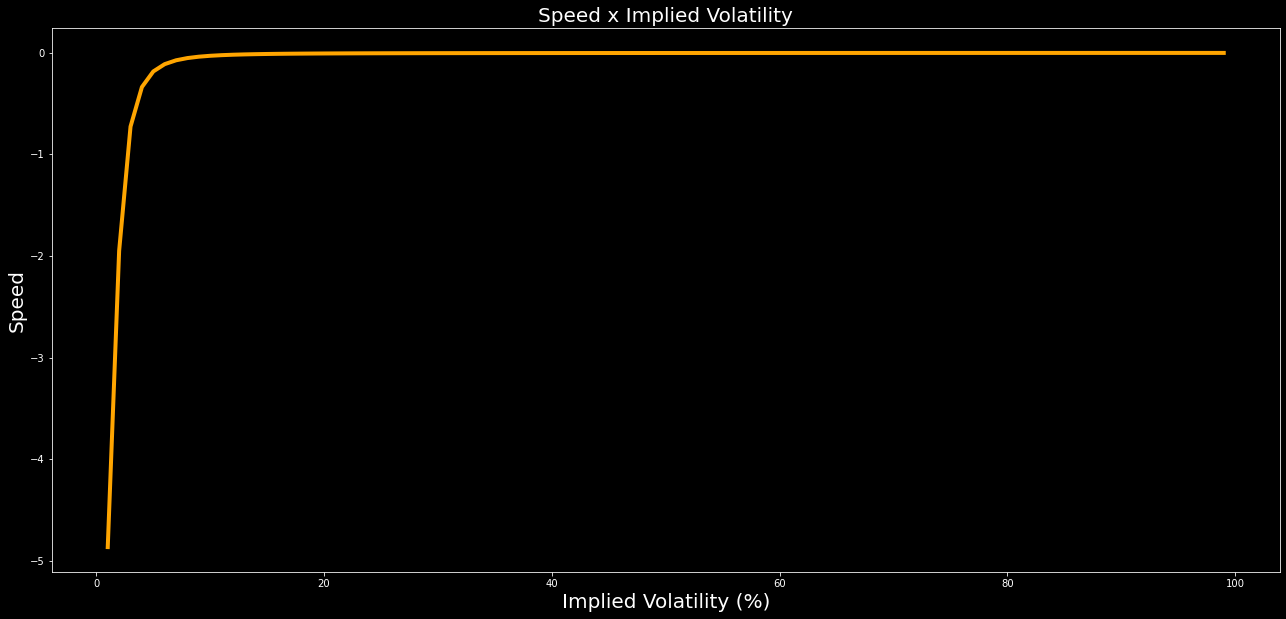

In [110]:
plt.figure(figsize=(22,10))
lista_speed=[]
for a in range(100):
    lista_speed.append(N(speed.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,a/100).subs(r,r_1)))
df=pd.DataFrame(pd.Series(lista_speed))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Speed x Implied Volatility",fontsize=20,color="white")
plt.xlabel("Implied Volatility (%)",fontsize=20)
plt.ylabel("Speed",fontsize=20)
plt.show()

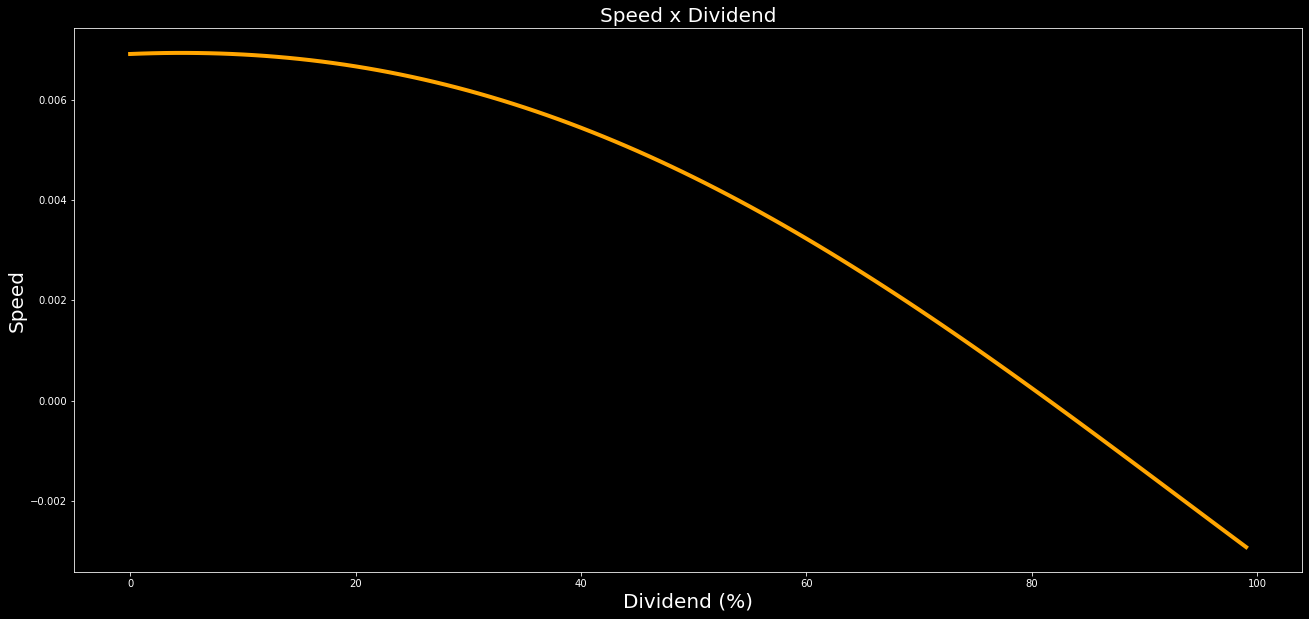

In [107]:
plt.figure(figsize=(22,10))
lista_speed=[]
for a in range(100):
    lista_speed.append(N(speed.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,(100/100-a/100)).subs(v,v_1).subs(r,r_1)))
df=pd.DataFrame(pd.Series(lista_speed))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Speed x Dividend",fontsize=20,color="white")
plt.xlabel("Dividend (%)",fontsize=20)
plt.ylabel("Speed",fontsize=20)
plt.show()

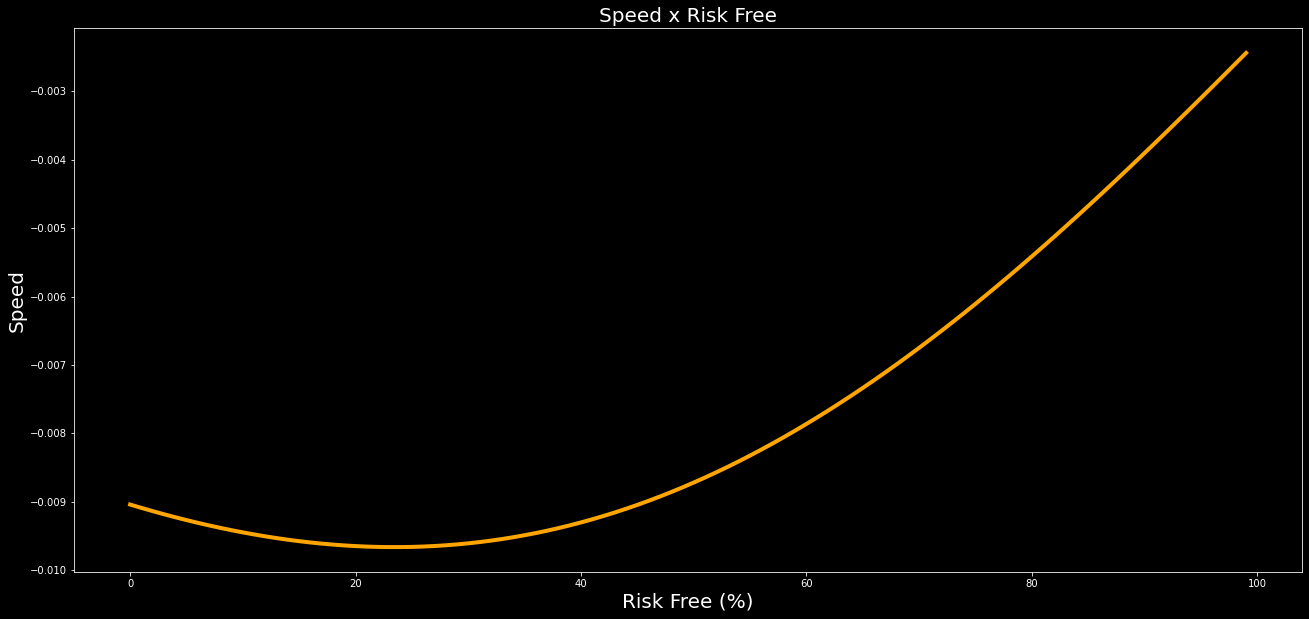

In [111]:
plt.figure(figsize=(22,10))
lista_speed=[]
for a in range(100):
    lista_speed.append(N(speed.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,(100/100-a/100))))
df=pd.DataFrame(pd.Series(lista_speed))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Speed x Risk Free",fontsize=20,color="white")
plt.xlabel("Risk Free (%)",fontsize=20)
plt.ylabel("Speed",fontsize=20)
plt.show()

## Zomma

$$
{\displaystyle {\text{Zomma}}={\frac {\partial \Gamma }{\partial \sigma }}={\frac {\partial {\text{vanna}}}{\partial S}}={\frac {\partial ^{3}Black Scholes}{\partial S^{2}\,\partial \sigma }}}
$$

Zomma measures the change in Gamma by the Implied Volatility variation, very important to delta- gamma hedge strategies & portfolios, because the implied volatility change can break de neutral gamma

## Derivate Black & Scholes twice to Stock Price and once to Volatility

In [112]:
zomma=black_scholes.diff(S).diff(S).diff(v)
zomma.simplify()

sqrt(2)*(-0.5*K*T**2*v**4*exp((4*T**2*q*v**2 + 2*T**2*r*v**2 + 2*(T*(-q + r + 0.5*v**2) + log(S/K))**2 + (T*v**2 - T*(-q + r + 0.5*v**2) - log(S/K))**2)/(T*v**2)) + K*T*v**2*(1.0*T*v**2 - 1.5*T*(-q + r + 0.5*v**2) - 0.5*(T*(-q + r + 0.5*v**2) + log(S/K))*(T*v**2 - T*(-q + r + 0.5*v**2) - log(S/K)) - 1.5*log(S/K))*exp((4*T**2*q*v**2 + 2*T**2*r*v**2 + 2*(T*(-q + r + 0.5*v**2) + log(S/K))**2 + (T*v**2 - T*(-q + r + 0.5*v**2) - log(S/K))**2)/(T*v**2)) + 0.5*K*(T*(-q + r + 0.5*v**2) + log(S/K))*(T*v**2 - T*(-q + r + 0.5*v**2) - log(S/K))**2*exp((4*T**2*q*v**2 + 2*T**2*r*v**2 + 2*(T*(-q + r + 0.5*v**2) + log(S/K))**2 + (T*v**2 - T*(-q + r + 0.5*v**2) - log(S/K))**2)/(T*v**2)) - 1.0*S*T**2*v**4*exp(3*(2*T**2*q*v**2 + 2*T**2*r*v**2 + (T*(-q + r + 0.5*v**2) + log(S/K))**2 + (T*v**2 - T*(-q + r + 0.5*v**2) - log(S/K))**2)/(2*T*v**2)) + 0.5*S*T*v**2*(T*(-q + r + 0.5*v**2) + log(S/K))*(-T*v**2 + T*(-q + r + 0.5*v**2) + log(S/K))*exp(3*(2*T**2*q*v**2 + 2*T**2*r*v**2 + (T*(-q + r + 0.5*v**2) + log(S

## Zomma value of pre determined option parameters

In [113]:
N(zomma.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1)/100)

-0.00250767039166049

Each 1% change in the volatility variates gamma by the value above

## Zomma Graphs 

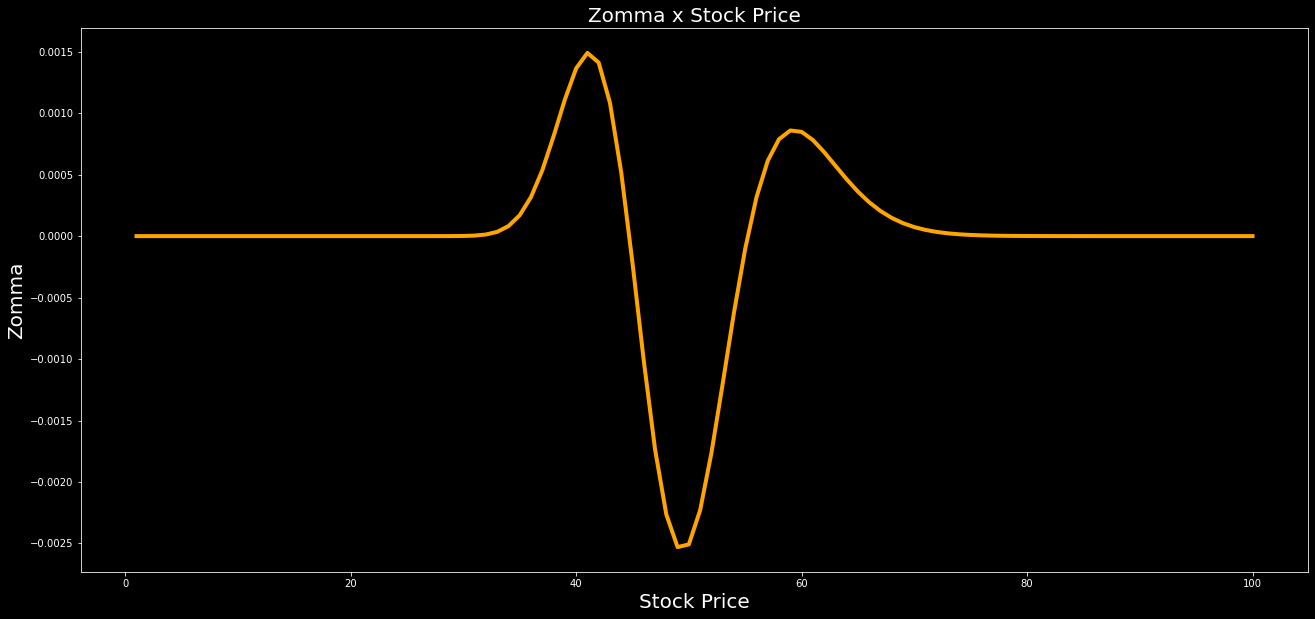

In [114]:
# new Greek!
plt.figure(figsize=(22,10))
lista_zomma=[]
for a in range(int(S_1*2)+1):
    lista_zomma.append(N(zomma.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_zomma))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Zomma x Stock Price",fontsize=20,color="white")
plt.xlabel("Stock Price",fontsize=20)
plt.ylabel("Zomma",fontsize=20)
plt.show()

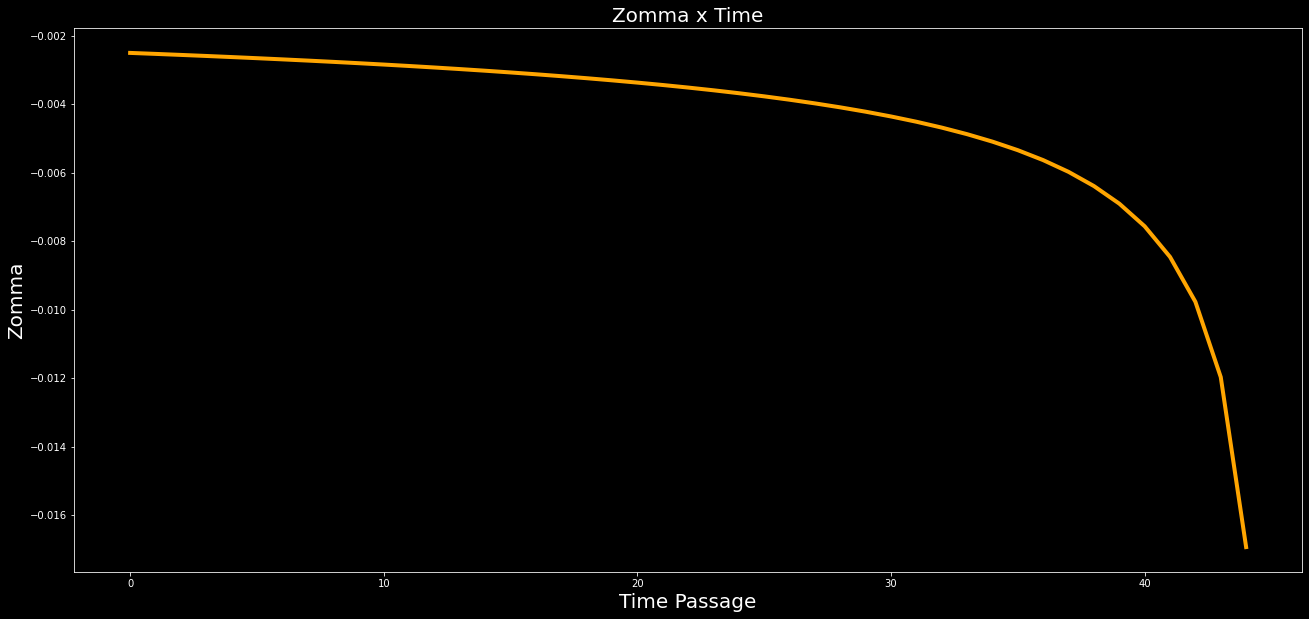

In [115]:
# New Greek!
plt.figure(figsize=(22,10))
lista_zomma=[]
for a in range(DTE):
    lista_zomma.append(N(zomma.subs(S,S_1).subs(K,K_1).subs(T,(DTE-a)/days_year).subs(q,q_1).subs(v,v_1).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_zomma))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Zomma x Time",fontsize=20,color="white")
plt.xlabel("Time Passage",fontsize=20)
plt.ylabel("Zomma",fontsize=20)
plt.show()

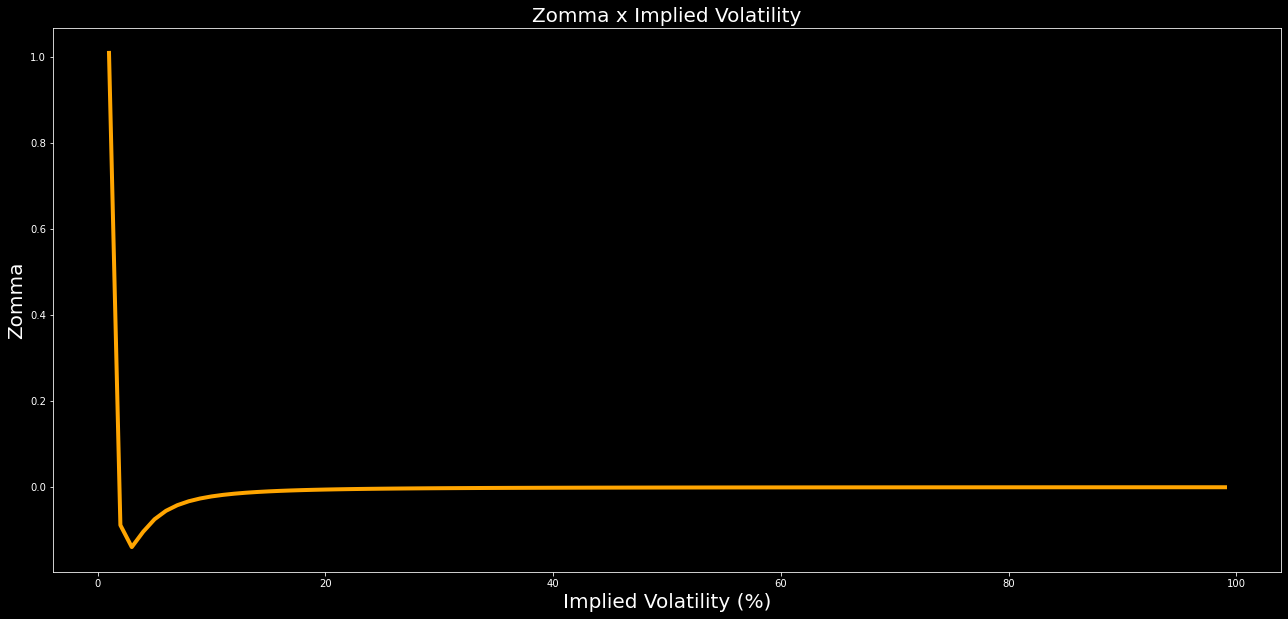

In [116]:
plt.figure(figsize=(22,10))
lista_zomma=[]
for a in range(100):
    lista_zomma.append(N(zomma.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,a/100).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_zomma))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Zomma x Implied Volatility",fontsize=20,color="white")
plt.xlabel("Implied Volatility (%)",fontsize=20)
plt.ylabel("Zomma",fontsize=20)
plt.show()

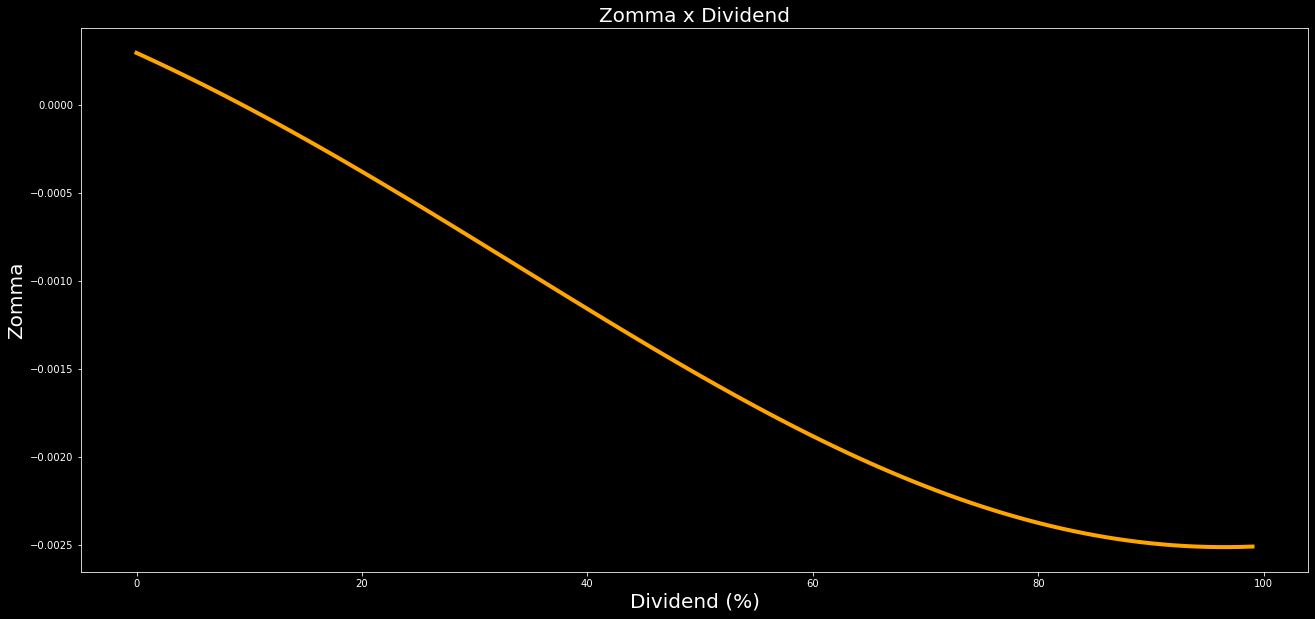

In [117]:
plt.figure(figsize=(22,10))
lista_zomma=[]
for a in range(100):
    lista_zomma.append(N(zomma.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,(100/100-a/100)).subs(v,v_1).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_zomma))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Zomma x Dividend",fontsize=20,color="white")
plt.xlabel("Dividend (%)",fontsize=20)
plt.ylabel("Zomma",fontsize=20)
plt.show()

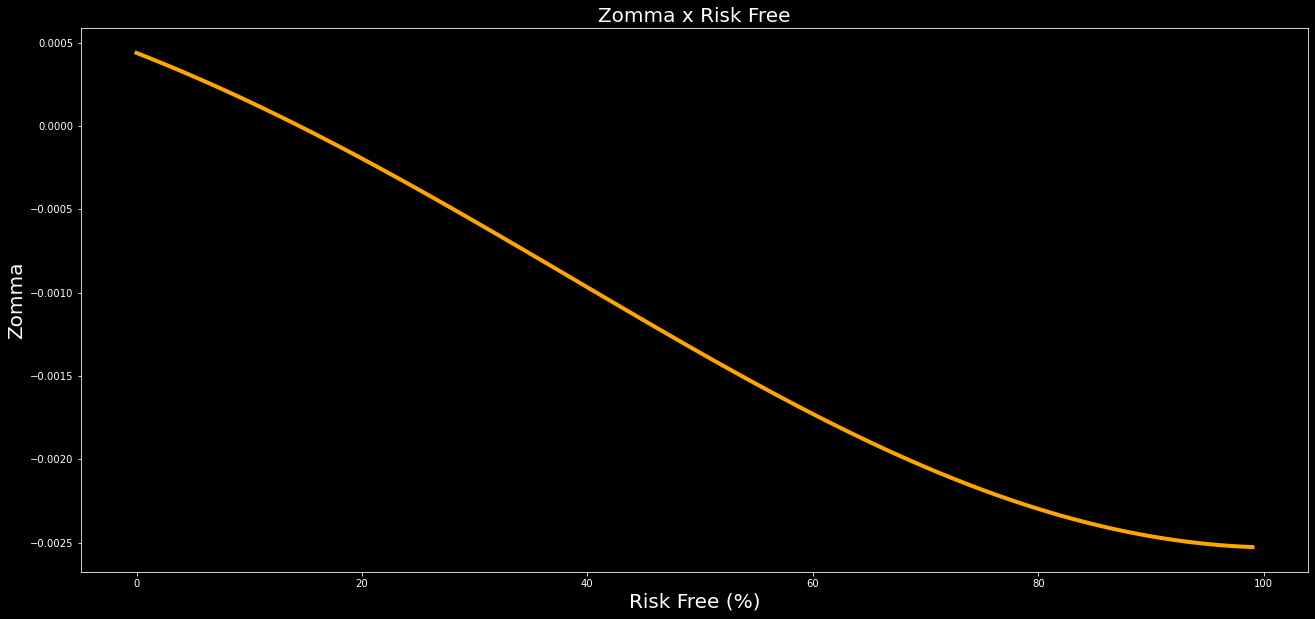

In [119]:
plt.figure(figsize=(22,10))
lista_zomma=[]
for a in range(100):
    lista_zomma.append(N(zomma.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,(100/100-a/100))/100))
df=pd.DataFrame(pd.Series(lista_zomma))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Zomma x Risk Free",fontsize=20,color="white")
plt.xlabel("Risk Free (%)",fontsize=20)
plt.ylabel("Zomma",fontsize=20)
plt.show()

## Color

$$
{\displaystyle {\text{Color}}={\frac {\partial \Gamma }{\partial T }}={\frac {\partial ^{3}Black Scholes}{\partial S^{2}\,\partial T }}}
$$

Color measures the change in gamma by the passage of time, it's important to delta- gamma hedge because the passage of time can break the gamma neutral position 

## Derivate Black & Scholes twice to Stock Price and once to Time

In [120]:
color=black_scholes.diff(S).diff(S).diff(T)
color

-0.5*sqrt(2)*K*r*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S**2*T*v**2) - 0.25*sqrt(2)*K*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2*(-v/sqrt(T) + 2*(-q + r + 0.5*v**2)/(sqrt(T)*v) - (T*(-q + r + 0.5*v**2) + log(S/K))/(T**(3/2)*v))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S**2*T*v**2) + 0.5*sqrt(2)*K*(-v/(2*sqrt(T)) + (-q + r + 0.5*v**2)/(sqrt(T)*v) - (T*(-q + r + 0.5*v**2) + log(S/K))/(2*T**(3/2)*v))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S**2*T*v**2) - 0.5*sqrt(2)*K*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S**2*T**2*v**2) - 0.5*sqrt(2)*K*r*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*S**2*

## Color value of pre determined option parameters

Necessary to divide by the number of days in a year to see the impact of 1 day passing in Color value

In [121]:
N(color.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1)/days_year)

-0.000846775235574242

Each 1 day passed variates gamma by the value above

## Color Graphs

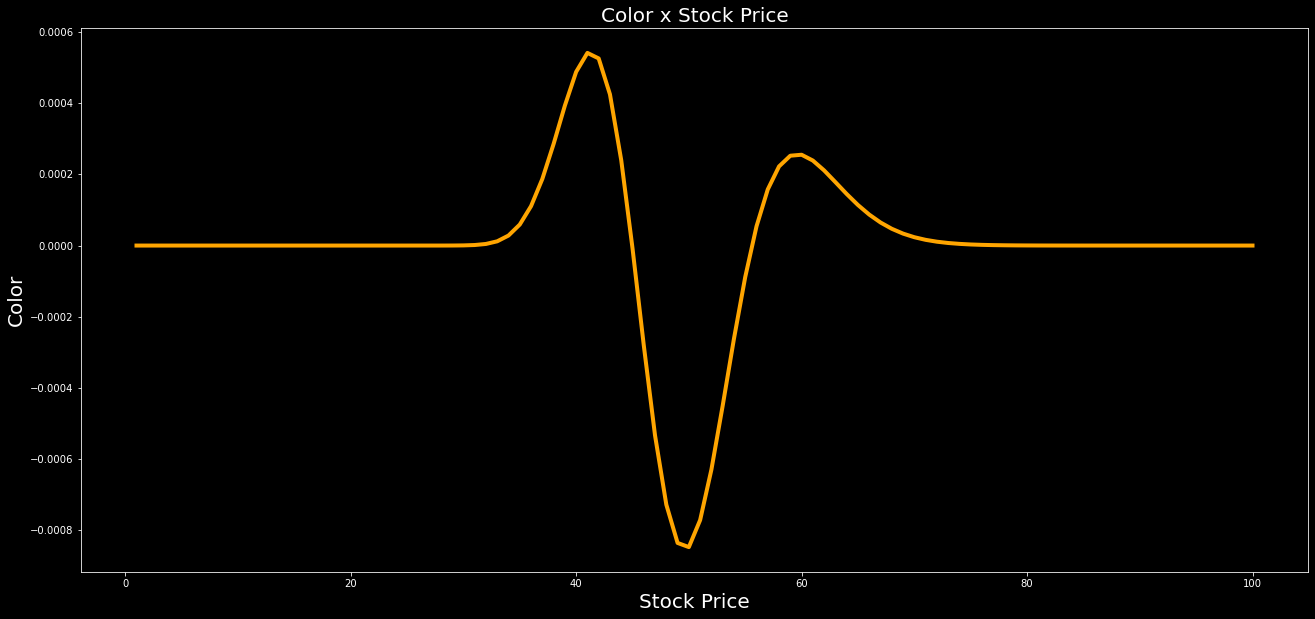

In [122]:
# new Greek!
plt.figure(figsize=(22,10))
lista_color=[]
for a in range(int(S_1*2)+1):
    lista_color.append(N(color.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))/days_year)
df=pd.DataFrame(pd.Series(lista_color))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Color x Stock Price",fontsize=20,color="white")
plt.xlabel("Stock Price",fontsize=20)
plt.ylabel("Color",fontsize=20)
plt.show()

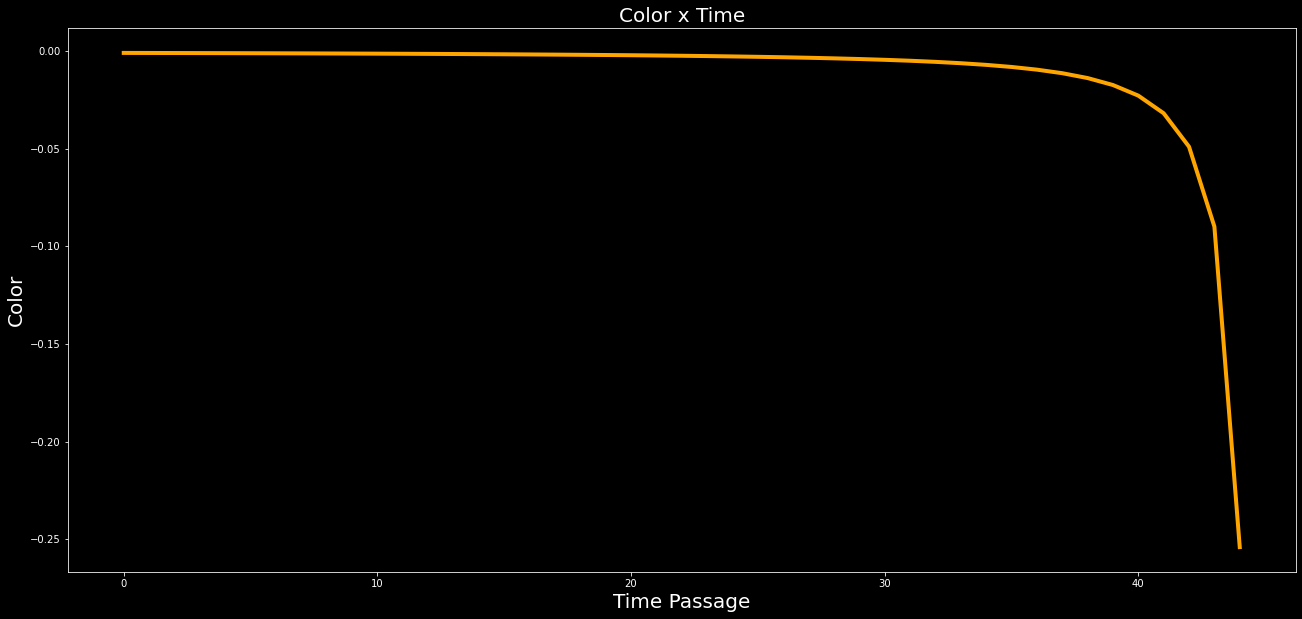

In [127]:
# New Greek!
plt.figure(figsize=(22,10))
lista_color=[]
for a in range(DTE):
    lista_color.append(N(color.subs(S,S_1).subs(K,K_1).subs(T,(DTE-a)/days_year).subs(q,q_1).subs(v,v_1).subs(r,r_1))/days_year)
df=pd.DataFrame(pd.Series(lista_color))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Color x Time",fontsize=20,color="white")
plt.xlabel("Time Passage",fontsize=20)
plt.ylabel("Color",fontsize=20)
plt.show()

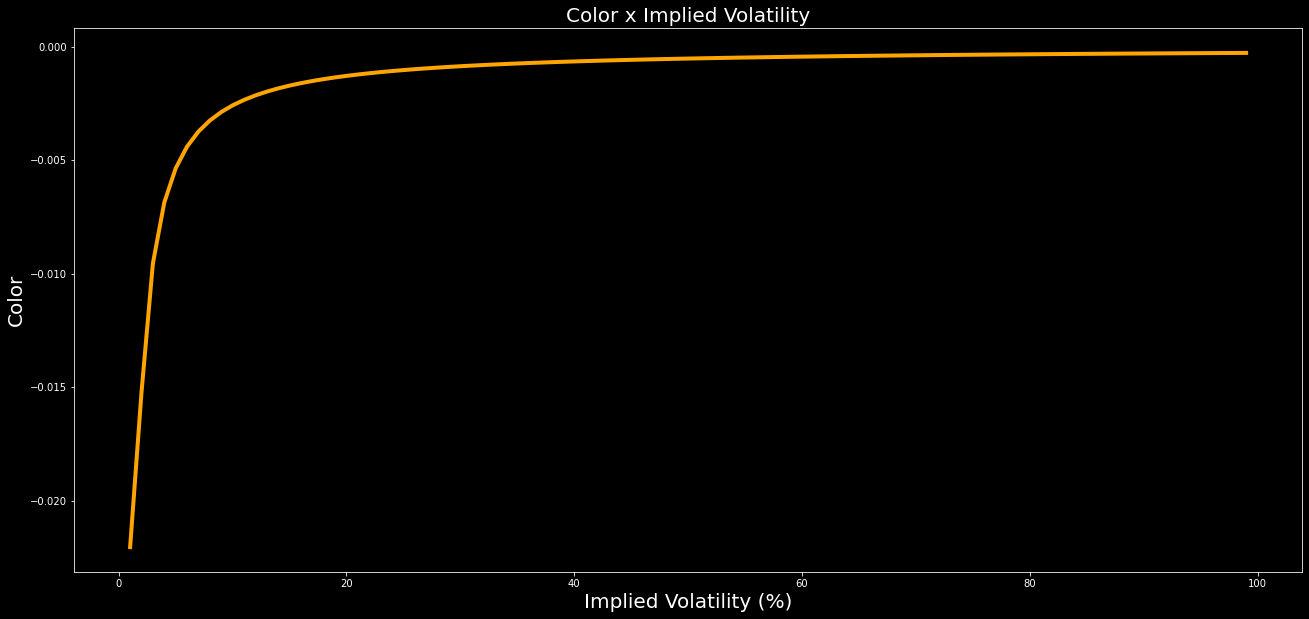

In [124]:
plt.figure(figsize=(22,10))
lista_color=[]
for a in range(100):
    lista_color.append(N(color.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,a/100).subs(r,r_1))/days_year)
df=pd.DataFrame(pd.Series(lista_color))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Color x Implied Volatility",fontsize=20,color="white")
plt.xlabel("Implied Volatility (%)",fontsize=20)
plt.ylabel("Color",fontsize=20)
plt.show()

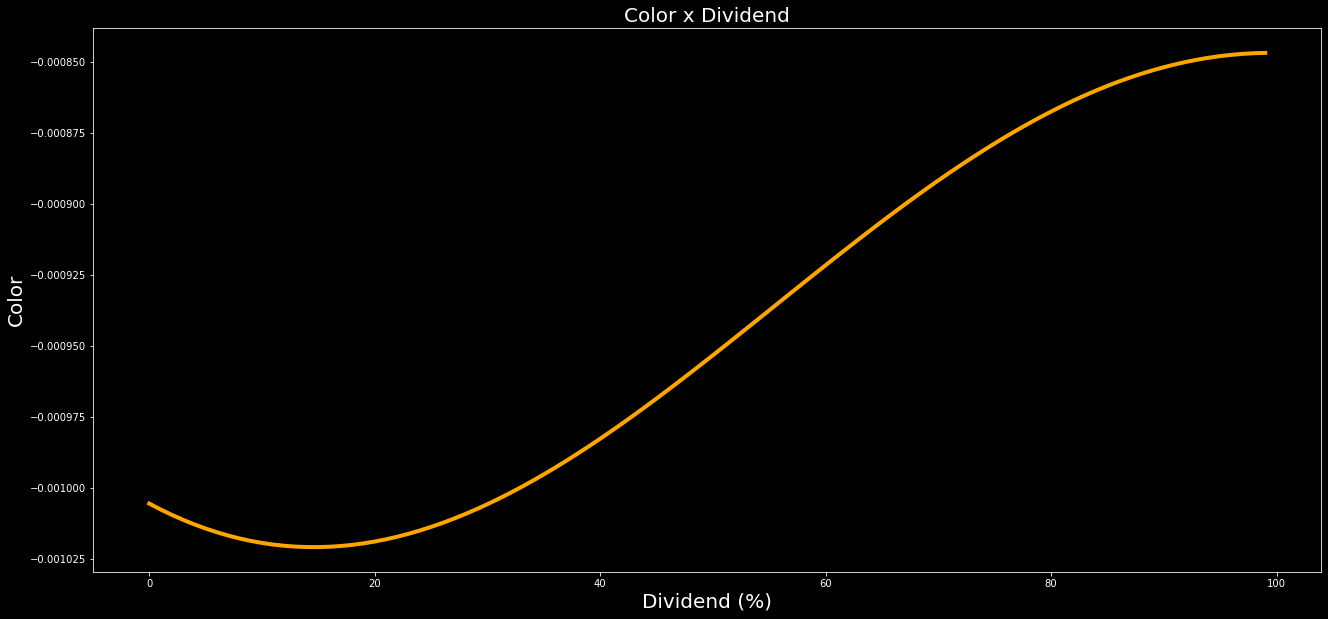

In [130]:
plt.figure(figsize=(22,10))
lista_color=[]
for a in range(100):
    lista_color.append(N(color.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,(100/100-a/100)).subs(v,v_1).subs(r,r_1))/days_year)
df=pd.DataFrame(pd.Series(lista_color))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Color x Dividend",fontsize=20,color="white")
plt.xlabel("Dividend (%)",fontsize=20)
plt.ylabel("Color",fontsize=20)
plt.show()

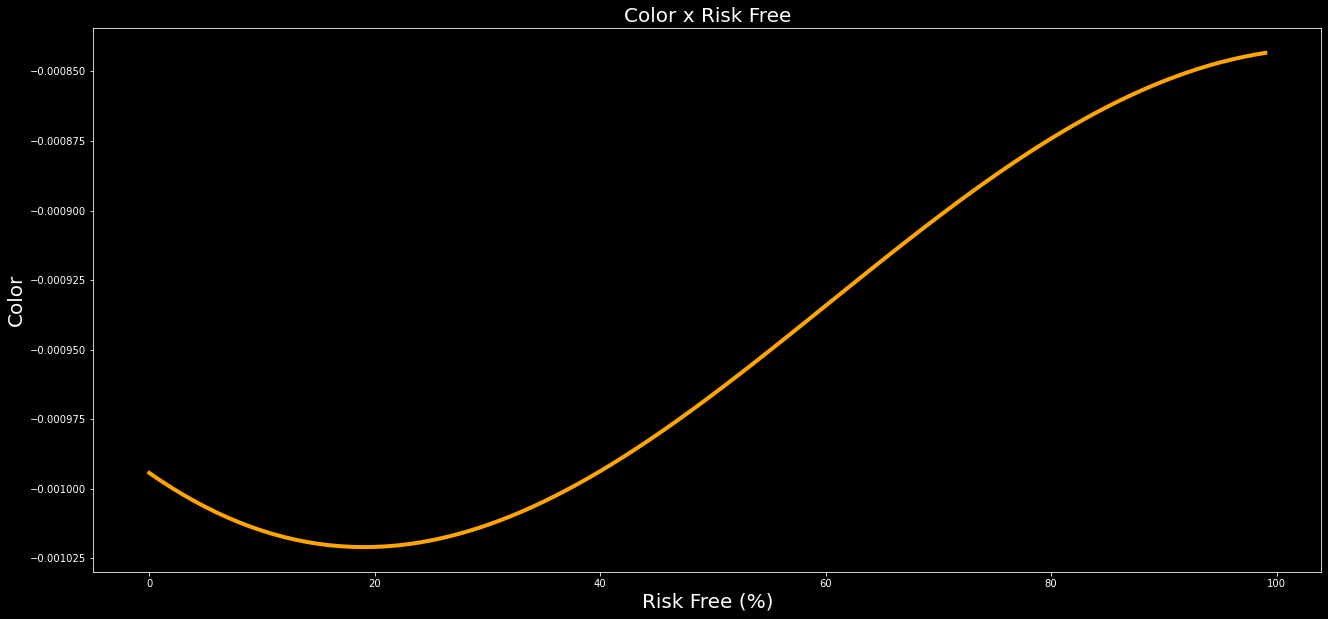

In [129]:
plt.figure(figsize=(22,10))
lista_color=[]
for a in range(100):
    lista_color.append(N(color.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,(100/100-a/100))/days_year))
df=pd.DataFrame(pd.Series(lista_color))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Color x Risk Free",fontsize=20,color="white")
plt.xlabel("Risk Free (%)",fontsize=20)
plt.ylabel("Color",fontsize=20)
plt.show()

## Ultima

$$
{\displaystyle {\text{Ultima}}={\frac {\partial {\text{vomma}}}{\partial \sigma }}={\frac {\partial ^{3}Black Scholes}{\partial \sigma ^{3}}}}
$$

## Derivate Black & Scholes to Volatility three times

In [131]:
ultima=black_scholes.diff(v).diff(v).diff(v)
ultima

-1.5*sqrt(2)*K*sqrt(T)*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*v**2) + 1.5*sqrt(2)*K*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))*(T*(-q + r + 0.5*v**2) + log(S/K))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*v**3) - 3.0*sqrt(2)*K*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))*(T*(-q + r + 0.5*v**2) + log(S/K))**2*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*T*v**5) + 3.0*sqrt(2)*K*(T*(-q + r + 0.5*v**2) + log(S/K))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*sqrt(T)*v**4) + 0.5*sqrt(2)*K*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2*(T*(-q + r + 0.5*v**2) + log(S/K))**3*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/(sqrt(pi)*T**(3/2)*v**6) - 0.5*sqrt(2)*K*(T*(-q + r + 0.5*v**2) + log(S/K))**3*exp(-T*r)*

## Ultima value of pre determined option parameters

Need to divide by 100 to see the impacto of 1% change im implied volatility

In [132]:
N(ultima.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1)/(100))

-0.0100911537387735

Each 1% change of implied volatility variates vomma by the value above

## Ultima Graphs

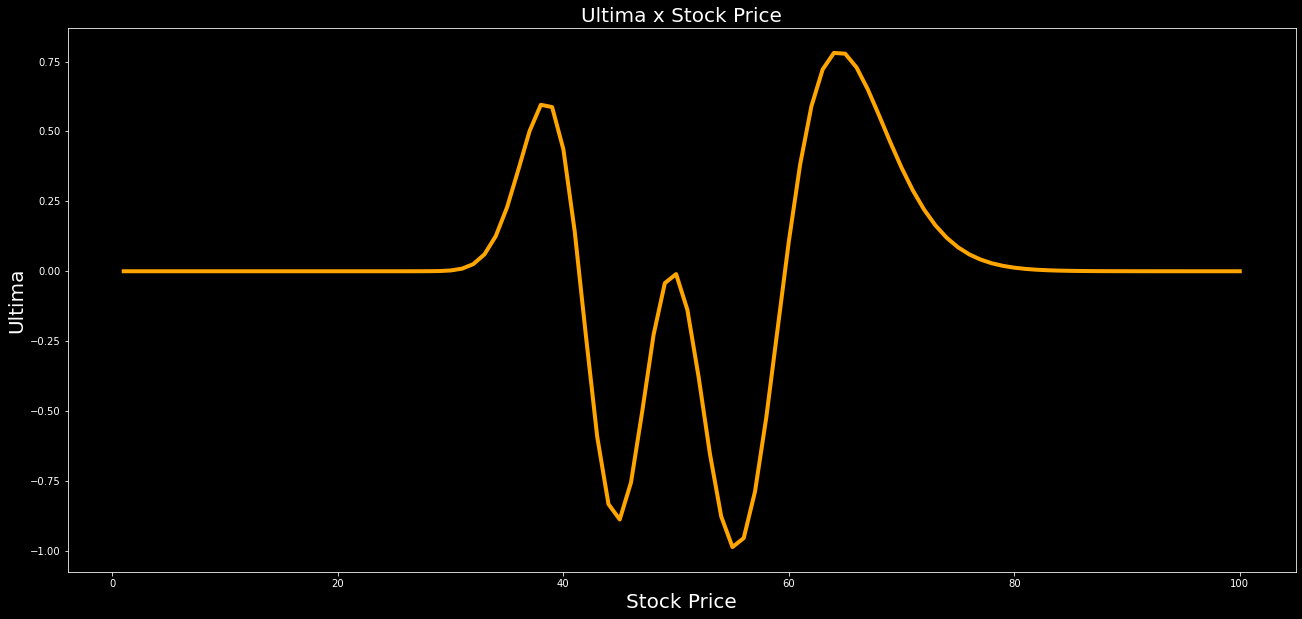

In [133]:
# new Greek!
plt.figure(figsize=(22,10))
lista_ultima=[]
for a in range(int(S_1*2)+1):
    lista_ultima.append(N(ultima.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_ultima))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Ultima x Stock Price",fontsize=20,color="white")
plt.xlabel("Stock Price",fontsize=20)
plt.ylabel("Ultima",fontsize=20)
plt.show()

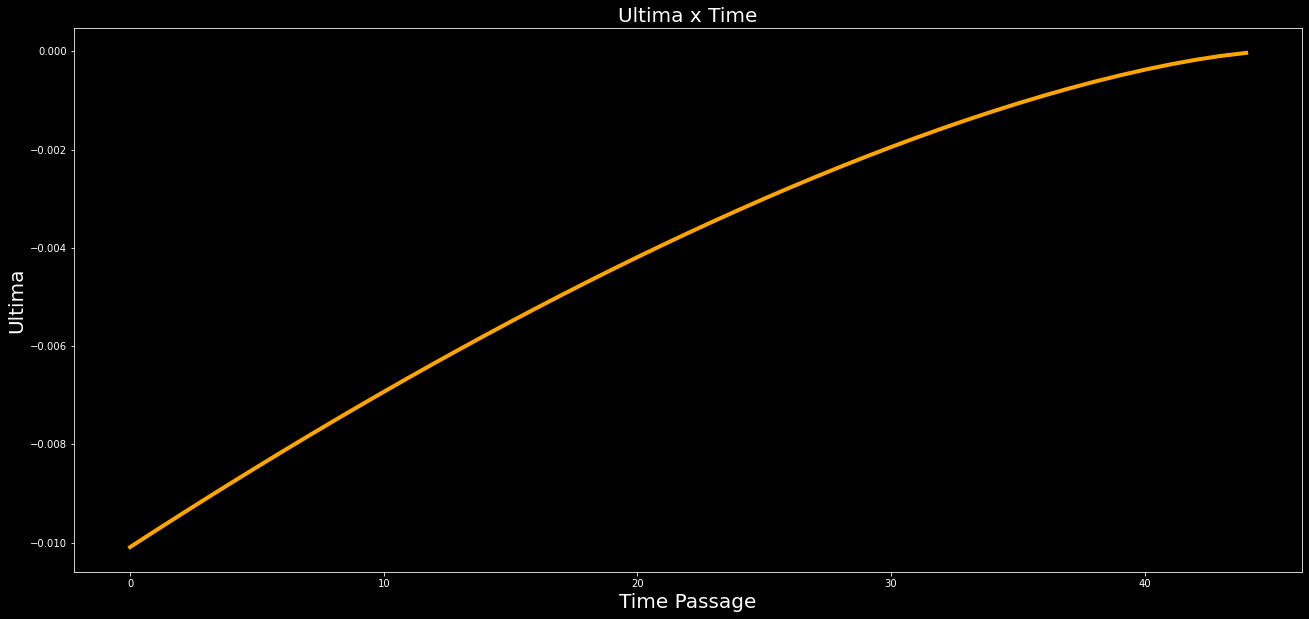

In [134]:
# New Greek!
plt.figure(figsize=(22,10))
lista_ultima=[]
for a in range(DTE):
    lista_ultima.append(N(ultima.subs(S,S_1).subs(K,K_1).subs(T,(DTE-a)/days_year).subs(q,q_1).subs(v,v_1).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_ultima))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Ultima x Time",fontsize=20,color="white")
plt.xlabel("Time Passage",fontsize=20)
plt.ylabel("Ultima",fontsize=20)
plt.show()

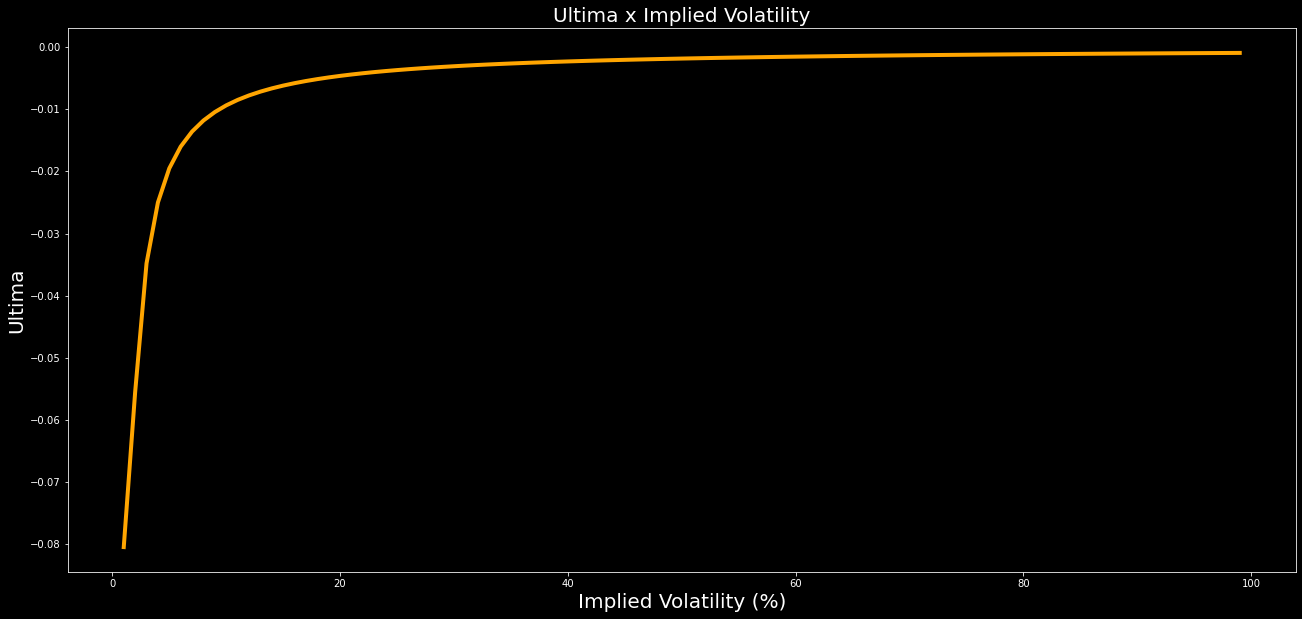

In [135]:
plt.figure(figsize=(22,10))
lista_ultima=[]
for a in range(100):
    lista_ultima.append(N(color.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,a/100).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_ultima))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Ultima x Implied Volatility",fontsize=20,color="white")
plt.xlabel("Implied Volatility (%)",fontsize=20)
plt.ylabel("Ultima",fontsize=20)
plt.show()

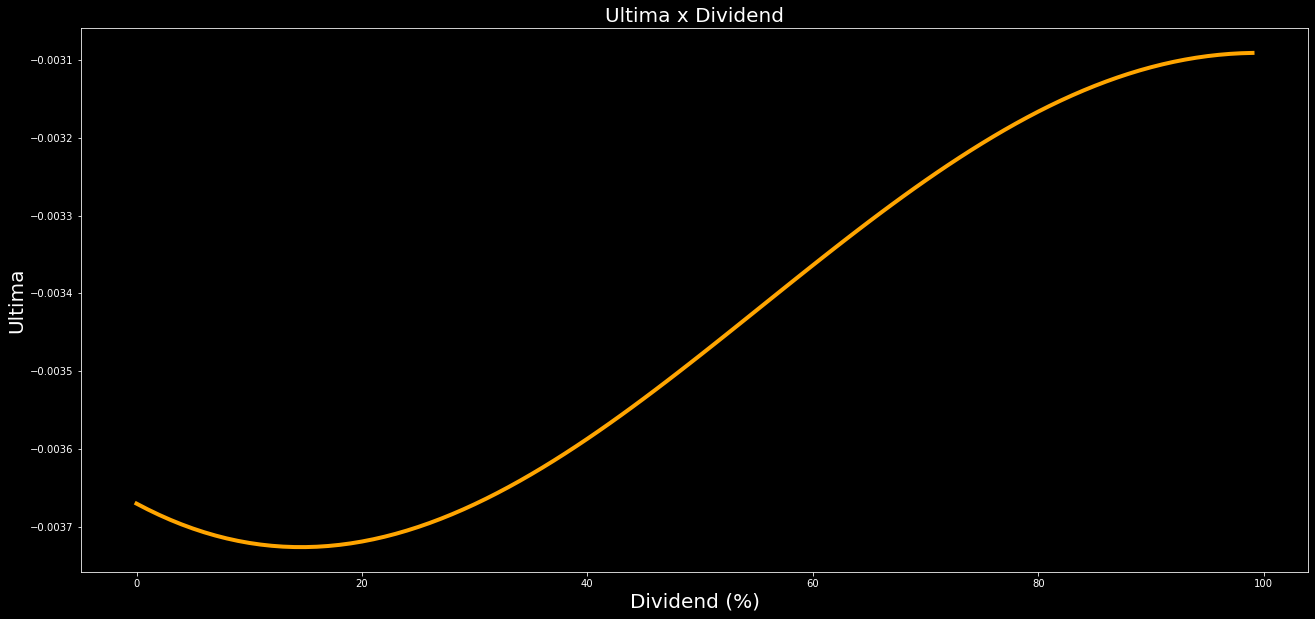

In [136]:
plt.figure(figsize=(22,10))
lista_ultima=[]
for a in range(100):
    lista_ultima.append(N(color.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,(100/100-a/100)).subs(v,v_1).subs(r,r_1))/100)
df=pd.DataFrame(pd.Series(lista_ultima))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Ultima x Dividend",fontsize=20,color="white")
plt.xlabel("Dividend (%)",fontsize=20)
plt.ylabel("Ultima",fontsize=20)
plt.show()

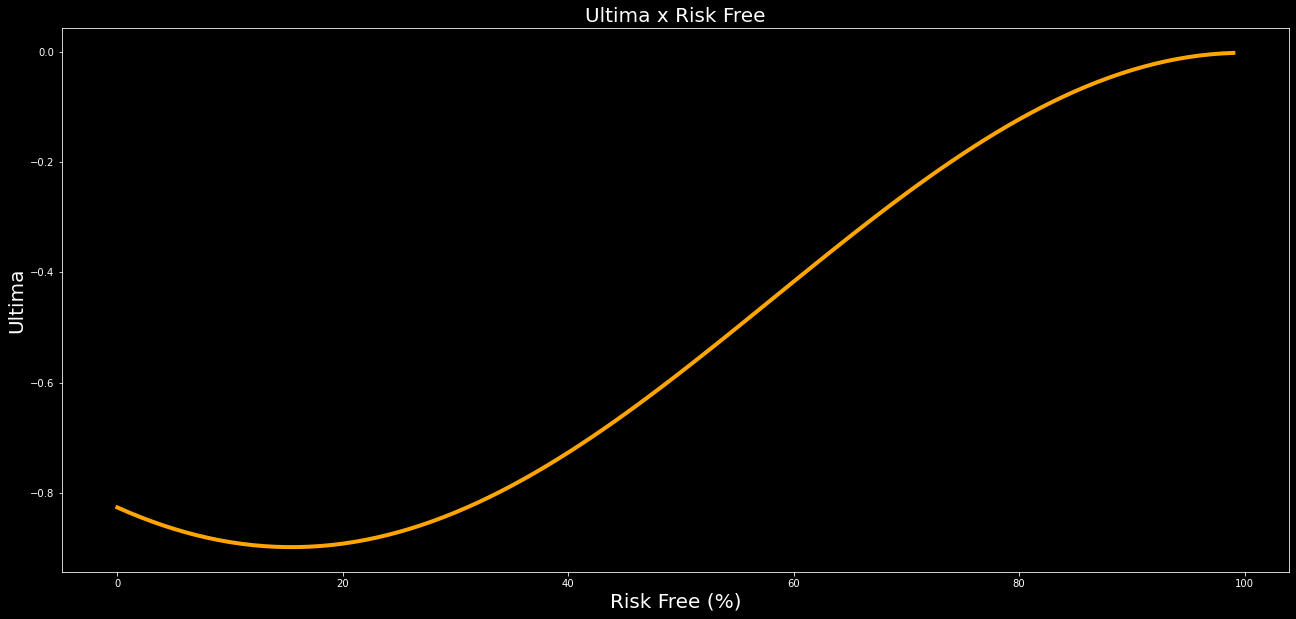

In [138]:
plt.figure(figsize=(22,10))
lista_ultima=[]
for a in range(100):
    lista_ultima.append(N(ultima.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,(100/100-a/100))/100))
df=pd.DataFrame(pd.Series(lista_ultima))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Ultima x Risk Free",fontsize=20,color="white")
plt.xlabel("Risk Free (%)",fontsize=20)
plt.ylabel("Ultima",fontsize=20)
plt.show()

## New Greeks found in the study

## Tau 

$$
{\displaystyle \tau =-{\frac {\partial \Theta}{\partial T }}=\frac {\partial^2 Black Scholes}{\partial^2 T }}
$$

We need to add the "minus" signal because the days to expirtion is inversed proportional to the Time Increases

In [139]:
tau=black_scholes.diff(T).diff(T)
tau

-K*r**2*(0.5*erf(sqrt(2)*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))/2) + 0.5)*exp(-T*r) + 1.0*sqrt(2)*K*r*(-v/(2*sqrt(T)) + (-q + r + 0.5*v**2)/(sqrt(T)*v) - (T*(-q + r + 0.5*v**2) + log(S/K))/(2*T**(3/2)*v))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/sqrt(pi) + 0.25*sqrt(2)*K*(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))*(-v/sqrt(T) + 2*(-q + r + 0.5*v**2)/(sqrt(T)*v) - (T*(-q + r + 0.5*v**2) + log(S/K))/(T**(3/2)*v))*(-v/(2*sqrt(T)) + (-q + r + 0.5*v**2)/(sqrt(T)*v) - (T*(-q + r + 0.5*v**2) + log(S/K))/(2*T**(3/2)*v))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/sqrt(pi) - 0.5*sqrt(2)*K*(v/(4*T**(3/2)) - (-q + r + 0.5*v**2)/(T**(3/2)*v) + 3*(T*(-q + r + 0.5*v**2) + log(S/K))/(4*T**(5/2)*v))*exp(-T*r)*exp(-(-sqrt(T)*v + (T*(-q + r + 0.5*v**2) + log(S/K))/(sqrt(T)*v))**2/2)/sqrt(pi) + S*q**2*(0.5*erf(sqrt(2)*(T*(-q + r + 0.5*v**2) + log(S/K))/(2*sqrt(T)*v)) + 0.5)*exp(-T*q) 

we need to divide the equation by the number of days in a year to visualize the impact of 1 day change in theta

In [140]:

N(tau.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1)/(days_year))

-0.0953687379145633

The value above represents the value changed in theta by the passage of 1 day

## Tau Graphs

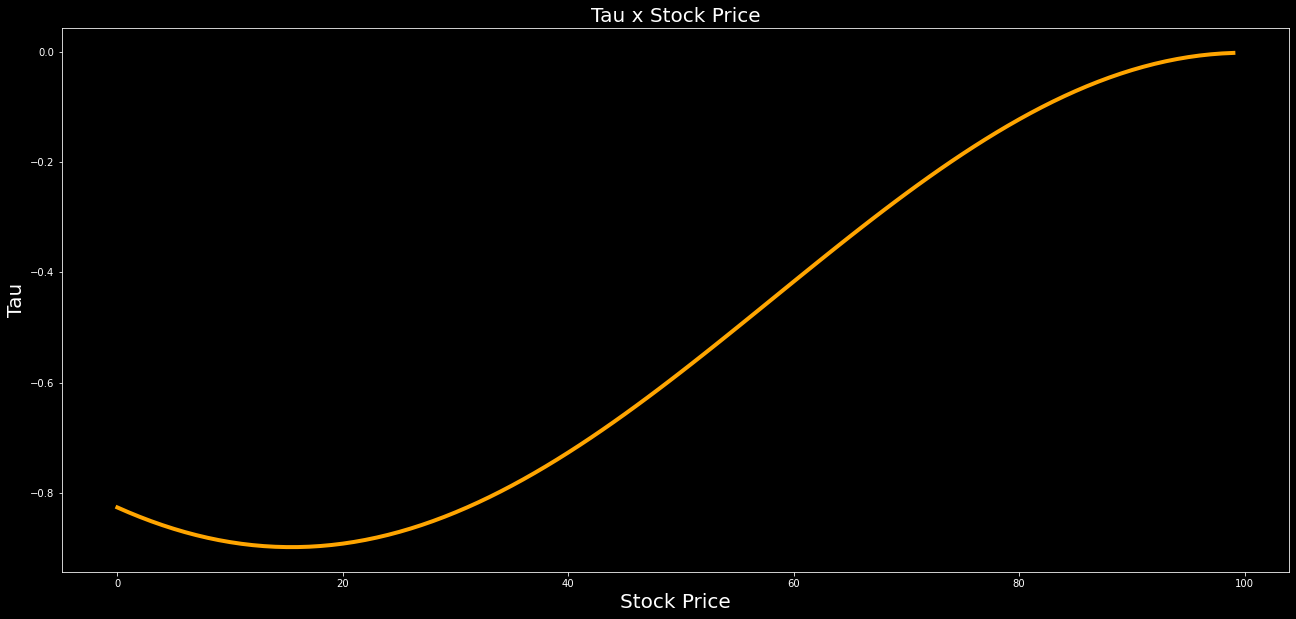

In [141]:
plt.figure(figsize=(22,10))
lista_tau=[]
for a in range(int(S_1*2)+1):
    lista_tau.append(N(tau.subs(S,a).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,r_1))/days_year)
df=pd.DataFrame(pd.Series(lista_ultima))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Tau x Stock Price",fontsize=20,color="white")
plt.xlabel("Stock Price",fontsize=20)
plt.ylabel("Tau",fontsize=20)
plt.show()

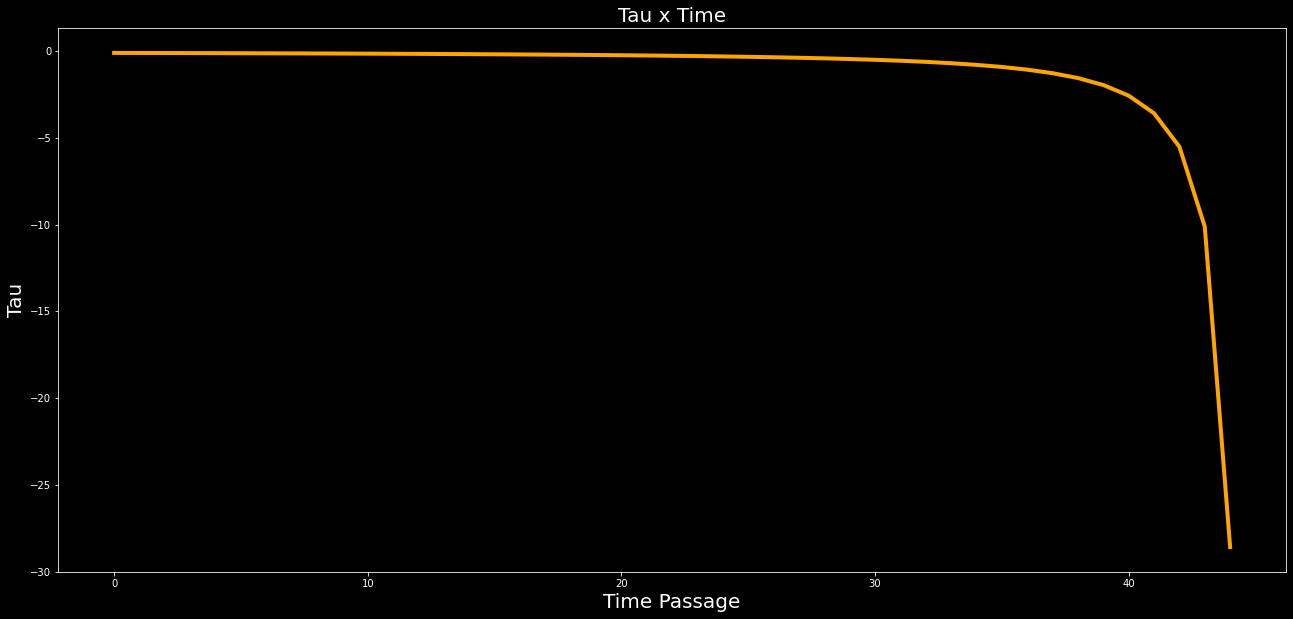

In [142]:
plt.figure(figsize=(22,10))
lista_tau=[]
for a in range(DTE):
    lista_tau.append(N(tau.subs(S,S_1).subs(K,K_1).subs(T,(DTE-a)/days_year).subs(q,q_1).subs(v,v_1).subs(r,r_1))/days_year)
df=pd.DataFrame(pd.Series(lista_tau))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Tau x Time",fontsize=20,color="white")
plt.xlabel("Time Passage",fontsize=20)
plt.ylabel("Tau",fontsize=20)
plt.show()

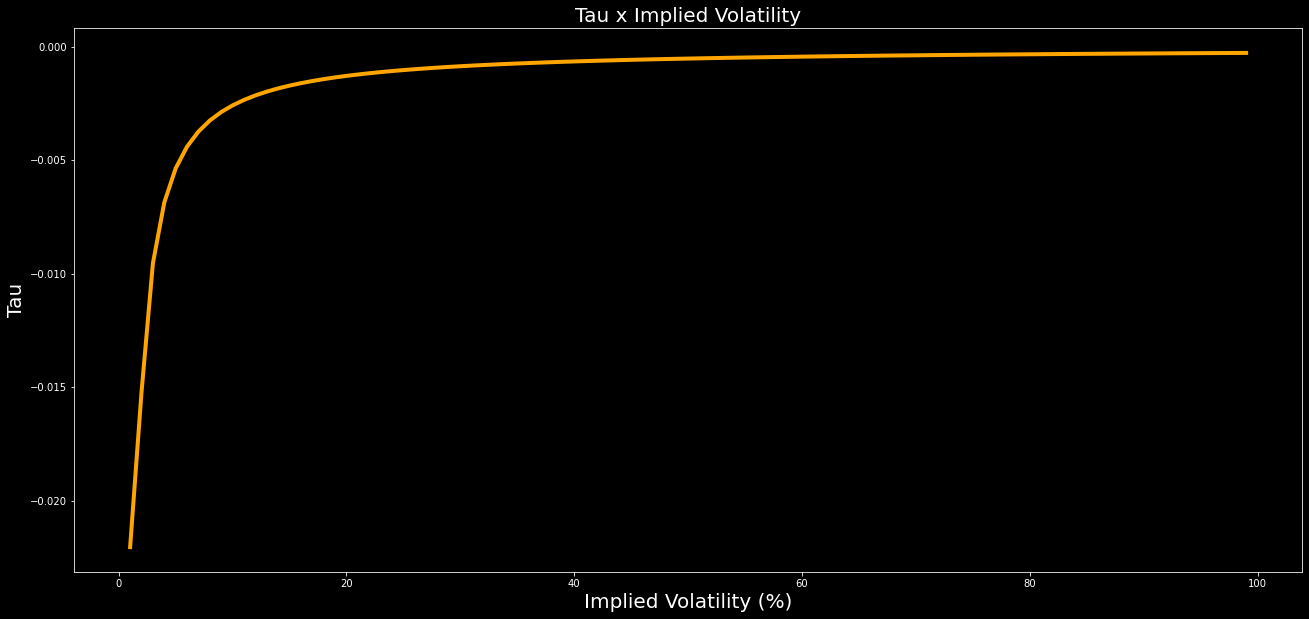

In [143]:
plt.figure(figsize=(22,10))
lista_tau=[]
for a in range(100):
    lista_tau.append(N(color.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,a/100).subs(r,r_1))/days_year)
df=pd.DataFrame(pd.Series(lista_tau))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Tau x Implied Volatility",fontsize=20,color="white")
plt.xlabel("Implied Volatility (%)",fontsize=20)
plt.ylabel("Tau",fontsize=20)
plt.show()

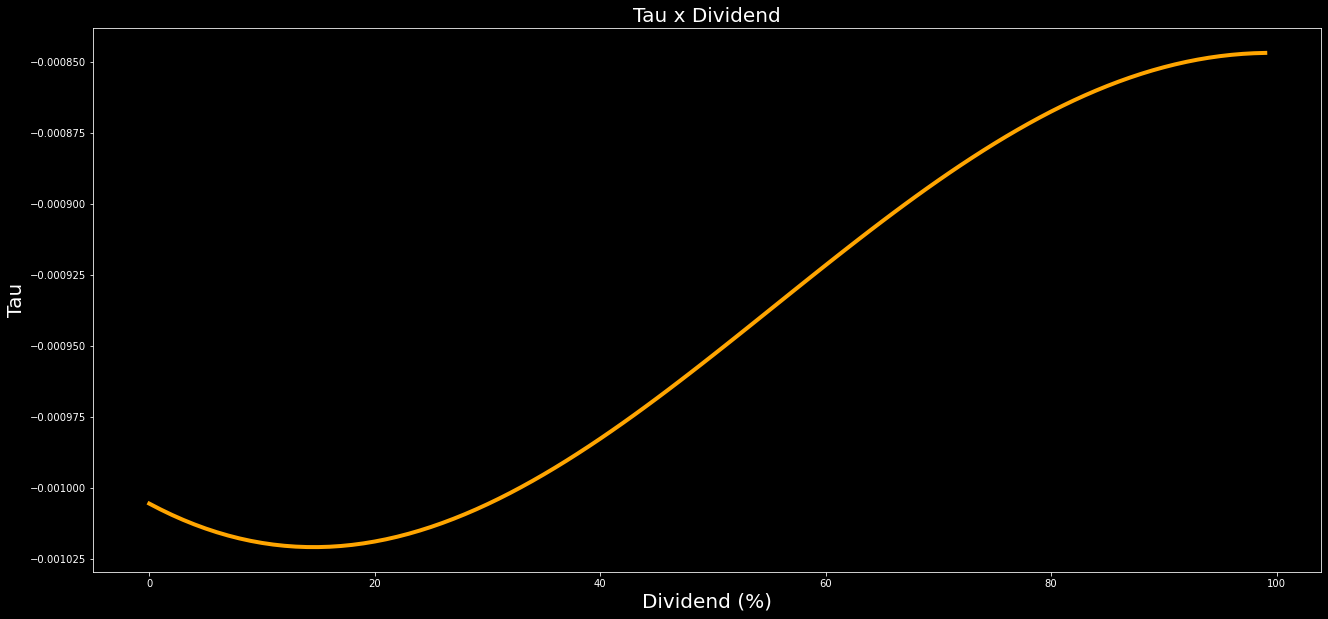

In [144]:
plt.figure(figsize=(22,10))
lista_tau=[]
for a in range(100):
    lista_tau.append(N(color.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,(100/100-a/100)).subs(v,v_1).subs(r,r_1))/days_year)
df=pd.DataFrame(pd.Series(lista_tau))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Tau x Dividend",fontsize=20,color="white")
plt.xlabel("Dividend (%)",fontsize=20)
plt.ylabel("Tau",fontsize=20)
plt.show()

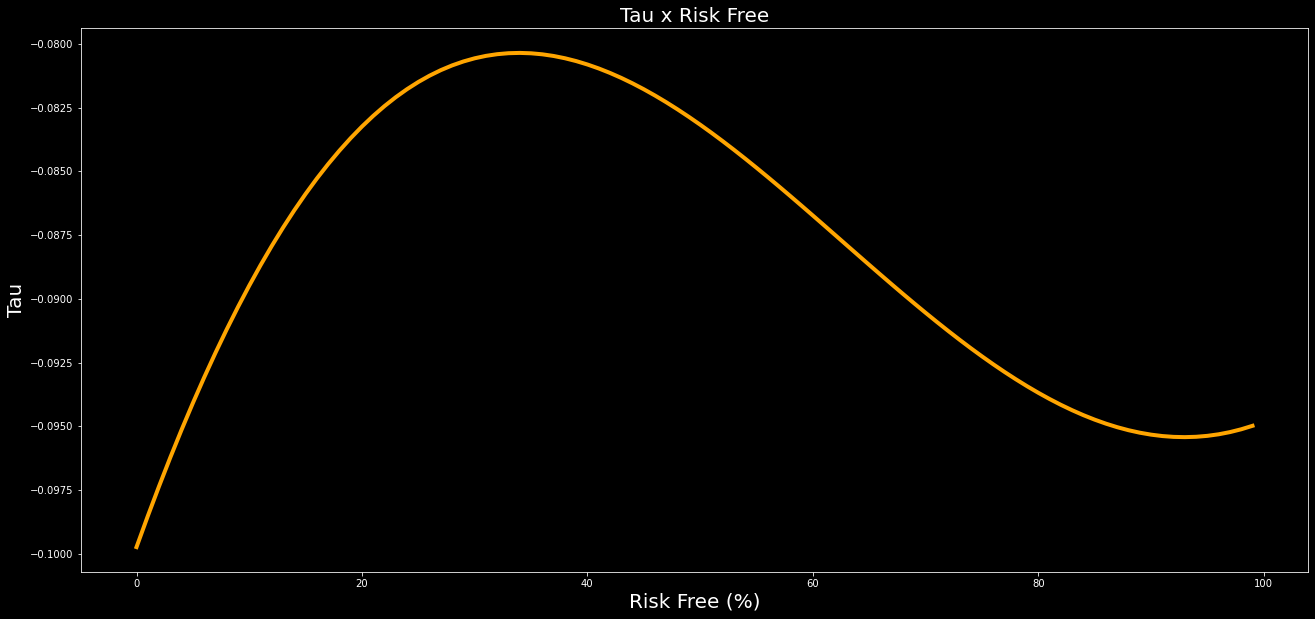

In [146]:
plt.figure(figsize=(22,10))
lista_tau=[]
for a in range(100):
    lista_tau.append(N(tau.subs(S,S_1).subs(K,K_1).subs(T,T_1).subs(q,q_1).subs(v,v_1).subs(r,(100/100-a/100))/days_year))
df=pd.DataFrame(pd.Series(lista_tau))
df=df.rename(columns={0:"x"})
plt.plot(df["x"],color="orange",linewidth=4)
plt.title("Tau x Risk Free",fontsize=20,color="white")
plt.xlabel("Risk Free (%)",fontsize=20)
plt.ylabel("Tau",fontsize=20)
plt.show()

Guilherme Regueira: https://www.linkedin.com/in/guilherme-regueira-gr9/

Caio Campello: https://www.linkedin.com/in/caio-campello-lopes/